# import

In [1]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, roc_curve, auc, f1_score, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np
from scipy.stats import sem, t
from sklearn import metrics
import pandas as pd
target_names = ['non-patient', 'patient']

In [2]:
def CI(y_true, y_pred):
    n_bootstraps = 1000
    rng_seed = 42  # control reproducibility
    bootstrapped_scores = []

    rng = np.random.RandomState(rng_seed)
    for i in range(n_bootstraps):
        # bootstrap by sampling with replacement on the prediction indices
        indices = rng.randint(0, len(y_pred), len(y_pred))
        if len(np.unique(y_true[indices])) < 2:
            # We need at least one positive and one negative sample for ROC AUC
            # to be defined: reject the sample
            continue

        score = roc_auc_score(y_true[indices], y_pred[indices])
        bootstrapped_scores.append(score)
        #print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))

    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()
    confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
    confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
    print("Confidence interval for the score: [{:0.3f} - {:0.3}]".format(
        confidence_lower, confidence_upper))

# Original

## Hubert ori

In [3]:
# fivefolds_hubert = pd.read_csv('hubert10k.csv')
# fivefolds_hubert['result'] = np.where(fivefolds_hubert['hyps'] >= 0.5,1,0)
# fivefolds_hubert_wrong = fivefolds_hubert.iloc[np.where(fivefolds_hubert['ifcorrect'] == False)]
# print(fivefolds_hubert_wrong)
# # print(fivefolds_hubert.head(20))
# fivefolds_hubert_result = fivefolds_hubert['result'].tolist()
# fivefolds_hubert_hyps = fivefolds_hubert['hyps'].tolist()
# fivefolds_hubert_truth = [int(i) for i in fivefolds_hubert['truth'].tolist()]
# print(classification_report(fivefolds_hubert_truth, fivefolds_hubert_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_hubert_truth, fivefolds_hubert_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_hubert_truth), np.array(fivefolds_hubert_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

In [4]:
# fivefolds_whisper10k = pd.read_csv('whisper10k_encoder.csv')
# fivefolds_whisper10k['result'] = np.where(fivefolds_whisper10k['hyps'] >= 0.5,1,0)
# fivefolds_whisper10k_wrong = fivefolds_whisper10k.iloc[np.where(fivefolds_whisper10k['ifcorrect'] == False)]
# print(fivefolds_whisper10k_wrong)
# # print(fivefolds_whisper10k.head(20))
# fivefolds_whisper10k_result = fivefolds_whisper10k['result'].tolist()
# fivefolds_whisper10k_hyps = fivefolds_whisper10k['hyps'].tolist()
# fivefolds_whisper10k_truth = [int(i) for i in fivefolds_whisper10k['truth'].tolist()]
# print(classification_report(fivefolds_whisper10k_truth, fivefolds_whisper10k_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper10k_truth, fivefolds_whisper10k_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper10k_truth), np.array(fivefolds_whisper10k_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

In [5]:
# fivefolds_whisper10k = pd.read_csv('whisper10k_decoder_hidden_0.csv')
# fivefolds_whisper10k['result'] = np.where(fivefolds_whisper10k['hyps'] >= 0.5,1,0)
# fivefolds_whisper10k_wrong = fivefolds_whisper10k.iloc[np.where(fivefolds_whisper10k['ifcorrect'] == False)]
# print(fivefolds_whisper10k_wrong)
# # print(fivefolds_whisper10k.head(20))
# fivefolds_whisper10k_result = fivefolds_whisper10k['result'].tolist()
# fivefolds_whisper10k_hyps = fivefolds_whisper10k['hyps'].tolist()
# fivefolds_whisper10k_truth = [int(i) for i in fivefolds_whisper10k['truth'].tolist()]
# print(classification_report(fivefolds_whisper10k_truth, fivefolds_whisper10k_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper10k_truth, fivefolds_whisper10k_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper10k_truth), np.array(fivefolds_whisper10k_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

In [6]:
# fivefolds_whisper10k = pd.read_csv('whisper10k_decoder_hidden_10.csv')
# fivefolds_whisper10k['result'] = np.where(fivefolds_whisper10k['hyps'] >= 0.5,1,0)
# fivefolds_whisper10k_wrong = fivefolds_whisper10k.iloc[np.where(fivefolds_whisper10k['ifcorrect'] == False)]
# print(fivefolds_whisper10k_wrong)
# # print(fivefolds_whisper10k.head(20))
# fivefolds_whisper10k_result = fivefolds_whisper10k['result'].tolist()
# fivefolds_whisper10k_hyps = fivefolds_whisper10k['hyps'].tolist()
# fivefolds_whisper10k_truth = [int(i) for i in fivefolds_whisper10k['truth'].tolist()]
# print(classification_report(fivefolds_whisper10k_truth, fivefolds_whisper10k_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper10k_truth, fivefolds_whisper10k_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper10k_truth), np.array(fivefolds_whisper10k_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

In [7]:
# fivefolds_whisper10k = pd.read_csv('whisper10k_decoder_hidden_20.csv')
# fivefolds_whisper10k['result'] = np.where(fivefolds_whisper10k['hyps'] >= 0.5,1,0)
# fivefolds_whisper10k_wrong = fivefolds_whisper10k.iloc[np.where(fivefolds_whisper10k['ifcorrect'] == False)]
# print(fivefolds_whisper10k_wrong)
# # print(fivefolds_whisper10k.head(20))
# fivefolds_whisper10k_result = fivefolds_whisper10k['result'].tolist()
# fivefolds_whisper10k_hyps = fivefolds_whisper10k['hyps'].tolist()
# fivefolds_whisper10k_truth = [int(i) for i in fivefolds_whisper10k['truth'].tolist()]
# print(classification_report(fivefolds_whisper10k_truth, fivefolds_whisper10k_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper10k_truth, fivefolds_whisper10k_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper10k_truth), np.array(fivefolds_whisper10k_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

In [8]:
# fivefolds_whisper10k = pd.read_csv('whisper10k_decoder_hidden_30.csv')
# fivefolds_whisper10k['result'] = np.where(fivefolds_whisper10k['hyps'] >= 0.5,1,0)
# fivefolds_whisper10k_wrong = fivefolds_whisper10k.iloc[np.where(fivefolds_whisper10k['ifcorrect'] == False)]
# print(fivefolds_whisper10k_wrong)
# # print(fivefolds_whisper10k.head(20))
# fivefolds_whisper10k_result = fivefolds_whisper10k['result'].tolist()
# fivefolds_whisper10k_hyps = fivefolds_whisper10k['hyps'].tolist()
# fivefolds_whisper10k_truth = [int(i) for i in fivefolds_whisper10k['truth'].tolist()]
# print(classification_report(fivefolds_whisper10k_truth, fivefolds_whisper10k_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper10k_truth, fivefolds_whisper10k_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper10k_truth), np.array(fivefolds_whisper10k_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

In [9]:
# fivefolds_whisper10k = pd.read_csv('whisper10k_decoder_hidden_31.csv')
# fivefolds_whisper10k['result'] = np.where(fivefolds_whisper10k['hyps'] >= 0.5,1,0)
# fivefolds_whisper10k_wrong = fivefolds_whisper10k.iloc[np.where(fivefolds_whisper10k['ifcorrect'] == False)]
# print(fivefolds_whisper10k_wrong)
# # print(fivefolds_whisper10k.head(20))
# fivefolds_whisper10k_result = fivefolds_whisper10k['result'].tolist()
# fivefolds_whisper10k_hyps = fivefolds_whisper10k['hyps'].tolist()
# fivefolds_whisper10k_truth = [int(i) for i in fivefolds_whisper10k['truth'].tolist()]
# print(classification_report(fivefolds_whisper10k_truth, fivefolds_whisper10k_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper10k_truth, fivefolds_whisper10k_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper10k_truth), np.array(fivefolds_whisper10k_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

In [10]:
# fivefolds_whisper10k = pd.read_csv('whisper10k_decoder_hidden_32.csv')
# fivefolds_whisper10k['result'] = np.where(fivefolds_whisper10k['hyps'] >= 0.5,1,0)
# fivefolds_whisper10k_wrong = fivefolds_whisper10k.iloc[np.where(fivefolds_whisper10k['ifcorrect'] == False)]
# print(fivefolds_whisper10k_wrong)
# # print(fivefolds_whisper10k.head(20))
# fivefolds_whisper10k_result = fivefolds_whisper10k['result'].tolist()
# fivefolds_whisper10k_hyps = fivefolds_whisper10k['hyps'].tolist()
# fivefolds_whisper10k_truth = [int(i) for i in fivefolds_whisper10k['truth'].tolist()]
# print(classification_report(fivefolds_whisper10k_truth, fivefolds_whisper10k_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper10k_truth, fivefolds_whisper10k_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper10k_truth), np.array(fivefolds_whisper10k_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

## whisper

### v1

#### v1 decoder

In [11]:
# # with Lu & Taiwanese
# fivefolds_whisper15k_with_id_4 = pd.read_csv('whisper15k_with_id_4.csv')
# fivefolds_whisper15k_with_id_4['result'] = np.where(fivefolds_whisper15k_with_id_4['hyps'] >= 0.5,1,0)
# fivefolds_whisper15k_with_id_4_wrong = fivefolds_whisper15k_with_id_4.iloc[np.where(fivefolds_whisper15k_with_id_4['ifcorrect'] == False)]
# print(fivefolds_whisper15k_with_id_4_wrong)
# # print(fivefolds_whisper10k_with_id_2.head(20))
# fivefolds_whisper15k_with_id_4_result = fivefolds_whisper15k_with_id_4['result'].tolist()
# fivefolds_whisper15k_with_id_4_hyps = fivefolds_whisper15k_with_id_4['hyps'].tolist()
# fivefolds_whisper15k_with_id_4_truth = [int(i) for i in fivefolds_whisper15k_with_id_4['truth'].tolist()]
# print(classification_report(fivefolds_whisper15k_with_id_4_truth, fivefolds_whisper15k_with_id_4_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper15k_with_id_4_truth, fivefolds_whisper15k_with_id_4_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper15k_with_id_4_truth), np.array(fivefolds_whisper15k_with_id_4_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper15k_with_id_4_truth]
# y_pred = [bool(int(x)) for x in fivefolds_whisper15k_with_id_4_result]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [12]:
# # with Lu
# fivefolds_whisper15k_with_id_3 = pd.read_csv('whisper15k_with_id_3.csv')
# fivefolds_whisper15k_with_id_3['result'] = np.where(fivefolds_whisper15k_with_id_3['hyps'] >= 0.5,1,0)
# fivefolds_whisper15k_with_id_3_wrong = fivefolds_whisper15k_with_id_3.iloc[np.where(fivefolds_whisper15k_with_id_3['ifcorrect'] == False)]
# print(fivefolds_whisper15k_with_id_3_wrong)
# # print(fivefolds_whisper10k_with_id_2.head(20))
# fivefolds_whisper15k_with_id_3_result = fivefolds_whisper15k_with_id_3['result'].tolist()
# fivefolds_whisper15k_with_id_3_hyps = fivefolds_whisper15k_with_id_3['hyps'].tolist()
# fivefolds_whisper15k_with_id_3_truth = [int(i) for i in fivefolds_whisper15k_with_id_3['truth'].tolist()]
# print(classification_report(fivefolds_whisper15k_with_id_3_truth, fivefolds_whisper15k_with_id_3_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper15k_with_id_3_truth, fivefolds_whisper15k_with_id_3_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper15k_with_id_3_truth), np.array(fivefolds_whisper15k_with_id_3_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper15k_with_id_3_truth]
# y_pred = [bool(int(x)) for x in fivefolds_whisper15k_with_id_3_result]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [13]:
# # with correct 5-fold-15
# fivefolds_whisper15k_with_id_2 = pd.read_csv('whisper15k_with_id_2.csv')
# fivefolds_whisper15k_with_id_2['result'] = np.where(fivefolds_whisper15k_with_id_2['hyps'] >= 0.5,1,0)
# fivefolds_whisper15k_with_id_2_wrong = fivefolds_whisper15k_with_id_2.iloc[np.where(fivefolds_whisper15k_with_id_2['ifcorrect'] == False)]
# print(fivefolds_whisper15k_with_id_2_wrong)
# # print(fivefolds_whisper10k_with_id_2.head(20))
# fivefolds_whisper15k_with_id_2_result = fivefolds_whisper15k_with_id_2['result'].tolist()
# fivefolds_whisper15k_with_id_2_hyps = fivefolds_whisper15k_with_id_2['hyps'].tolist()
# fivefolds_whisper15k_with_id_2_truth = [int(i) for i in fivefolds_whisper15k_with_id_2['truth'].tolist()]
# print(classification_report(fivefolds_whisper15k_with_id_2_truth, fivefolds_whisper15k_with_id_2_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper15k_with_id_2_truth, fivefolds_whisper15k_with_id_2_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper15k_with_id_2_truth), np.array(fivefolds_whisper15k_with_id_2_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper15k_with_id_2_truth]
# y_pred = [bool(int(x)) for x in fivefolds_whisper15k_with_id_2_result]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

#### v1 ori

In [14]:
# # with correct 5-fold-10
# fivefolds_whisper10k_with_id_2 = pd.read_csv('whisper10k_with_id_2.csv')
# fivefolds_whisper10k_with_id_2['result'] = np.where(fivefolds_whisper10k_with_id_2['hyps'] >= 0.5,1,0)
# fivefolds_whisper10k_with_id_2_wrong = fivefolds_whisper10k_with_id_2.iloc[np.where(fivefolds_whisper10k_with_id_2['ifcorrect'] == False)]
# print(fivefolds_whisper10k_with_id_2_wrong)
# # print(fivefolds_whisper10k_with_id_2.head(20))
# fivefolds_whisper10k_with_id_2_result = fivefolds_whisper10k_with_id_2['result'].tolist()
# fivefolds_whisper10k_with_id_2_hyps = fivefolds_whisper10k_with_id_2['hyps'].tolist()
# fivefolds_whisper10k_with_id_2_truth = [int(i) for i in fivefolds_whisper10k_with_id_2['truth'].tolist()]
# print(classification_report(fivefolds_whisper10k_with_id_2_truth, fivefolds_whisper10k_with_id_2_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper10k_with_id_2_truth, fivefolds_whisper10k_with_id_2_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper10k_with_id_2_truth), np.array(fivefolds_whisper10k_with_id_2_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper10k_with_id_2_truth]
# y_pred = [bool(int(x)) for x in fivefolds_whisper10k_with_id_2_result]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [15]:
# fivefolds_whisper10k_with_id = pd.read_csv('whisper10k_with_id.csv')
# fivefolds_whisper10k_with_id['result'] = np.where(fivefolds_whisper10k_with_id['hyps'] >= 0.5,1,0)
# fivefolds_whisper10k_with_id_wrong = fivefolds_whisper10k_with_id.iloc[np.where(fivefolds_whisper10k_with_id['ifcorrect'] == False)]
# print(fivefolds_whisper10k_with_id_wrong)
# # print(fivefolds_whisper10k_with_id.head(20))
# fivefolds_whisper10k_with_id_result = fivefolds_whisper10k_with_id['result'].tolist()
# fivefolds_whisper10k_with_id_hyps = fivefolds_whisper10k_with_id['hyps'].tolist()
# fivefolds_whisper10k_with_id_truth = [int(i) for i in fivefolds_whisper10k_with_id['truth'].tolist()]
# print(classification_report(fivefolds_whisper10k_with_id_truth, fivefolds_whisper10k_with_id_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper10k_with_id_truth, fivefolds_whisper10k_with_id_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper10k_with_id_truth), np.array(fivefolds_whisper10k_with_id_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper10k_with_id_truth]
# y_pred = [bool(int(x)) for x in fivefolds_whisper10k_with_id_result]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [16]:
# fivefolds_whisper10k = pd.read_csv('whisper10k.csv')
# fivefolds_whisper10k['result'] = np.where(fivefolds_whisper10k['hyps'] >= 0.5,1,0)
# fivefolds_whisper10k_wrong = fivefolds_whisper10k.iloc[np.where(fivefolds_whisper10k['ifcorrect'] == False)]
# print(fivefolds_whisper10k_wrong)
# # print(fivefolds_whisper10k.head(20))
# fivefolds_whisper10k_result = fivefolds_whisper10k['result'].tolist()
# fivefolds_whisper10k_hyps = fivefolds_whisper10k['hyps'].tolist()
# fivefolds_whisper10k_truth = [int(i) for i in fivefolds_whisper10k['truth'].tolist()]
# print(classification_report(fivefolds_whisper10k_truth, fivefolds_whisper10k_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper10k_truth, fivefolds_whisper10k_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper10k_truth), np.array(fivefolds_whisper10k_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

### v2

#### v2 encoder

                                name      hyps  truth  ifcorrect  result
1      data_process\CTT5-1-9\003.wav  0.525759    0.0      False       1
2      data_process\CTT5-1-9\004.wav  0.530323    0.0      False       1
8      data_process\CTT5-1-9\010.wav  0.560212    0.0      False       1
12   data_process\CTT5-1-9\19CTT.wav  0.758730    0.0      False       1
14   data_process\CTT5-1-9\23CTT.wav  0.909660    0.0      False       1
17   data_process\CTT5-1-9\33CTT.wav  0.847273    0.0      False       1
19   data_process\CTT5-1-9\35CTT.wav  0.263096    1.0      False       0
20   data_process\CTT5-1-9\40CTT.wav  0.486742    1.0      False       0
22   data_process\CTT5-1-9\51CTT.wav  0.603383    0.0      False       1
28   data_process\CTT5-1-9\85CTT.wav  0.670791    0.0      False       1
41   data_process\CTT5-2-9\11CTT.wav  0.387709    1.0      False       0
42   data_process\CTT5-2-9\25CTT.wav  0.365935    1.0      False       0
43   data_process\CTT5-2-9\27CTT.wav  0.383485    1

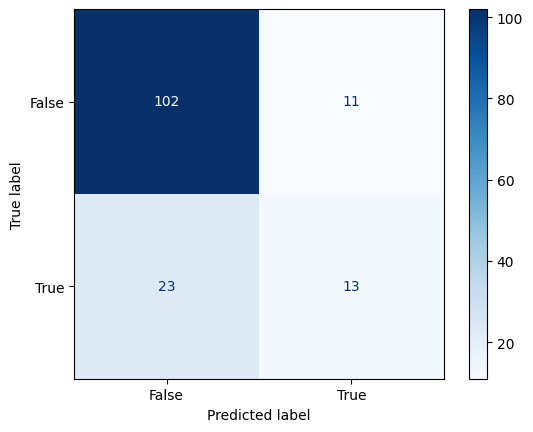

In [17]:
# with Lu & Taiwanese
fivefolds_whisper_WhisperForAudioClassification_v2_15k_3 = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k_3.csv') #whisper-WhisperForAudioClassification-v3-10k_2.csv
fivefolds_whisper_WhisperForAudioClassification_v2_15k_3['result'] = np.where(fivefolds_whisper_WhisperForAudioClassification_v2_15k_3['hyps'] >= 0.5,1,0)
fivefolds_whisper_WhisperForAudioClassification_v2_15k_3_wrong = fivefolds_whisper_WhisperForAudioClassification_v2_15k_3.iloc[np.where(fivefolds_whisper_WhisperForAudioClassification_v2_15k_3['ifcorrect'] == False)]
print(fivefolds_whisper_WhisperForAudioClassification_v2_15k_3_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
fivefolds_whisper_WhisperForAudioClassification_v2_15k_3_result = fivefolds_whisper_WhisperForAudioClassification_v2_15k_3['result'].tolist()
fivefolds_whisper_WhisperForAudioClassification_v2_15k_3_hyps = fivefolds_whisper_WhisperForAudioClassification_v2_15k_3['hyps'].tolist()
fivefolds_whisper_WhisperForAudioClassification_v2_15k_3_truth = [int(i) for i in fivefolds_whisper_WhisperForAudioClassification_v2_15k_3['truth'].tolist()]
print(classification_report(fivefolds_whisper_WhisperForAudioClassification_v2_15k_3_truth, fivefolds_whisper_WhisperForAudioClassification_v2_15k_3_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_WhisperForAudioClassification_v2_15k_3_truth, fivefolds_whisper_WhisperForAudioClassification_v2_15k_3_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))
fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_3_truth), np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_3_hyps), pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))
y_test = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v2_15k_3_truth]
y_pred = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v2_15k_3_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

                               name      hyps  truth  ifcorrect  result
2   data_process\CTT5-1-2\19CTT.wav  0.758730    0.0      False       1
5   data_process\CTT5-1-2\33CTT.wav  0.847273    0.0      False       1
7   data_process\CTT5-1-2\35CTT.wav  0.263096    1.0      False       0
8   data_process\CTT5-1-2\40CTT.wav  0.486742    1.0      False       0
10  data_process\CTT5-1-2\51CTT.wav  0.603383    0.0      False       1
16  data_process\CTT5-1-2\85CTT.wav  0.670791    0.0      False       1
19  data_process\CTT5-2-2\11CTT.wav  0.387709    1.0      False       0
20  data_process\CTT5-2-2\25CTT.wav  0.365935    1.0      False       0
22  data_process\CTT5-2-2\37CTT.wav  0.250049    1.0      False       0
23  data_process\CTT5-2-2\39CTT.wav  0.195375    1.0      False       0
24  data_process\CTT5-2-2\45CTT.wav  0.084701    1.0      False       0
25  data_process\CTT5-2-2\46CTT.wav  0.241968    1.0      False       0
27  data_process\CTT5-2-2\67CTT.wav  0.333493    1.0      False 

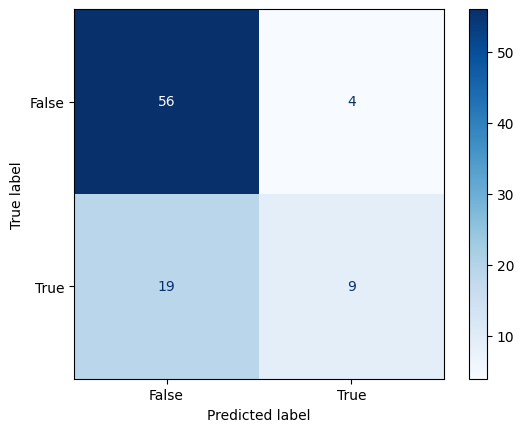

In [18]:
# with correct 5-fold-15
fivefolds_whisper_WhisperForAudioClassification_v2_15k_2 = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k_2.csv') #whisper-WhisperForAudioClassification-v3-10k_2.csv
fivefolds_whisper_WhisperForAudioClassification_v2_15k_2['result'] = np.where(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2['hyps'] >= 0.5,1,0)
fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_wrong = fivefolds_whisper_WhisperForAudioClassification_v2_15k_2.iloc[np.where(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2['ifcorrect'] == False)]
print(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_result = fivefolds_whisper_WhisperForAudioClassification_v2_15k_2['result'].tolist()
fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_hyps = fivefolds_whisper_WhisperForAudioClassification_v2_15k_2['hyps'].tolist()
fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_truth = [int(i) for i in fivefolds_whisper_WhisperForAudioClassification_v2_15k_2['truth'].tolist()]
print(classification_report(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_truth, fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_result, target_names=target_names))

tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_truth, fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_truth), np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_truth[0:19]), np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_truth[19:37]), np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_truth[37:54]), np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_truth[54:71]), np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_truth[71:88]), np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_truth]
y_pred = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v2_15k_2_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [19]:
# # with means() 5-fold-15
# fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k_with30separate.csv') #whisper-WhisperForAudioClassification-v3-10k_2.csv
# fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate['result'] = np.where(fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate['hyps'] >= 0.5,1,0)
# fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_wrong = fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate.iloc[np.where(fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate['ifcorrect'] == False)]
# print(fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_wrong)
# # print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
# fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_result = fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate['result'].tolist()
# fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_hyps = fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate['hyps'].tolist()
# fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_truth = [int(i) for i in fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate['truth'].tolist()]
# print(classification_report(fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_truth, fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_truth, fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_truth), np.array(fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_truth]
# y_pred = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_result]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

#### v2 decoder

In [20]:
# # with correct 5-fold-15
# fivefolds_whisper_v2_15k_with_id_2 = pd.read_csv('whisper-v2-15k_with_id_2.csv')
# fivefolds_whisper_v2_15k_with_id_2['result'] = np.where(fivefolds_whisper_v2_15k_with_id_2['hyps'] >= 0.5,1,0)
# fivefolds_whisper_v2_15k_with_id_2_wrong = fivefolds_whisper_v2_15k_with_id_2.iloc[np.where(fivefolds_whisper_v2_15k_with_id_2['ifcorrect'] == False)]
# print(fivefolds_whisper_v2_15k_with_id_2_wrong)
# # print(fivefolds_whisper_v3_10k_with_id_2.head(20))
# fivefolds_whisper_v2_15k_with_id_2_result = fivefolds_whisper_v2_15k_with_id_2['result'].tolist()
# fivefolds_whisper_v2_15k_with_id_2_hyps = fivefolds_whisper_v2_15k_with_id_2['hyps'].tolist()
# fivefolds_whisper_v2_15k_with_id_2_truth = [int(i) for i in fivefolds_whisper_v2_15k_with_id_2['truth'].tolist()]
# print(classification_report(fivefolds_whisper_v2_15k_with_id_2_truth, fivefolds_whisper_v2_15k_with_id_2_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_v2_15k_with_id_2_truth, fivefolds_whisper_v2_15k_with_id_2_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_v2_15k_with_id_2_truth), np.array(fivefolds_whisper_v2_15k_with_id_2_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper_v2_15k_with_id_2_truth]
# y_pred = [bool(int(x)) for x in fivefolds_whisper_v2_15k_with_id_2_result]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

#### v2 ori

In [21]:
# # with correct 5-fold-10
# fivefolds_whisper_WhisperForAudioClassification_v2_10k_2 = pd.read_csv('whisper-WhisperForAudioClassification-2-v2-10k.csv')
# fivefolds_whisper_WhisperForAudioClassification_v2_10k_2['result'] = np.where(fivefolds_whisper_WhisperForAudioClassification_v2_10k_2['hyps'] >= 0.5,1,0)
# fivefolds_whisper_WhisperForAudioClassification_v2_10k_2_wrong = fivefolds_whisper_WhisperForAudioClassification_v2_10k_2.iloc[np.where(fivefolds_whisper_WhisperForAudioClassification_v2_10k_2['ifcorrect'] == False)]
# print(fivefolds_whisper_WhisperForAudioClassification_v2_10k_2_wrong)
# # print(fivefolds_whisper_WhisperForAudioClassification_v2_10k_2.head(20))
# fivefolds_whisper_WhisperForAudioClassification_v2_10k_2_result = fivefolds_whisper_WhisperForAudioClassification_v2_10k_2['result'].tolist()
# fivefolds_whisper_WhisperForAudioClassification_v2_10k_2_hyps = fivefolds_whisper_WhisperForAudioClassification_v2_10k_2['hyps'].tolist()
# fivefolds_whisper_WhisperForAudioClassification_v2_10k_2_truth = [int(i) for i in fivefolds_whisper_WhisperForAudioClassification_v2_10k_2['truth'].tolist()]
# print(classification_report(fivefolds_whisper_WhisperForAudioClassification_v2_10k_2_truth, fivefolds_whisper_WhisperForAudioClassification_v2_10k_2_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_WhisperForAudioClassification_v2_10k_2_truth, fivefolds_whisper_WhisperForAudioClassification_v2_10k_2_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v2_10k_2_truth), np.array(fivefolds_whisper_WhisperForAudioClassification_v2_10k_2_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v2_10k_2_truth]
# y_pred = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v2_10k_2_result]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [22]:
# fivefolds_whisper_WhisperForAudioClassification_v2_10k = pd.read_csv('whisper-WhisperForAudioClassification-v2-10k.csv')
# fivefolds_whisper_WhisperForAudioClassification_v2_10k['result'] = np.where(fivefolds_whisper_WhisperForAudioClassification_v2_10k['hyps'] >= 0.5,1,0)
# fivefolds_whisper_WhisperForAudioClassification_v2_10k_wrong = fivefolds_whisper_WhisperForAudioClassification_v2_10k.iloc[np.where(fivefolds_whisper_WhisperForAudioClassification_v2_10k['ifcorrect'] == False)]
# print(fivefolds_whisper_WhisperForAudioClassification_v2_10k_wrong)
# # print(fivefolds_whisper_WhisperForAudioClassification_v2_10k.head(20))
# fivefolds_whisper_WhisperForAudioClassification_v2_10k_result = fivefolds_whisper_WhisperForAudioClassification_v2_10k['result'].tolist()
# fivefolds_whisper_WhisperForAudioClassification_v2_10k_hyps = fivefolds_whisper_WhisperForAudioClassification_v2_10k['hyps'].tolist()
# fivefolds_whisper_WhisperForAudioClassification_v2_10k_truth = [int(i) for i in fivefolds_whisper_WhisperForAudioClassification_v2_10k['truth'].tolist()]
# print(classification_report(fivefolds_whisper_WhisperForAudioClassification_v2_10k_truth, fivefolds_whisper_WhisperForAudioClassification_v2_10k_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_WhisperForAudioClassification_v2_10k_truth, fivefolds_whisper_WhisperForAudioClassification_v2_10k_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v2_10k_truth), np.array(fivefolds_whisper_WhisperForAudioClassification_v2_10k_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v2_10k_truth]
# y_pred = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v2_10k_result]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [23]:
# # with correct 5-fold-10
# fivefolds_whisper_v2_10k_with_id_2 = pd.read_csv('whisper-v2-10k_with_id_2.csv')
# fivefolds_whisper_v2_10k_with_id_2['result'] = np.where(fivefolds_whisper_v2_10k_with_id_2['hyps'] >= 0.5,1,0)
# fivefolds_whisper_v2_10k_with_id_2_wrong = fivefolds_whisper_v2_10k_with_id_2.iloc[np.where(fivefolds_whisper_v2_10k_with_id_2['ifcorrect'] == False)]
# print(fivefolds_whisper_v2_10k_with_id_2_wrong)
# # print(fivefolds_whisper_v2_10k_with_id_2.head(20))
# fivefolds_whisper_v2_10k_with_id_2_result = fivefolds_whisper_v2_10k_with_id_2['result'].tolist()
# fivefolds_whisper_v2_10k_with_id_2_hyps = fivefolds_whisper_v2_10k_with_id_2['hyps'].tolist()
# fivefolds_whisper_v2_10k_with_id_2_truth = [int(i) for i in fivefolds_whisper_v2_10k_with_id_2['truth'].tolist()]
# print(classification_report(fivefolds_whisper_v2_10k_with_id_2_truth, fivefolds_whisper_v2_10k_with_id_2_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_v2_10k_with_id_2_truth, fivefolds_whisper_v2_10k_with_id_2_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_v2_10k_with_id_2_truth), np.array(fivefolds_whisper_v2_10k_with_id_2_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper_v2_10k_with_id_2_truth]
# y_pred = [bool(int(x)) for x in fivefolds_whisper_v2_10k_with_id_2_result]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [24]:
# fivefolds_whisper_v2_10k_with_id = pd.read_csv('whisper-v2-10k_with_id.csv')
# fivefolds_whisper_v2_10k_with_id['result'] = np.where(fivefolds_whisper_v2_10k_with_id['hyps'] >= 0.5,1,0)
# fivefolds_whisper_v2_10k_with_id_wrong = fivefolds_whisper_v2_10k_with_id.iloc[np.where(fivefolds_whisper_v2_10k_with_id['ifcorrect'] == False)]
# print(fivefolds_whisper_v2_10k_with_id_wrong)
# # print(fivefolds_whisper_v2_10k_with_id.head(20))
# fivefolds_whisper_v2_10k_with_id_result = fivefolds_whisper_v2_10k_with_id['result'].tolist()
# fivefolds_whisper_v2_10k_with_id_hyps = fivefolds_whisper_v2_10k_with_id['hyps'].tolist()
# fivefolds_whisper_v2_10k_with_id_truth = [int(i) for i in fivefolds_whisper_v2_10k_with_id['truth'].tolist()]
# print(classification_report(fivefolds_whisper_v2_10k_with_id_truth, fivefolds_whisper_v2_10k_with_id_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_v2_10k_with_id_truth, fivefolds_whisper_v2_10k_with_id_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_v2_10k_with_id_truth), np.array(fivefolds_whisper_v2_10k_with_id_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper_v2_10k_with_id_truth]
# y_pred = [bool(int(x)) for x in fivefolds_whisper_v2_10k_with_id_result]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [25]:
# fivefolds_whisper_v2_10k = pd.read_csv('whisper-v2-10k.csv')
# fivefolds_whisper_v2_10k['result'] = np.where(fivefolds_whisper_v2_10k['hyps'] >= 0.5,1,0)
# fivefolds_whisper_v2_10k_wrong = fivefolds_whisper_v2_10k.iloc[np.where(fivefolds_whisper_v2_10k['ifcorrect'] == False)]
# print(fivefolds_whisper_v2_10k_wrong)
# # print(fivefolds_whisper_v2_10k.head(20))
# fivefolds_whisper_v2_10k_result = fivefolds_whisper_v2_10k['result'].tolist()
# fivefolds_whisper_v2_10k_hyps = fivefolds_whisper_v2_10k['hyps'].tolist()
# fivefolds_whisper_v2_10k_truth = [int(i) for i in fivefolds_whisper_v2_10k['truth'].tolist()]
# print(classification_report(fivefolds_whisper_v2_10k_truth, fivefolds_whisper_v2_10k_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_v2_10k_truth, fivefolds_whisper_v2_10k_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_v2_10k_truth), np.array(fivefolds_whisper_v2_10k_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

### v3

#### v3 encoder

                                name      hyps  truth  ifcorrect  result
2      data_process\CTT5-1-9\004.wav  0.524286    0.0      False       1
8      data_process\CTT5-1-9\010.wav  0.548921    0.0      False       1
12   data_process\CTT5-1-9\19CTT.wav  0.616771    0.0      False       1
14   data_process\CTT5-1-9\23CTT.wav  0.909558    0.0      False       1
17   data_process\CTT5-1-9\33CTT.wav  0.807344    0.0      False       1
19   data_process\CTT5-1-9\35CTT.wav  0.269027    1.0      False       0
20   data_process\CTT5-1-9\40CTT.wav  0.453501    1.0      False       0
22   data_process\CTT5-1-9\51CTT.wav  0.521434    0.0      False       1
23   data_process\CTT5-1-9\53CTT.wav  0.556264    0.0      False       1
28   data_process\CTT5-1-9\85CTT.wav  0.673020    0.0      False       1
46   data_process\CTT5-2-9\37CTT.wav  0.390992    1.0      False       0
47   data_process\CTT5-2-9\39CTT.wav  0.301379    1.0      False       0
48   data_process\CTT5-2-9\45CTT.wav  0.158306    1

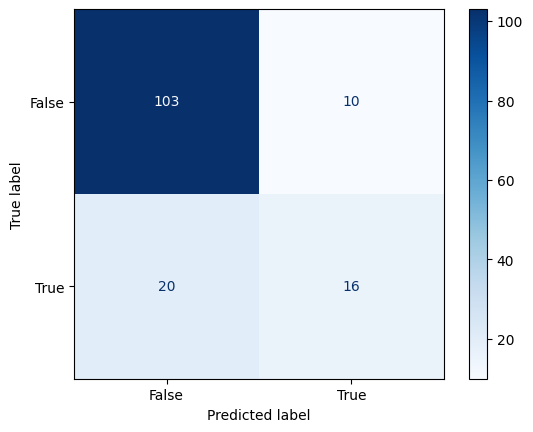

In [26]:
# with Lu & Taiwanese
fivefolds_whisper_WhisperForAudioClassification_v3_15k_3 = pd.read_csv('whisper-WhisperForAudioClassification-v3-15k_3.csv') #whisper-WhisperForAudioClassification-v3-10k_2.csv
fivefolds_whisper_WhisperForAudioClassification_v3_15k_3['result'] = np.where(fivefolds_whisper_WhisperForAudioClassification_v3_15k_3['hyps'] >= 0.5,1,0)
fivefolds_whisper_WhisperForAudioClassification_v3_15k_3_wrong = fivefolds_whisper_WhisperForAudioClassification_v3_15k_3.iloc[np.where(fivefolds_whisper_WhisperForAudioClassification_v3_15k_3['ifcorrect'] == False)]
print(fivefolds_whisper_WhisperForAudioClassification_v3_15k_3_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
fivefolds_whisper_WhisperForAudioClassification_v3_15k_3_result = fivefolds_whisper_WhisperForAudioClassification_v3_15k_3['result'].tolist()
fivefolds_whisper_WhisperForAudioClassification_v3_15k_3_hyps = fivefolds_whisper_WhisperForAudioClassification_v3_15k_3['hyps'].tolist()
fivefolds_whisper_WhisperForAudioClassification_v3_15k_3_truth = [int(i) for i in fivefolds_whisper_WhisperForAudioClassification_v3_15k_3['truth'].tolist()]
print(classification_report(fivefolds_whisper_WhisperForAudioClassification_v3_15k_3_truth, fivefolds_whisper_WhisperForAudioClassification_v3_15k_3_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_WhisperForAudioClassification_v3_15k_3_truth, fivefolds_whisper_WhisperForAudioClassification_v3_15k_3_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))
fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_3_truth), np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_3_hyps), pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))
y_test = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v3_15k_3_truth]
y_pred = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v3_15k_3_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

                               name      hyps  truth  ifcorrect  result
2   data_process\CTT5-1-2\19CTT.wav  0.616771    0.0      False       1
5   data_process\CTT5-1-2\33CTT.wav  0.807344    0.0      False       1
7   data_process\CTT5-1-2\35CTT.wav  0.269027    1.0      False       0
8   data_process\CTT5-1-2\40CTT.wav  0.453501    1.0      False       0
10  data_process\CTT5-1-2\51CTT.wav  0.521434    0.0      False       1
11  data_process\CTT5-1-2\53CTT.wav  0.556264    0.0      False       1
16  data_process\CTT5-1-2\85CTT.wav  0.673020    0.0      False       1
22  data_process\CTT5-2-2\37CTT.wav  0.390992    1.0      False       0
23  data_process\CTT5-2-2\39CTT.wav  0.301379    1.0      False       0
24  data_process\CTT5-2-2\45CTT.wav  0.158306    1.0      False       0
25  data_process\CTT5-2-2\46CTT.wav  0.264406    1.0      False       0
27  data_process\CTT5-2-2\67CTT.wav  0.367943    1.0      False       0
37  data_process\CTT5-3-2\18CTT.wav  0.203939    1.0      False 

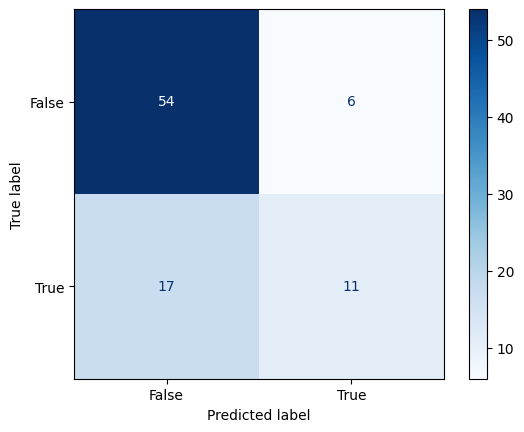

In [27]:
# with correct 5-fold-15
fivefolds_whisper_WhisperForAudioClassification_v3_15k_2 = pd.read_csv('whisper-WhisperForAudioClassification-v3-15k_2.csv') #whisper-WhisperForAudioClassification-v3-10k_2.csv
fivefolds_whisper_WhisperForAudioClassification_v3_15k_2['result'] = np.where(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2['hyps'] >= 0.5,1,0)
fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_wrong = fivefolds_whisper_WhisperForAudioClassification_v3_15k_2.iloc[np.where(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2['ifcorrect'] == False)]
print(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_result = fivefolds_whisper_WhisperForAudioClassification_v3_15k_2['result'].tolist()
fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_hyps = fivefolds_whisper_WhisperForAudioClassification_v3_15k_2['hyps'].tolist()
fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_truth = [int(i) for i in fivefolds_whisper_WhisperForAudioClassification_v3_15k_2['truth'].tolist()]
print(classification_report(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_truth, fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_result, target_names=target_names))

tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_truth, fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_truth), np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_truth[0:19]), np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_truth[19:37]), np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_truth[37:54]), np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_truth[54:71]), np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_truth[71:88]), np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_truth]
y_pred = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v3_15k_2_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [28]:
# # with means() 5-fold-15
# fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate = pd.read_csv('whisper-WhisperForAudioClassification-v3-15k_with30separate.csv') #whisper-WhisperForAudioClassification-v3-10k_2.csv
# fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate['result'] = np.where(fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate['hyps'] >= 0.5,1,0)
# fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_wrong = fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate.iloc[np.where(fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate['ifcorrect'] == False)]
# print(fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_wrong)
# # print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
# fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_result = fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate['result'].tolist()
# fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_hyps = fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate['hyps'].tolist()
# fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_truth = [int(i) for i in fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate['truth'].tolist()]
# print(classification_report(fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_truth, fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_truth, fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_truth), np.array(fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_truth]
# y_pred = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_result]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

#### v3 decoder

In [29]:
# # with correct 5-fold-15
# fivefolds_whisper_v3_15k_with_id_2 = pd.read_csv('whisper-v3-15k_with_id_2.csv')
# fivefolds_whisper_v3_15k_with_id_2['result'] = np.where(fivefolds_whisper_v3_15k_with_id_2['hyps'] >= 0.5,1,0)
# fivefolds_whisper_v3_15k_with_id_2_wrong = fivefolds_whisper_v3_15k_with_id_2.iloc[np.where(fivefolds_whisper_v3_15k_with_id_2['ifcorrect'] == False)]
# print(fivefolds_whisper_v3_15k_with_id_2_wrong)
# # print(fivefolds_whisper_v3_10k_with_id_2.head(20))
# fivefolds_whisper_v3_15k_with_id_2_result = fivefolds_whisper_v3_15k_with_id_2['result'].tolist()
# fivefolds_whisper_v3_15k_with_id_2_hyps = fivefolds_whisper_v3_15k_with_id_2['hyps'].tolist()
# fivefolds_whisper_v3_15k_with_id_2_truth = [int(i) for i in fivefolds_whisper_v3_15k_with_id_2['truth'].tolist()]
# print(classification_report(fivefolds_whisper_v3_15k_with_id_2_truth, fivefolds_whisper_v3_15k_with_id_2_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_v3_15k_with_id_2_truth, fivefolds_whisper_v3_15k_with_id_2_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_v3_15k_with_id_2_truth), np.array(fivefolds_whisper_v3_15k_with_id_2_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper_v3_15k_with_id_2_truth]
# y_pred = [bool(int(x)) for x in fivefolds_whisper_v3_15k_with_id_2_result]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

#### v3 ori

In [30]:
# # with correct 5-fold-10
# fivefolds_whisper_WhisperForAudioClassification_v3_10k_2 = pd.read_csv('whisper-WhisperForAudioClassification-2-v3-10k.csv') #whisper-WhisperForAudioClassification-v3-10k_2.csv
# fivefolds_whisper_WhisperForAudioClassification_v3_10k_2['result'] = np.where(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2['hyps'] >= 0.5,1,0)
# fivefolds_whisper_WhisperForAudioClassification_v3_10k_2_wrong = fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.iloc[np.where(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2['ifcorrect'] == False)]
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2_wrong)
# # print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
# fivefolds_whisper_WhisperForAudioClassification_v3_10k_2_result = fivefolds_whisper_WhisperForAudioClassification_v3_10k_2['result'].tolist()
# fivefolds_whisper_WhisperForAudioClassification_v3_10k_2_hyps = fivefolds_whisper_WhisperForAudioClassification_v3_10k_2['hyps'].tolist()
# fivefolds_whisper_WhisperForAudioClassification_v3_10k_2_truth = [int(i) for i in fivefolds_whisper_WhisperForAudioClassification_v3_10k_2['truth'].tolist()]
# print(classification_report(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2_truth, fivefolds_whisper_WhisperForAudioClassification_v3_10k_2_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2_truth, fivefolds_whisper_WhisperForAudioClassification_v3_10k_2_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2_truth), np.array(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v3_10k_2_truth]
# y_pred = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v3_10k_2_result]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [31]:
# fivefolds_whisper_WhisperForAudioClassification_v3_10k = pd.read_csv('whisper-WhisperForAudioClassification-v3-10k.csv')
# fivefolds_whisper_WhisperForAudioClassification_v3_10k['result'] = np.where(fivefolds_whisper_WhisperForAudioClassification_v3_10k['hyps'] >= 0.5,1,0)
# fivefolds_whisper_WhisperForAudioClassification_v3_10k_wrong = fivefolds_whisper_WhisperForAudioClassification_v3_10k.iloc[np.where(fivefolds_whisper_WhisperForAudioClassification_v3_10k['ifcorrect'] == False)]
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_wrong)
# # print(fivefolds_whisper_WhisperForAudioClassification_v3_10k.head(20))
# fivefolds_whisper_WhisperForAudioClassification_v3_10k_result = fivefolds_whisper_WhisperForAudioClassification_v3_10k['result'].tolist()
# fivefolds_whisper_WhisperForAudioClassification_v3_10k_hyps = fivefolds_whisper_WhisperForAudioClassification_v3_10k['hyps'].tolist()
# fivefolds_whisper_WhisperForAudioClassification_v3_10k_truth = [int(i) for i in fivefolds_whisper_WhisperForAudioClassification_v3_10k['truth'].tolist()]
# print(classification_report(fivefolds_whisper_WhisperForAudioClassification_v3_10k_truth, fivefolds_whisper_WhisperForAudioClassification_v3_10k_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_WhisperForAudioClassification_v3_10k_truth, fivefolds_whisper_WhisperForAudioClassification_v3_10k_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_WhisperForAudioClassification_v3_10k_truth), np.array(fivefolds_whisper_WhisperForAudioClassification_v3_10k_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v3_10k_truth]
# y_pred = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v3_10k_result]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [32]:
# # with correct 5-fold-10
# fivefolds_whisper_v3_10k_with_id_2 = pd.read_csv('whisper-v3-10k_with_id_2.csv')
# fivefolds_whisper_v3_10k_with_id_2['result'] = np.where(fivefolds_whisper_v3_10k_with_id_2['hyps'] >= 0.5,1,0)
# fivefolds_whisper_v3_10k_with_id_2_wrong = fivefolds_whisper_v3_10k_with_id_2.iloc[np.where(fivefolds_whisper_v3_10k_with_id_2['ifcorrect'] == False)]
# print(fivefolds_whisper_v3_10k_with_id_2_wrong)
# # print(fivefolds_whisper_v3_10k_with_id_2.head(20))
# fivefolds_whisper_v3_10k_with_id_2_result = fivefolds_whisper_v3_10k_with_id_2['result'].tolist()
# fivefolds_whisper_v3_10k_with_id_2_hyps = fivefolds_whisper_v3_10k_with_id_2['hyps'].tolist()
# fivefolds_whisper_v3_10k_with_id_2_truth = [int(i) for i in fivefolds_whisper_v3_10k_with_id_2['truth'].tolist()]
# print(classification_report(fivefolds_whisper_v3_10k_with_id_2_truth, fivefolds_whisper_v3_10k_with_id_2_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_v3_10k_with_id_2_truth, fivefolds_whisper_v3_10k_with_id_2_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_v3_10k_with_id_2_truth), np.array(fivefolds_whisper_v3_10k_with_id_2_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper_v3_10k_with_id_2_truth]
# y_pred = [bool(int(x)) for x in fivefolds_whisper_v3_10k_with_id_2_result]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [33]:
# fivefolds_whisper_v3_10k_with_id = pd.read_csv('whisper-v3-10k_with_id.csv')
# fivefolds_whisper_v3_10k_with_id['result'] = np.where(fivefolds_whisper_v3_10k_with_id['hyps'] >= 0.5,1,0)
# fivefolds_whisper_v3_10k_with_id_wrong = fivefolds_whisper_v3_10k_with_id.iloc[np.where(fivefolds_whisper_v3_10k_with_id['ifcorrect'] == False)]
# print(fivefolds_whisper_v3_10k_with_id_wrong)
# # print(fivefolds_whisper_v3_10k_with_id.head(20))
# fivefolds_whisper_v3_10k_with_id_result = fivefolds_whisper_v3_10k_with_id['result'].tolist()
# fivefolds_whisper_v3_10k_with_id_hyps = fivefolds_whisper_v3_10k_with_id['hyps'].tolist()
# fivefolds_whisper_v3_10k_with_id_truth = [int(i) for i in fivefolds_whisper_v3_10k_with_id['truth'].tolist()]
# print(classification_report(fivefolds_whisper_v3_10k_with_id_truth, fivefolds_whisper_v3_10k_with_id_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_v3_10k_with_id_truth, fivefolds_whisper_v3_10k_with_id_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_v3_10k_with_id_truth), np.array(fivefolds_whisper_v3_10k_with_id_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# y_test = [bool(int(x)) for x in fivefolds_whisper_v3_10k_with_id_truth]
# y_pred = [bool(int(x)) for x in fivefolds_whisper_v3_10k_with_id_result]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [34]:
# fivefolds_whisper_v3_10k = pd.read_csv('whisper-v3-10k.csv')
# fivefolds_whisper_v3_10k['result'] = np.where(fivefolds_whisper_v3_10k['hyps'] >= 0.5,1,0)
# fivefolds_whisper_v3_10k_wrong = fivefolds_whisper_v3_10k.iloc[np.where(fivefolds_whisper_v3_10k['ifcorrect'] == False)]
# print(fivefolds_whisper_v3_10k_wrong)
# # print(fivefolds_whisper_v3_10k.head(20))
# fivefolds_whisper_v3_10k_result = fivefolds_whisper_v3_10k['result'].tolist()
# fivefolds_whisper_v3_10k_hyps = fivefolds_whisper_v3_10k['hyps'].tolist()
# fivefolds_whisper_v3_10k_truth = [int(i) for i in fivefolds_whisper_v3_10k['truth'].tolist()]
# print(classification_report(fivefolds_whisper_v3_10k_truth, fivefolds_whisper_v3_10k_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_v3_10k_truth, fivefolds_whisper_v3_10k_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_whisper_v3_10k_truth), np.array(fivefolds_whisper_v3_10k_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

In [35]:
# fivefolds_with30_10k = pd.read_csv('whisper-with30-10k.csv')
# fivefolds_with30_10k['result'] = np.where(fivefolds_with30_10k['hyps'] >= 0.5,1,0)
# fivefolds_with30_10k_wrong = fivefolds_with30_10k.iloc[np.where(fivefolds_with30_10k['ifcorrect'] == False)]
# print(fivefolds_with30_10k_wrong)
# # print(fivefolds_with30_10k.head(20))
# fivefolds_with30_10k_result = fivefolds_with30_10k['result'].tolist()
# fivefolds_with30_10k_hyps = fivefolds_with30_10k['hyps'].tolist()
# fivefolds_with30_10k_truth = [int(i) for i in fivefolds_with30_10k['truth'].tolist()]
# print(classification_report(fivefolds_with30_10k_truth, fivefolds_with30_10k_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_with30_10k_truth, fivefolds_with30_10k_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_with30_10k_truth), np.array(fivefolds_with30_10k_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

In [36]:
# fivefolds_with30separate0_10k = pd.read_csv('whisper-with30separate0-10k.csv')
# fivefolds_with30separate0_10k['result'] = np.where(fivefolds_with30separate0_10k['hyps'] >= 0.5,1,0)
# fivefolds_with30separate0_wrong = fivefolds_with30separate0_10k.iloc[np.where(fivefolds_with30separate0_10k['ifcorrect'] == False)]
# print(fivefolds_with30separate0_wrong)
# # print(fivefolds_with30separate0_10k.head(20))
# fivefolds_with30separate0_result = fivefolds_with30separate0_10k['result'].tolist()
# fivefolds_with30separate0_hyps = fivefolds_with30separate0_10k['hyps'].tolist()
# fivefolds_with30separate0_truth = [int(i) for i in fivefolds_with30separate0_10k['truth'].tolist()]
# print(classification_report(fivefolds_with30separate0_truth, fivefolds_with30separate0_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_with30separate0_truth, fivefolds_with30separate0_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_with30separate0_truth), np.array(fivefolds_with30separate0_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

In [37]:
# fivefolds_with30separate_10k = pd.read_csv('whisper-with30separate-10k.csv')
# fivefolds_with30separate_10k['result'] = np.where(fivefolds_with30separate_10k['hyps'] >= 0.5,1,0)
# fivefolds_with30separate_wrong = fivefolds_with30separate_10k.iloc[np.where(fivefolds_with30separate_10k['ifcorrect'] == False)]
# print(fivefolds_with30separate_wrong)
# # print(fivefolds_with30separate_10k.head(20))
# fivefolds_with30separate_result = fivefolds_with30separate_10k['result'].tolist()
# fivefolds_with30separate_hyps = fivefolds_with30separate_10k['hyps'].tolist()
# fivefolds_with30separate_truth = [int(i) for i in fivefolds_with30separate_10k['truth'].tolist()]
# print(classification_report(fivefolds_with30separate_truth, fivefolds_with30separate_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_with30separate_truth, fivefolds_with30separate_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_with30separate_truth), np.array(fivefolds_with30separate_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

In [38]:
# fivefolds_with30separate_10k = pd.read_csv('whisper-with30separate-10k.csv')
# result = np.where(fivefolds_with30separate_10k['hyps'] >= 0.5,1,0)
# name = fivefolds_with30separate_10k['name'].values.tolist()
# truth = fivefolds_with30separate_10k['truth'].values.tolist()
# allresult = np.full([100, 7], np.nan)
# major = np.zeros([100, 3])
# majorvote = np.zeros([100, 3])
# correct = 0

# for i in range(len(name)):
#     file = int(name[i].split('\\')[-1].split('C')[0])
#     idx = int(name[i].split('\\')[-1].split('_')[1])
#     allresult[file-1][0] = file
#     allresult[file-1][idx] = result[i]
#     major[file-1][int(result[i])] += 1
#     major[file-1][2] = truth[i]

# for i in range(len(major)):
#     if(i != 23 and i != 26 and i != 27 and i != 36 and i != 41 and i != 48 and i != 49 and i != 59 and i != 60 and i != 61 and i != 62 and i != 66):
#         majorvote[i][0] = i+1
#         majorvote[i][1] = 0 if (major[i][0] >= major[i][1]) else 1
#         majorvote[i][2] = major[i][2]
#         if(majorvote[i][1] == majorvote[i][2]): 
#             correct += 1

# print(correct, 88, correct/88)
# allresult_df = pd.DataFrame(allresult)
# allresult_df.to_csv(f'whisper-with30separate_allresult.csv', index=False) 

In [39]:
# fivefolds_with2separate_10k = pd.read_csv('whisper-with2separate-10k.csv')
# fivefolds_with2separate_10k['result'] = np.where(fivefolds_with2separate_10k['hyps'] >= 0.5,1,0)
# fivefolds_with2separate_wrong = fivefolds_with2separate_10k.iloc[np.where(fivefolds_with2separate_10k['ifcorrect'] == False)]
# print(fivefolds_with2separate_wrong)
# # print(fivefolds_with2separate_10k.head(20))
# fivefolds_with2separate_result = fivefolds_with2separate_10k['result'].tolist()
# fivefolds_with2separate_hyps = fivefolds_with2separate_10k['hyps'].tolist()
# fivefolds_with2separate_truth = [int(i) for i in fivefolds_with2separate_10k['truth'].tolist()]
# print(classification_report(fivefolds_with2separate_truth, fivefolds_with2separate_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_with2separate_truth, fivefolds_with2separate_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_with2separate_truth), np.array(fivefolds_with2separate_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

In [40]:
# fivefolds_with2separate_10k = pd.read_csv('whisper-with2separate-10k.csv')
# result = np.where(fivefolds_with2separate_10k['hyps'] >= 0.5,1,0)
# name = fivefolds_with2separate_10k['name'].values.tolist()
# truth = fivefolds_with2separate_10k['truth'].values.tolist()
# allresult = np.full([100, 105], np.nan)
# major = np.zeros([100, 3])
# majorvote = np.zeros([100, 3])
# correct = 0

# for i in range(len(name)):
#     file = int(name[i].split('\\')[-1].split('C')[0])
#     idx = int(name[i].split('\\')[-1].split('_')[1])
#     allresult[file-1][0] = file
#     allresult[file-1][idx] = result[i]
#     major[file-1][int(result[i])] += 1
#     major[file-1][2] = truth[i]

# for i in range(len(major)):
#     if(i != 23 and i != 26 and i != 27 and i != 36 and i != 41 and i != 48 and i != 49 and i != 59 and i != 60 and i != 61 and i != 62 and i != 66):
#         majorvote[i][0] = i+1
#         majorvote[i][1] = 0 if (major[i][0] >= major[i][1]) else 1
#         majorvote[i][2] = major[i][2]
#         if(majorvote[i][1] == majorvote[i][2]): 
#             correct += 1

# print(correct, 88, correct/88)
# allresult_df = pd.DataFrame(allresult)
# allresult_df.to_csv(f'whisper-with2separate_allresult.csv', index=False) 

In [41]:
# fivefolds_with10separate_10k = pd.read_csv('whisper-with10separate-10k.csv')
# fivefolds_with10separate_10k['result'] = np.where(fivefolds_with10separate_10k['hyps'] >= 0.5,1,0)
# fivefolds_with10separate_wrong = fivefolds_with10separate_10k.iloc[np.where(fivefolds_with10separate_10k['ifcorrect'] == False)]
# print(fivefolds_with10separate_wrong)
# # print(fivefolds_with10separate_10k.head(20))
# fivefolds_with10separate_result = fivefolds_with10separate_10k['result'].tolist()
# fivefolds_with10separate_hyps = fivefolds_with10separate_10k['hyps'].tolist()
# fivefolds_with10separate_truth = [int(i) for i in fivefolds_with10separate_10k['truth'].tolist()]
# print(classification_report(fivefolds_with10separate_truth, fivefolds_with10separate_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(fivefolds_with10separate_truth, fivefolds_with10separate_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_with10separate_truth), np.array(fivefolds_with10separate_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

### segment

In [42]:
fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k_with30separate.csv')
result = np.where(fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate['hyps'] >= 0.5,1,0)
name = fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate['name'].values.tolist()
truth = fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate['truth'].values.tolist()
allresult = np.full([100, 105], np.nan)
major = np.zeros([100, 3])
majorvote = np.zeros([100, 3])
correct = 0

for i in range(len(name)):
    file = int(name[i].split('\\')[-1].split('C')[0])
    idx = int(name[i].split('\\')[-1].split('_')[1].split('.')[0])
    allresult[file-1][0] = file
    allresult[file-1][idx] = result[i]
    major[file-1][int(result[i])] += 1
    major[file-1][2] = truth[i]

for i in range(len(major)):
    if(i != 23 and i != 26 and i != 27 and i != 36 and i != 41 and i != 48 and i != 49 and i != 59 and i != 60 and i != 61 and i != 62 and i != 66):
        majorvote[i][0] = i+1
        majorvote[i][1] = 0 if (major[i][0] >= major[i][1]) else 1
        majorvote[i][2] = major[i][2]
        if(majorvote[i][1] == majorvote[i][2]): 
            correct += 1

print(correct, 88, correct/88)
fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_allresult_df = pd.DataFrame(allresult)
fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_allresult_df.to_csv(f'whisper-with10separate_allresult.csv', index=False) 
fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_finalresult_df = pd.DataFrame(majorvote, columns=['name', 'result', 'truth'])
fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_finalresult_df.to_csv(f'whisper-with10separate_finalresult.csv', index=False) 
fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_finalresult_df = fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_finalresult_df.drop(['name'], axis=1)
fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_finalresult_df = fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_finalresult_df.drop([22, 25, 26, 35, 40, 47, 48, 58, 59, 60, 61, 65], axis=0)
fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_finalresult_df

65 88 0.7386363636363636


,result,truth
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
95,0.0,0.0
96,0.0,0.0
97,0.0,0.0
98,0.0,0.0


    result  truth
3      0.0    1.0
4      0.0    1.0
8      0.0    1.0
9      0.0    1.0
10     0.0    1.0
11     0.0    1.0
17     0.0    1.0
18     1.0    0.0
19     0.0    1.0
24     0.0    1.0
30     0.0    1.0
31     0.0    1.0
32     1.0    0.0
34     0.0    1.0
37     0.0    1.0
38     0.0    1.0
44     0.0    1.0
45     0.0    1.0
50     1.0    0.0
56     0.0    1.0
57     0.0    1.0
64     0.0    1.0
84     1.0    0.0
              precision    recall  f1-score   support

 non-patient       0.76      0.94      0.84        65
     patient       0.50      0.17      0.26        23

    accuracy                           0.74        88
   macro avg       0.63      0.56      0.55        88
weighted avg       0.69      0.74      0.69        88

sensitivity:  0.17391304347826086
specificity:  0.9384615384615385


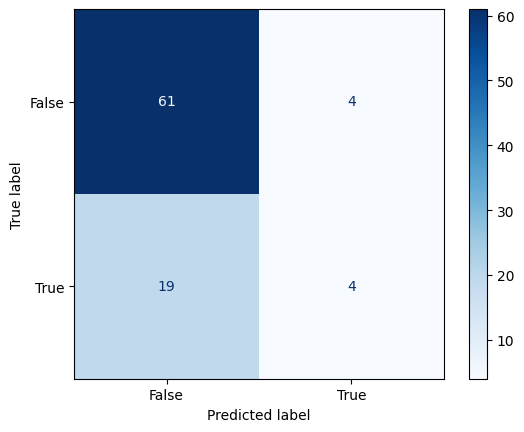

In [43]:
fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_result = fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_finalresult_df['result']
fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_truth = fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_finalresult_df['truth']
fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_wrong = fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_finalresult_df.iloc[np.where(fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_finalresult_df['result'] != fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_finalresult_df['truth'])]
print(fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_wrong)
clf_report  = classification_report(fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_truth, fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_result, target_names=target_names)
print(clf_report)
tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_truth, fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_with10separate_truth), np.array(fivefolds_with10separate_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

y_test = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_truth]
y_pred = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v2_15k_with30separate_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [44]:
fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate = pd.read_csv('whisper-WhisperForAudioClassification-v3-15k_with30separate.csv')
result = np.where(fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate['hyps'] >= 0.5,1,0)
name = fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate['name'].values.tolist()
truth = fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate['truth'].values.tolist()
allresult = np.full([100, 105], np.nan)
major = np.zeros([100, 3])
majorvote = np.zeros([100, 3])
correct = 0

for i in range(len(name)):
    file = int(name[i].split('\\')[-1].split('C')[0])
    idx = int(name[i].split('\\')[-1].split('_')[1].split('.')[0])
    allresult[file-1][0] = file
    allresult[file-1][idx] = result[i]
    major[file-1][int(result[i])] += 1
    major[file-1][2] = truth[i]

for i in range(len(major)):
    if(i != 23 and i != 26 and i != 27 and i != 36 and i != 41 and i != 48 and i != 49 and i != 59 and i != 60 and i != 61 and i != 62 and i != 66):
        majorvote[i][0] = i+1
        majorvote[i][1] = 0 if (major[i][0] >= major[i][1]) else 1
        majorvote[i][2] = major[i][2]
        if(majorvote[i][1] == majorvote[i][2]): 
            correct += 1

print(correct, 88, correct/88)
fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_allresult_df = pd.DataFrame(allresult)
fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_allresult_df.to_csv(f'whisper-with10separate_allresult.csv', index=False) 
fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_finalresult_df = pd.DataFrame(majorvote, columns=['name', 'result', 'truth'])
fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_finalresult_df.to_csv(f'whisper-with10separate_finalresult.csv', index=False) 
fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_finalresult_df = fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_finalresult_df.drop(['name'], axis=1)
fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_finalresult_df = fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_finalresult_df.drop([22, 25, 26, 35, 40, 47, 48, 58, 59, 60, 61, 65], axis=0)
fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_finalresult_df

67 88 0.7613636363636364


,result,truth
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
95,0.0,0.0
96,0.0,0.0
97,0.0,0.0
98,0.0,0.0


    result  truth
3      0.0    1.0
4      0.0    1.0
8      0.0    1.0
9      0.0    1.0
11     0.0    1.0
17     0.0    1.0
19     0.0    1.0
24     0.0    1.0
30     0.0    1.0
31     0.0    1.0
32     1.0    0.0
34     0.0    1.0
37     0.0    1.0
38     0.0    1.0
44     0.0    1.0
45     0.0    1.0
50     1.0    0.0
56     0.0    1.0
63     0.0    1.0
64     0.0    1.0
84     1.0    0.0
              precision    recall  f1-score   support

 non-patient       0.78      0.95      0.86        65
     patient       0.62      0.22      0.32        23

    accuracy                           0.76        88
   macro avg       0.70      0.59      0.59        88
weighted avg       0.74      0.76      0.72        88

sensitivity:  0.21739130434782608
specificity:  0.9538461538461539


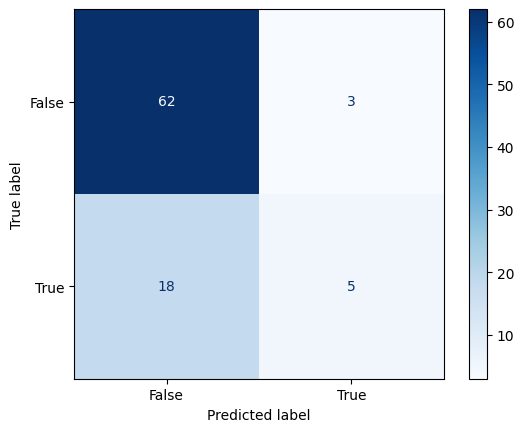

In [45]:
fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_result = fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_finalresult_df['result']
fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_truth = fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_finalresult_df['truth']
fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_wrong = fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_finalresult_df.iloc[np.where(fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_finalresult_df['result'] != fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_finalresult_df['truth'])]
print(fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_wrong)
clf_report  = classification_report(fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_truth, fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_result, target_names=target_names)
print(clf_report)
tn, fp, fn, tp = confusion_matrix(fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_truth, fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_with10separate_truth), np.array(fivefolds_with10separate_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

y_test = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_truth]
y_pred = [bool(int(x)) for x in fivefolds_whisper_WhisperForAudioClassification_v3_15k_with30separate_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

## BERT

### v1

    name      hyps  truth  ifcorrect  result
0     15  0.781967    0.0      False       1
2     19  0.928337    0.0      False       1
5     33  0.975243    0.0      False       1
7     35  0.127843    1.0      False       0
10    51  0.971446    0.0      False       1
22    37  0.397800    1.0      False       0
23    39  0.441911    1.0      False       0
24    45  0.314813    1.0      False       0
27    67  0.468601    1.0      False       0
37    18  0.234667    1.0      False       0
41    32  0.176346    1.0      False       0
42    38  0.138386    1.0      False       0
45    52  0.539933    0.0      False       1
46    57  0.074987    1.0      False       0
47    58  0.179861    1.0      False       0
55    12  0.325938    1.0      False       0
56    17  0.489667    1.0      False       0
62    63  0.243156    1.0      False       0
71    10  0.227874    1.0      False       0
74    24  0.322393    1.0      False       0
79     5  0.021002    1.0      False       0
81    69  

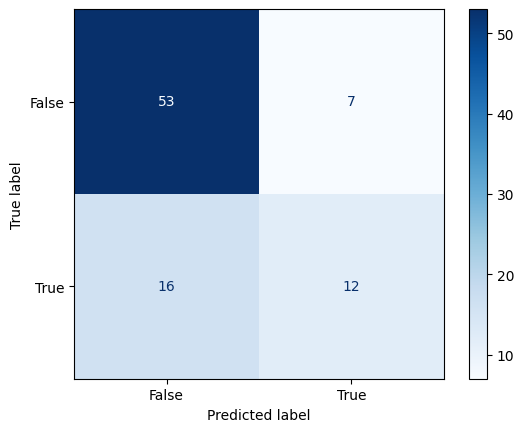

In [46]:
# with bert-v1-mean4
fivefolds_bert_v1_15k_mean4 = pd.read_csv('bert-v1-15k-mean4.csv')
fivefolds_bert_v1_15k_mean4['result'] = np.where(fivefolds_bert_v1_15k_mean4['hyps'] >= 0.5,1,0)
fivefolds_bert_v1_15k_mean4_wrong = fivefolds_bert_v1_15k_mean4.iloc[np.where(fivefolds_bert_v1_15k_mean4['ifcorrect'] == False)]
print(fivefolds_bert_v1_15k_mean4_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
fivefolds_bert_v1_15k_mean4_result = fivefolds_bert_v1_15k_mean4['result'].tolist()
fivefolds_bert_v1_15k_mean4_hyps = fivefolds_bert_v1_15k_mean4['hyps'].tolist()
fivefolds_bert_v1_15k_mean4_truth = [int(i) for i in fivefolds_bert_v1_15k_mean4['truth'].tolist()]
print(classification_report(fivefolds_bert_v1_15k_mean4_truth, fivefolds_bert_v1_15k_mean4_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(fivefolds_bert_v1_15k_mean4_truth, fivefolds_bert_v1_15k_mean4_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))
fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_bert_v1_15k_mean4_truth), np.array(fivefolds_bert_v1_15k_mean4_hyps), pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))
y_test = [bool(int(x)) for x in fivefolds_bert_v1_15k_mean4_truth]
y_pred = [bool(int(x)) for x in fivefolds_bert_v1_15k_mean4_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

    name      hyps  truth  ifcorrect  result
0     15  0.836835    0.0      False       1
2     19  0.911414    0.0      False       1
3     22  0.553730    0.0      False       1
5     33  0.886240    0.0      False       1
7     35  0.244581    1.0      False       0
8     40  0.117117    1.0      False       0
10    51  0.962716    0.0      False       1
16    85  0.573864    0.0      False       1
23    39  0.450061    1.0      False       0
24    45  0.257583    1.0      False       0
28    68  0.611311    0.0      False       1
37    18  0.377709    1.0      False       0
41    32  0.107517    1.0      False       0
42    38  0.128670    1.0      False       0
46    57  0.072429    1.0      False       0
47    58  0.085245    1.0      False       0
55    12  0.371906    1.0      False       0
62    63  0.241304    1.0      False       0
71    10  0.100676    1.0      False       0
72    13  0.514225    0.0      False       1
79     5  0.028699    1.0      False       0
          

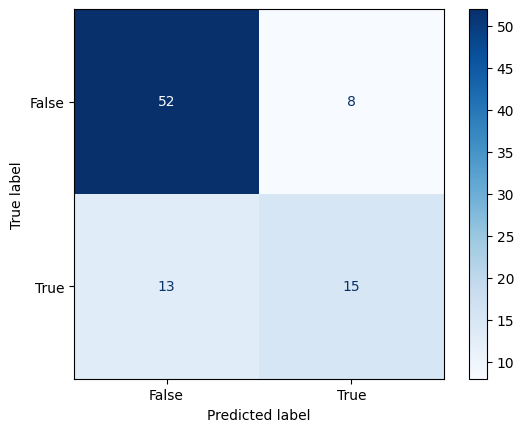

In [47]:
# with bert-v1
fivefolds_bert_v1_15k = pd.read_csv('bert-v1-15k.csv')
fivefolds_bert_v1_15k['result'] = np.where(fivefolds_bert_v1_15k['hyps'] >= 0.5,1,0)
fivefolds_bert_v1_15k_wrong = fivefolds_bert_v1_15k.iloc[np.where(fivefolds_bert_v1_15k['ifcorrect'] == False)]
print(fivefolds_bert_v1_15k_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
fivefolds_bert_v1_15k_result = fivefolds_bert_v1_15k['result'].tolist()
fivefolds_bert_v1_15k_hyps = fivefolds_bert_v1_15k['hyps'].tolist()
fivefolds_bert_v1_15k_truth = [int(i) for i in fivefolds_bert_v1_15k['truth'].tolist()]
print(classification_report(fivefolds_bert_v1_15k_truth, fivefolds_bert_v1_15k_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(fivefolds_bert_v1_15k_truth, fivefolds_bert_v1_15k_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))
fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_bert_v1_15k_truth), np.array(fivefolds_bert_v1_15k_hyps), pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))
y_test = [bool(int(x)) for x in fivefolds_bert_v1_15k_truth]
y_pred = [bool(int(x)) for x in fivefolds_bert_v1_15k_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

### v2

    name      hyps  truth  ifcorrect  result
0     15  0.780101    0.0      False       1
2     19  0.903586    0.0      False       1
5     33  0.977081    0.0      False       1
7     35  0.109072    1.0      False       0
10    51  0.871969    0.0      False       1
19    11  0.326790    1.0      False       0
22    37  0.388392    1.0      False       0
23    39  0.382135    1.0      False       0
24    45  0.280805    1.0      False       0
27    67  0.346820    1.0      False       0
37    18  0.354093    1.0      False       0
41    32  0.164999    1.0      False       0
42    38  0.248550    1.0      False       0
45    52  0.540627    0.0      False       1
46    57  0.045602    1.0      False       0
47    58  0.278414    1.0      False       0
55    12  0.462666    1.0      False       0
62    63  0.221527    1.0      False       0
71    10  0.189177    1.0      False       0
74    24  0.306028    1.0      False       0
79     5  0.109777    1.0      False       0
          

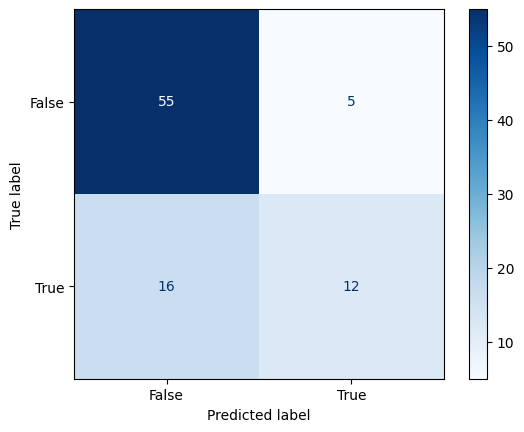

In [48]:
# with bert-v2-mean4
fivefolds_bert_v2_15k_mean4 = pd.read_csv('bert-v2-15k-mean4.csv')
fivefolds_bert_v2_15k_mean4['result'] = np.where(fivefolds_bert_v2_15k_mean4['hyps'] >= 0.5,1,0)
fivefolds_bert_v2_15k_mean4_wrong = fivefolds_bert_v2_15k_mean4.iloc[np.where(fivefolds_bert_v2_15k_mean4['ifcorrect'] == False)]
print(fivefolds_bert_v2_15k_mean4_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
fivefolds_bert_v2_15k_mean4_result = fivefolds_bert_v2_15k_mean4['result'].tolist()
fivefolds_bert_v2_15k_mean4_hyps = fivefolds_bert_v2_15k_mean4['hyps'].tolist()
fivefolds_bert_v2_15k_mean4_truth = [int(i) for i in fivefolds_bert_v2_15k_mean4['truth'].tolist()]
print(classification_report(fivefolds_bert_v2_15k_mean4_truth, fivefolds_bert_v2_15k_mean4_result, target_names=target_names))

tn, fp, fn, tp = confusion_matrix(fivefolds_bert_v2_15k_mean4_truth, fivefolds_bert_v2_15k_mean4_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth), np.array(fivefolds_bert_v2_15k_mean4_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth[0:19]), np.array(fivefolds_bert_v2_15k_mean4_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth[19:37]), np.array(fivefolds_bert_v2_15k_mean4_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth[37:54]), np.array(fivefolds_bert_v2_15k_mean4_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth[54:71]), np.array(fivefolds_bert_v2_15k_mean4_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth[71:88]), np.array(fivefolds_bert_v2_15k_mean4_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in fivefolds_bert_v2_15k_mean4_truth]
y_pred = [bool(int(x)) for x in fivefolds_bert_v2_15k_mean4_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

    name      hyps  truth  ifcorrect  result
0     15  0.814340    0.0      False       1
2     19  0.639607    0.0      False       1
5     33  0.878764    0.0      False       1
7     35  0.089982    1.0      False       0
8     40  0.358442    1.0      False       0
22    37  0.131392    1.0      False       0
24    45  0.168586    1.0      False       0
26    65  0.399203    1.0      False       0
41    32  0.307575    1.0      False       0
42    38  0.144789    1.0      False       0
45    52  0.527430    0.0      False       1
46    57  0.042184    1.0      False       0
47    58  0.237852    1.0      False       0
62    63  0.324645    1.0      False       0
71    10  0.097246    1.0      False       0
79     5  0.334217    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.82      0.93      0.87        60
     patient       0.80      0.57      0.67        28

    accuracy                           0.82        88
   macro avg     

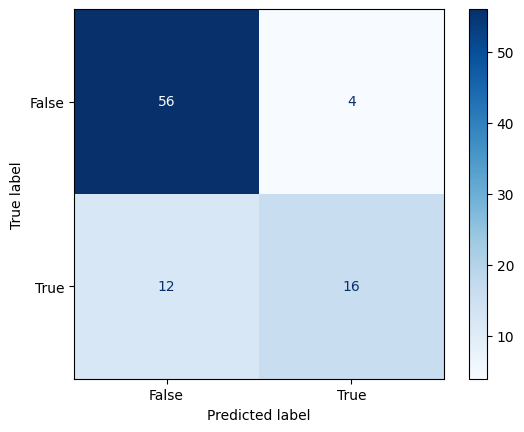

In [49]:
# with bert-v2
fivefolds_bert_v2_15k = pd.read_csv('bert-v2-15k.csv')
fivefolds_bert_v2_15k['result'] = np.where(fivefolds_bert_v2_15k['hyps'] >= 0.5,1,0)
fivefolds_bert_v2_15k_wrong = fivefolds_bert_v2_15k.iloc[np.where(fivefolds_bert_v2_15k['ifcorrect'] == False)]
print(fivefolds_bert_v2_15k_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
fivefolds_bert_v2_15k_result = fivefolds_bert_v2_15k['result'].tolist()
fivefolds_bert_v2_15k_hyps = fivefolds_bert_v2_15k['hyps'].tolist()
fivefolds_bert_v2_15k_truth = [int(i) for i in fivefolds_bert_v2_15k['truth'].tolist()]
print(classification_report(fivefolds_bert_v2_15k_truth, fivefolds_bert_v2_15k_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(fivefolds_bert_v2_15k_truth, fivefolds_bert_v2_15k_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))
fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_truth), np.array(fivefolds_bert_v2_15k_hyps), pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))
y_test = [bool(int(x)) for x in fivefolds_bert_v2_15k_truth]
y_pred = [bool(int(x)) for x in fivefolds_bert_v2_15k_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

### v3

    name      hyps  truth  ifcorrect  result
0     15  0.589450    0.0      False       1
2     19  0.691231    0.0      False       1
3     22  0.571624    0.0      False       1
5     33  0.588129    0.0      False       1
7     35  0.112895    1.0      False       0
10    51  0.754899    0.0      False       1
16    85  0.625068    0.0      False       1
19    11  0.183105    1.0      False       0
22    37  0.477892    1.0      False       0
23    39  0.284929    1.0      False       0
24    45  0.110072    1.0      False       0
26    65  0.455029    1.0      False       0
37    18  0.139608    1.0      False       0
41    32  0.139049    1.0      False       0
42    38  0.246041    1.0      False       0
46    57  0.030675    1.0      False       0
47    58  0.364081    1.0      False       0
52    93  0.809510    0.0      False       1
55    12  0.436454    1.0      False       0
56    17  0.412105    1.0      False       0
62    63  0.065474    1.0      False       0
71    10  

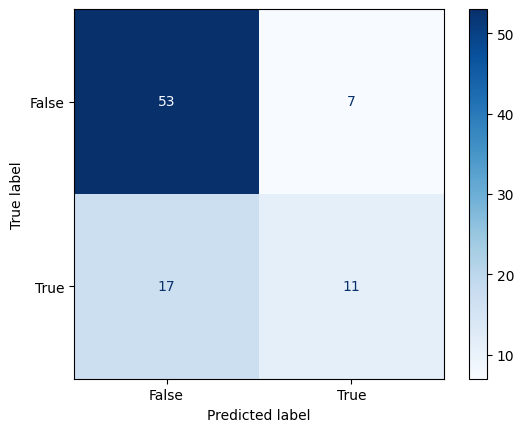

In [50]:
# with bert-v3-mean6
fivefolds_bert_v3_15k_mean6 = pd.read_csv('bert-v3-15k-mean6.csv')
fivefolds_bert_v3_15k_mean6['result'] = np.where(fivefolds_bert_v3_15k_mean6['hyps'] >= 0.5,1,0)
fivefolds_bert_v3_15k_mean6_wrong = fivefolds_bert_v3_15k_mean6.iloc[np.where(fivefolds_bert_v3_15k_mean6['ifcorrect'] == False)]
print(fivefolds_bert_v3_15k_mean6_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
fivefolds_bert_v3_15k_mean6_result = fivefolds_bert_v3_15k_mean6['result'].tolist()
fivefolds_bert_v3_15k_mean6_hyps = fivefolds_bert_v3_15k_mean6['hyps'].tolist()
fivefolds_bert_v3_15k_mean6_truth = [int(i) for i in fivefolds_bert_v3_15k_mean6['truth'].tolist()]
print(classification_report(fivefolds_bert_v3_15k_mean6_truth, fivefolds_bert_v3_15k_mean6_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(fivefolds_bert_v3_15k_mean6_truth, fivefolds_bert_v3_15k_mean6_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))
fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_bert_v3_15k_mean6_truth), np.array(fivefolds_bert_v3_15k_mean6_hyps), pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))
y_test = [bool(int(x)) for x in fivefolds_bert_v3_15k_mean6_truth]
y_pred = [bool(int(x)) for x in fivefolds_bert_v3_15k_mean6_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

    name      hyps  truth  ifcorrect  result
0     15  0.913445    0.0      False       1
2     19  0.676430    0.0      False       1
5     33  0.854798    0.0      False       1
7     35  0.116426    1.0      False       0
10    51  0.862900    0.0      False       1
16    85  0.821065    0.0      False       1
19    11  0.041342    1.0      False       0
23    39  0.289938    1.0      False       0
24    45  0.098080    1.0      False       0
26    65  0.497705    1.0      False       0
37    18  0.180333    1.0      False       0
41    32  0.115601    1.0      False       0
42    38  0.169783    1.0      False       0
46    57  0.032024    1.0      False       0
47    58  0.254616    1.0      False       0
55    12  0.422036    1.0      False       0
56    17  0.464368    1.0      False       0
62    63  0.185298    1.0      False       0
71    10  0.109740    1.0      False       0
74    24  0.291129    1.0      False       0
79     5  0.140825    1.0      False       0
          

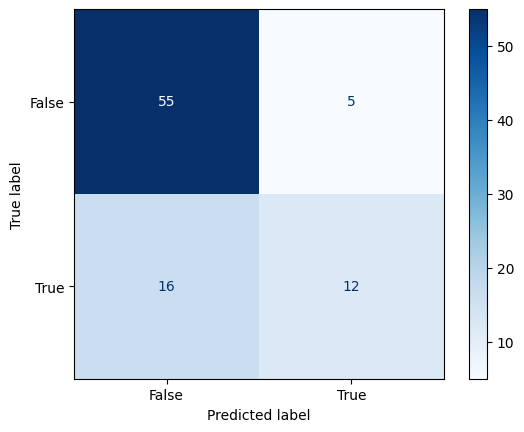

In [51]:
# with bert-v3-mean4
fivefolds_bert_v3_15k_mean4 = pd.read_csv('bert-v3-15k-mean4.csv')
fivefolds_bert_v3_15k_mean4['result'] = np.where(fivefolds_bert_v3_15k_mean4['hyps'] >= 0.5,1,0)
fivefolds_bert_v3_15k_mean4_wrong = fivefolds_bert_v3_15k_mean4.iloc[np.where(fivefolds_bert_v3_15k_mean4['ifcorrect'] == False)]
print(fivefolds_bert_v3_15k_mean4_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
fivefolds_bert_v3_15k_mean4_result = fivefolds_bert_v3_15k_mean4['result'].tolist()
fivefolds_bert_v3_15k_mean4_hyps = fivefolds_bert_v3_15k_mean4['hyps'].tolist()
fivefolds_bert_v3_15k_mean4_truth = [int(i) for i in fivefolds_bert_v3_15k_mean4['truth'].tolist()]
print(classification_report(fivefolds_bert_v3_15k_mean4_truth, fivefolds_bert_v3_15k_mean4_result, target_names=target_names))

tn, fp, fn, tp = confusion_matrix(fivefolds_bert_v3_15k_mean4_truth, fivefolds_bert_v3_15k_mean4_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_bert_v3_15k_mean4_truth), np.array(fivefolds_bert_v3_15k_mean4_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(fivefolds_bert_v3_15k_mean4_truth[0:19]), np.array(fivefolds_bert_v3_15k_mean4_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(fivefolds_bert_v3_15k_mean4_truth[19:37]), np.array(fivefolds_bert_v3_15k_mean4_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(fivefolds_bert_v3_15k_mean4_truth[37:54]), np.array(fivefolds_bert_v3_15k_mean4_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(fivefolds_bert_v3_15k_mean4_truth[54:71]), np.array(fivefolds_bert_v3_15k_mean4_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(fivefolds_bert_v3_15k_mean4_truth[71:88]), np.array(fivefolds_bert_v3_15k_mean4_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in fivefolds_bert_v3_15k_mean4_truth]
y_pred = [bool(int(x)) for x in fivefolds_bert_v3_15k_mean4_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

    name      hyps  truth  ifcorrect  result
0     15  0.974592    0.0      False       1
2     19  0.531534    0.0      False       1
3     22  0.713972    0.0      False       1
5     33  0.914992    0.0      False       1
7     35  0.173616    1.0      False       0
8     40  0.186704    1.0      False       0
10    51  0.917398    0.0      False       1
16    85  0.927687    0.0      False       1
19    11  0.200776    1.0      False       0
20    25  0.403814    1.0      False       0
24    45  0.140918    1.0      False       0
37    18  0.335121    1.0      False       0
41    32  0.125843    1.0      False       0
42    38  0.219943    1.0      False       0
46    57  0.066601    1.0      False       0
47    58  0.124340    1.0      False       0
62    63  0.268226    1.0      False       0
66    88  0.603726    0.0      False       1
69    96  0.604009    0.0      False       1
71    10  0.095095    1.0      False       0
74    24  0.371395    1.0      False       0
79     5  

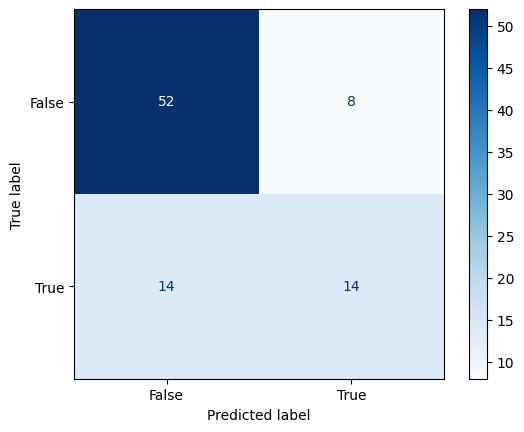

In [52]:
# with bert-v3
fivefolds_bert_v3_15k = pd.read_csv('bert-v3-15k.csv')
fivefolds_bert_v3_15k['result'] = np.where(fivefolds_bert_v3_15k['hyps'] >= 0.5,1,0)
fivefolds_bert_v3_15k_wrong = fivefolds_bert_v3_15k.iloc[np.where(fivefolds_bert_v3_15k['ifcorrect'] == False)]
print(fivefolds_bert_v3_15k_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
fivefolds_bert_v3_15k_result = fivefolds_bert_v3_15k['result'].tolist()
fivefolds_bert_v3_15k_hyps = fivefolds_bert_v3_15k['hyps'].tolist()
fivefolds_bert_v3_15k_truth = [int(i) for i in fivefolds_bert_v3_15k['truth'].tolist()]
print(classification_report(fivefolds_bert_v3_15k_truth, fivefolds_bert_v3_15k_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(fivefolds_bert_v3_15k_truth, fivefolds_bert_v3_15k_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))
fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_bert_v3_15k_truth), np.array(fivefolds_bert_v3_15k_hyps), pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))
y_test = [bool(int(x)) for x in fivefolds_bert_v3_15k_truth]
y_pred = [bool(int(x)) for x in fivefolds_bert_v3_15k_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

## ori

In [53]:
# inval = ['17CTT', '45CTT', '31CTT', '11CTT']
# for i in inval:
#     print(fivefolds_8k_1VGG_4LSTM.loc[lambda df: df['name'] == i ])

In [54]:
# inval_idx = [90,84,57,96]
# print(fivefolds_8k_1VGG_4LSTM.iloc[inval_idx])
# print(fivefolds_7k_1VGG_4LSTM.iloc[inval_idx])
# print(fivefolds_11k4lstm.iloc[inval_idx])
# print(fivefolds_10k4lstm.iloc[inval_idx])
# print(fivefolds_9k4lstm.iloc[inval_idx])
# print(fivefolds_8k4lstm.iloc[inval_idx])
# print(fivefolds_7k4lstm.iloc[inval_idx])

In [55]:
# best_acc = 0
# best_auc = 0
# best_acc_file = ''
# best_auc_file = ''
# for i in range(7, 13):
#     if i == 11:
#         continue
#     fivefolds_12knew_4LSTM = pd.read_csv(f'5folds{i}knew_4LSTM.csv')
#     print(f'5folds{i}knew_4LSTM.csv')
#     fivefolds_12knew_4LSTM['result'] = np.where(fivefolds_10knew_4LSTM['hyps'] >= 0.5,1,0)
#     #print(fivefolds_12knew_4LSTM.head(20))
#     fivefolds_16_result = fivefolds_12knew_4LSTM['result'].tolist()
#     fivefolds_16_hyps = fivefolds_12knew_4LSTM['hyps'].tolist()
#     fivefolds_16_truth = [int(i) for i in fivefolds_12knew_4LSTM['truth'].tolist()]
#     print(classification_report(fivefolds_16_truth, fivefolds_16_result, target_names=target_names))
#     tn, fp, fn, tp = confusion_matrix(fivefolds_16_truth, fivefolds_16_result).ravel()
#     print('sensitivity: ',tp / (fn+tp))
#     print('specificity: ',tn / (fp+tn))
#     fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_16_truth), np.array(fivefolds_16_hyps), pos_label=1)
#     auc = metrics.auc(fpr, tpr)
#     print('AUC: ',auc)
#     if auc > best_auc:
#         best_auc = auc
#         best_auc_file = f'5folds{i}knew_4LSTM.csv'
#     acc = metrics.accuracy_score(fivefolds_16_truth, fivefolds_16_result)
#     print('acc: ',acc)
#     if acc > best_acc:
#         best_acc = acc
#         best_acc_file = f'5folds{i}knew_4LSTM.csv'
#     CI(np.array(fivefolds_16_truth).astype(int), np.array(fivefolds_16_hyps))
# print('best_acc', best_acc)
# print('best_acc_file', best_acc_file)
# print('best_auc', best_auc)
# print('best_auc_file', best_auc_file)


## combine

### 1, 2, 3

        hyps  truth  result  ifcorrect
0   0.683669      0       1      False
2   0.887438      0       1      False
5   0.941452      0       1      False
7   0.457389      1       0      False
9   0.511234      0       1      False
10  0.825117      0       1      False
16  0.629431      0       1      False
19  0.238167      1       0      False
24  0.121835      1       0      False
37  0.186424      1       0      False
39  0.386338      1       0      False
41  0.102165      1       0      False
42  0.195309      1       0      False
45  0.652652      0       1      False
46  0.040850      1       0      False
55  0.396245      1       0      False
57  0.616029      0       1      False
62  0.212590      1       0      False
70  0.459578      1       0      False
72  0.508361      0       1      False
74  0.347796      1       0      False
76  0.509551      0       1      False
79  0.168033      1       0      False
80  0.432673      1       0      False
81  0.555306      0      

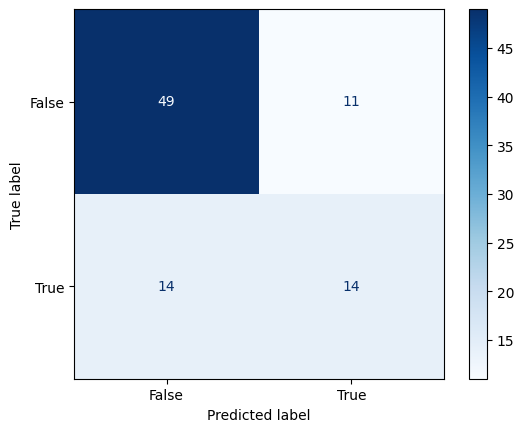

In [56]:
# for 1, 2, 3
whisper_v2_15k = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k_2.csv')
bert_v2_15k = pd.read_csv('bert-v2-15k-mean4.csv')
llama_v2 = pd.read_csv('llama-v2.csv')

w_w = 0.74
b_w = 0.87
l_w = 0.80
weighted = w_w + b_w + l_w
combine = pd.DataFrame()
# combine['hyps'] = whisper_v2_15k['hyps']*w_w/weighted + bert_v2_15k['hyps']*b_w/weighted + llama_v2['hyps']*l_w/weighted
combine['hyps'] = (whisper_v2_15k['hyps'] + bert_v2_15k['hyps'] + llama_v2['hyps']) / 3
combine['truth'] = whisper_v2_15k['truth'].astype(int)
combine['result'] = np.where(combine['hyps'] >= 0.5,1,0)
combine['ifcorrect'] = combine['result'] == combine['truth']
# combine
combine_wrong = combine.iloc[np.where(combine['ifcorrect'] == False)]
print(combine_wrong)
# print(fivefolds_with10separate_10k.head(20))
combine_result = combine['result'].tolist()
combine_hyps = combine['hyps'].tolist()
combine_truth = [int(i) for i in combine['truth'].tolist()]
print(classification_report(combine_truth, combine_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(combine_truth, combine_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth), np.array(fivefolds_bert_v2_15k_mean4_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(combine_truth[0:19]), np.array(combine_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(combine_truth[19:37]), np.array(combine_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(combine_truth[37:54]), np.array(combine_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(combine_truth[54:71]), np.array(combine_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(combine_truth[71:88]), np.array(combine_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in combine_truth]
y_pred = [bool(int(x)) for x in combine_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [57]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

test_1 = combine_hyps[0:19]
test_2 = combine_hyps[19:37]
test_3 = combine_hyps[37:54]
test_4 = combine_hyps[54:71]
test_5 = combine_hyps[71:88]

train_1 = combine_hyps[19:88]
train_2 = combine_hyps[0:19] + combine_hyps[37:88]
train_3 = combine_hyps[0:37] + combine_hyps[54:88]
train_4 = combine_hyps[0:54] + combine_hyps[71:88]
train_5 = combine_hyps[0:19]

idx = [0, 19, 37, 54, 71, 88]

for i in range(5):
    svc = SVC(kernel='linear', probability=True, random_state=0)
    clf = make_pipeline(StandardScaler(), svc)
    # Fit the model to the data

    train = np.array(combine_hyps[0:idx[i]]+combine_hyps[idx[i+1]:88]).reshape(-1, 1)
    t_tra = np.array(combine_result[0:idx[i]]+combine_result[idx[i+1]:88]).reshape(-1, 1)
    valid = np.array(combine_hyps[idx[i]:idx[i+1]]).reshape(-1, 1)
    t_val = np.array(combine_result[idx[i]:idx[i+1]]).reshape(-1, 1)
    # print(train.shape, valid.shape)

    clf.fit(train, t_tra.ravel())
    # print(train, t_tra)
    #         print(reg.coef_)
    y_predicted = clf.predict(train)
    #         loss = mean_squared_error(t_tra, y_predicted)
    y_predicted_val = clf.predict(valid)
    y_predicted_val_pro = clf.predict_proba(valid)
    y_predicted_val_pro = [row[1] for row in y_predicted_val_pro]

    if  i == 0:
        new_pre = y_predicted_val
        new_pre_hys = y_predicted_val_pro
    else:
        new_pre = np.concatenate((new_pre, y_predicted_val))
        new_pre_hys = np.concatenate((new_pre_hys, y_predicted_val_pro))
    
# new_pre = new_pre.reshape(-1, 1)
# print(new_pre.shape, new_pre_hys.shape)

new_df = pd.DataFrame(new_pre, columns=['new_pre'])
new_h_df = pd.DataFrame(new_pre_hys, columns=['new_hyps'])
combine = pd.concat([combine, new_df, new_h_df], axis=1)
combine.to_csv(f'combine-v2.csv', index=False) 
print(combine)

        hyps  truth  result  ifcorrect  new_pre  new_hyps
0   0.683669      0       1      False        1  0.968659
1   0.942912      1       1       True        1  0.999999
2   0.887438      0       1      False        1  0.999996
3   0.191090      0       0       True        0  0.008357
4   0.872446      1       1       True        1  0.999994
..       ...    ...     ...        ...      ...       ...
83  0.024288      0       0       True        0  0.001284
84  0.064308      0       0       True        0  0.002233
85  0.288287      0       0       True        0  0.048805
86  0.113679      0       0       True        0  0.004417
87  0.076672      0       0       True        0  0.002649

[88 rows x 6 columns]


        hyps  truth  result  ifcorrect  new_pre  new_hyps
0   0.683669      0       1      False        1  0.968659
2   0.887438      0       1      False        1  0.999996
5   0.941452      0       1      False        1  0.999999
7   0.457389      1       0      False        0  0.415335
9   0.511234      0       1      False        1  0.638187
10  0.825117      0       1      False        1  0.996949
16  0.629431      0       1      False        1  0.926049
19  0.238167      1       0      False        0  0.020624
24  0.121835      1       0      False        0  0.004086
37  0.186424      1       0      False        0  0.014112
39  0.386338      1       0      False        0  0.189165
41  0.102165      1       0      False        0  0.004332
42  0.195309      1       0      False        0  0.015981
45  0.652652      0       1      False        1  0.907378
46  0.040850      1       0      False        0  0.001833
55  0.396245      1       0      False        0  0.263308
57  0.616029  

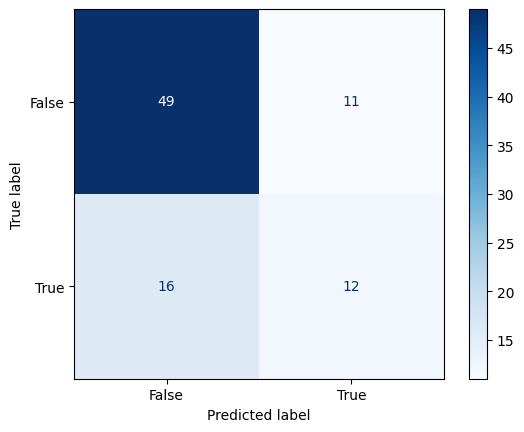

In [58]:
# combine_v2
combine_v2 = pd.read_csv('combine-v2.csv')
combine_v2['result'] = combine_v2['new_pre']
fivefolds_bert_v3_15k_wrong = combine_v2.iloc[np.where(combine_v2['ifcorrect'] == False)]
print(fivefolds_bert_v3_15k_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
combine_v2_result = combine_v2['result'].tolist()
combine_v2_hyps = combine_v2['new_hyps'].tolist()
combine_v2_truth = [int(i) for i in combine_v2['truth'].tolist()]
print(classification_report(combine_v2_truth, combine_v2_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(combine_v2_truth, combine_v2_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

fpr, tpr, thresholds = metrics.roc_curve(np.array(combine_v2_truth), np.array(combine_v2_hyps), pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))
fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(combine_v2_truth[0:19]), np.array(combine_v2_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(combine_v2_truth[19:37]), np.array(combine_v2_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(combine_v2_truth[37:54]), np.array(combine_v2_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(combine_v2_truth[54:71]), np.array(combine_v2_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(combine_v2_truth[71:88]), np.array(combine_v2_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in combine_v2_truth]
y_pred = [bool(int(x)) for x in combine_v2_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

### 1, 2

        hyps  truth  result  ifcorrect
0   0.525503      0       1      False
2   0.831158      0       1      False
5   0.912177      0       1      False
7   0.186084      1       0      False
10  0.737676      0       1      False
19  0.357250      1       0      False
22  0.319221      1       0      False
23  0.288755      1       0      False
24  0.182753      1       0      False
27  0.340157      1       0      False
37  0.279635      1       0      False
41  0.153247      1       0      False
42  0.292964      1       0      False
46  0.061274      1       0      False
62  0.318884      1       0      False
71  0.268333      1       0      False
79  0.252049      1       0      False
              precision    recall  f1-score   support

 non-patient       0.81      0.93      0.87        60
     patient       0.79      0.54      0.64        28

    accuracy                           0.81        88
   macro avg       0.80      0.73      0.75        88
weighted avg       0.80   

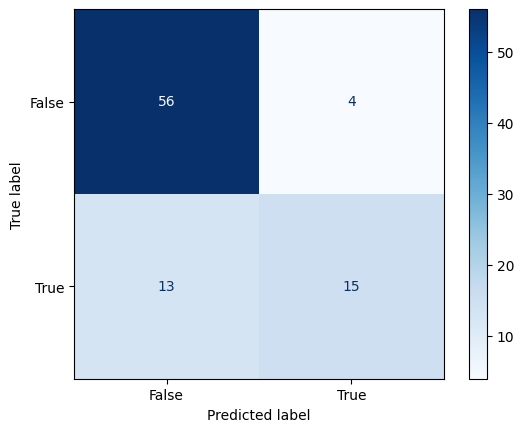

In [59]:
# for 1, 2
whisper_v2_15k = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k_2.csv')
bert_v2_15k = pd.read_csv('bert-v2-15k-mean4.csv')
llama_v2 = pd.read_csv('llama-v2.csv')

w_w = 0.74
b_w = 0.87
l_w = 0.80
weighted = w_w + b_w 
combine = pd.DataFrame()
# combine['hyps'] = whisper_v2_15k['hyps']*w_w/weighted + bert_v2_15k['hyps']*b_w/weighted
combine['hyps'] = (whisper_v2_15k['hyps'] + bert_v2_15k['hyps']) / 2
combine['truth'] = whisper_v2_15k['truth'].astype(int)
combine['result'] = np.where(combine['hyps'] >= 0.5,1,0)
combine['ifcorrect'] = combine['result'] == combine['truth']
# combine
combine_wrong = combine.iloc[np.where(combine['ifcorrect'] == False)]
print(combine_wrong)
# print(fivefolds_with10separate_10k.head(20))
combine_result = combine['result'].tolist()
combine_hyps = combine['hyps'].tolist()
combine_truth = [int(i) for i in combine['truth'].tolist()]
print(classification_report(combine_truth, combine_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(combine_truth, combine_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth), np.array(fivefolds_bert_v2_15k_mean4_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(combine_truth[0:19]), np.array(combine_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(combine_truth[19:37]), np.array(combine_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(combine_truth[37:54]), np.array(combine_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(combine_truth[54:71]), np.array(combine_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(combine_truth[71:88]), np.array(combine_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in combine_truth]
y_pred = [bool(int(x)) for x in combine_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [60]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

test_1 = combine_hyps[0:19]
test_2 = combine_hyps[19:37]
test_3 = combine_hyps[37:54]
test_4 = combine_hyps[54:71]
test_5 = combine_hyps[71:88]

train_1 = combine_hyps[19:88]
train_2 = combine_hyps[0:19] + combine_hyps[37:88]
train_3 = combine_hyps[0:37] + combine_hyps[54:88]
train_4 = combine_hyps[0:54] + combine_hyps[71:88]
train_5 = combine_hyps[0:19]

idx = [0, 19, 37, 54, 71, 88]

for i in range(5):
    svc = SVC(kernel='linear', probability=True, random_state=0)
    clf = make_pipeline(StandardScaler(), svc)
    # Fit the model to the data

    train = np.array(combine_hyps[0:idx[i]]+combine_hyps[idx[i+1]:88]).reshape(-1, 1)
    t_tra = np.array(combine_result[0:idx[i]]+combine_result[idx[i+1]:88]).reshape(-1, 1)
    valid = np.array(combine_hyps[idx[i]:idx[i+1]]).reshape(-1, 1)
    t_val = np.array(combine_result[idx[i]:idx[i+1]]).reshape(-1, 1)
    # print(train.shape, valid.shape)

    clf.fit(train, t_tra.ravel())
    # print(train, t_tra)
    #         print(reg.coef_)
    y_predicted = clf.predict(train)
    #         loss = mean_squared_error(t_tra, y_predicted)
    y_predicted_val = clf.predict(valid)
    y_predicted_val_pro = clf.predict_proba(valid)
    y_predicted_val_pro = [row[1] for row in y_predicted_val_pro]

    if  i == 0:
        new_pre = y_predicted_val
        new_pre_hys = y_predicted_val_pro
    else:
        new_pre = np.concatenate((new_pre, y_predicted_val))
        new_pre_hys = np.concatenate((new_pre_hys, y_predicted_val_pro))
    
# new_pre = new_pre.reshape(-1, 1)
# print(new_pre.shape, new_pre_hys.shape)

new_df = pd.DataFrame(new_pre, columns=['new_pre'])
new_h_df = pd.DataFrame(new_pre_hys, columns=['new_hyps'])
combine = pd.concat([combine, new_df, new_h_df], axis=1)
combine.to_csv(f'combine-v2.csv', index=False) 
print(combine)

        hyps  truth  result  ifcorrect  new_pre  new_hyps
0   0.525503      0       1      False        1  0.632247
1   0.914368      1       1       True        1  0.999986
2   0.831158      0       1      False        1  0.992933
3   0.286635      0       0       True        0  0.053314
4   0.808670      1       1       True        1  0.990249
..       ...    ...     ...        ...      ...       ...
83  0.036432      0       0       True        0  0.001954
84  0.096462      0       0       True        0  0.004464
85  0.432430      0       0       True        0  0.312314
86  0.170518      0       0       True        0  0.012357
87  0.115008      0       0       True        0  0.005761

[88 rows x 6 columns]


        hyps  truth  result  ifcorrect  new_pre  new_hyps
0   0.525503      0       1      False        1  0.632247
2   0.831158      0       1      False        1  0.992933
5   0.912177      0       1      False        1  0.999985
7   0.186084      1       0      False        0  0.012632
10  0.737676      0       1      False        1  0.973291
19  0.357250      1       0      False        0  0.160622
22  0.319221      1       0      False        0  0.102764
23  0.288755      1       0      False        0  0.070564
24  0.182753      1       0      False        0  0.018128
27  0.340157      1       0      False        0  0.131894
37  0.279635      1       0      False        0  0.049382
41  0.153247      1       0      False        0  0.007620
42  0.292964      1       0      False        0  0.059907
46  0.061274      1       0      False        0  0.001941
62  0.318884      1       0      False        0  0.083248
71  0.268333      1       0      False        0  0.047020
79  0.252049  

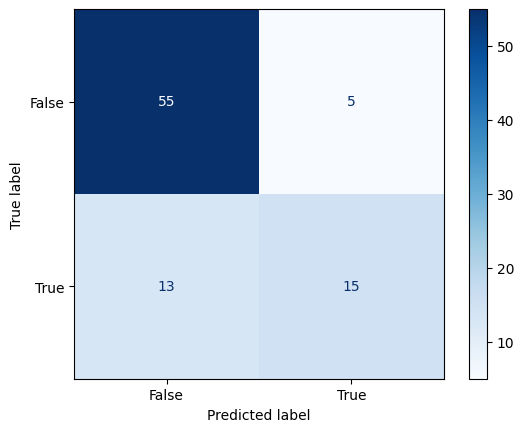

In [61]:
# combine_v2
combine_v2 = pd.read_csv('combine-v2.csv')
combine_v2['result'] = combine_v2['new_pre']
fivefolds_bert_v3_15k_wrong = combine_v2.iloc[np.where(combine_v2['ifcorrect'] == False)]
print(fivefolds_bert_v3_15k_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
combine_v2_result = combine_v2['result'].tolist()
combine_v2_hyps = combine_v2['new_hyps'].tolist()
combine_v2_truth = [int(i) for i in combine_v2['truth'].tolist()]
print(classification_report(combine_v2_truth, combine_v2_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(combine_v2_truth, combine_v2_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

fpr, tpr, thresholds = metrics.roc_curve(np.array(combine_v2_truth), np.array(combine_v2_hyps), pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))
fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(combine_v2_truth[0:19]), np.array(combine_v2_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(combine_v2_truth[19:37]), np.array(combine_v2_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(combine_v2_truth[37:54]), np.array(combine_v2_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(combine_v2_truth[54:71]), np.array(combine_v2_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(combine_v2_truth[71:88]), np.array(combine_v2_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in combine_v2_truth]
y_pred = [bool(int(x)) for x in combine_v2_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

### 2, 3

        hyps  truth  result  ifcorrect
0   0.890050      0       1      False
2   0.951793      0       1      False
5   0.988541      0       1      False
9   0.601431      0       1      False
10  0.935984      0       1      False
16  0.608751      0       1      False
18  0.609575      0       1      False
19  0.163395      1       0      False
24  0.140403      1       0      False
37  0.177046      1       0      False
39  0.350919      1       0      False
41  0.082500      1       0      False
42  0.124275      1       0      False
43  0.518699      0       1      False
45  0.770313      0       1      False
46  0.022801      1       0      False
49  0.532687      0       1      False
54  0.572868      0       1      False
55  0.231333      1       0      False
56  0.355782      1       0      False
57  0.697483      0       1      False
58  0.530241      0       1      False
62  0.110763      1       0      False
64  0.542498      0       1      False
69  0.579714      0      

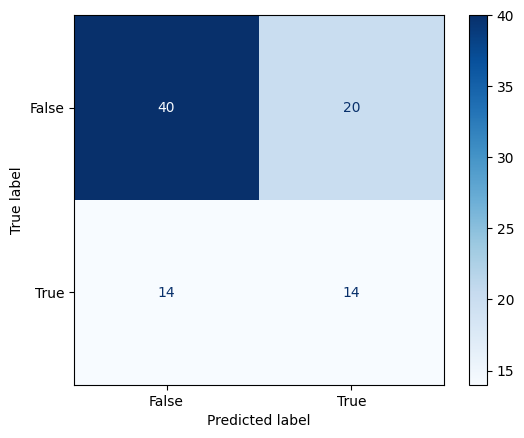

In [62]:
# for 2, 3
whisper_v2_15k = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k_2.csv')
bert_v2_15k = pd.read_csv('bert-v2-15k-mean4.csv')
llama_v2 = pd.read_csv('llama-v2.csv')

w_w = 0.74
b_w = 0.87
l_w = 0.80
weighted = b_w + l_w
combine = pd.DataFrame()
# combine['hyps'] = bert_v2_15k['hyps']*b_w/weighted + llama_v2['hyps']*l_w/weighted
combine['hyps'] = (bert_v2_15k['hyps'] + llama_v2['hyps']) / 2
combine['truth'] = whisper_v2_15k['truth'].astype(int)
combine['result'] = np.where(combine['hyps'] >= 0.5,1,0)
combine['ifcorrect'] = combine['result'] == combine['truth']
# combine
combine_wrong = combine.iloc[np.where(combine['ifcorrect'] == False)]
print(combine_wrong)
# print(fivefolds_with10separate_10k.head(20))
combine_result = combine['result'].tolist()
combine_hyps = combine['hyps'].tolist()
combine_truth = [int(i) for i in combine['truth'].tolist()]
print(classification_report(combine_truth, combine_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(combine_truth, combine_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth), np.array(fivefolds_bert_v2_15k_mean4_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(combine_truth[0:19]), np.array(combine_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(combine_truth[19:37]), np.array(combine_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(combine_truth[37:54]), np.array(combine_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(combine_truth[54:71]), np.array(combine_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(combine_truth[71:88]), np.array(combine_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in combine_truth]
y_pred = [bool(int(x)) for x in combine_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [63]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

test_1 = combine_hyps[0:19]
test_2 = combine_hyps[19:37]
test_3 = combine_hyps[37:54]
test_4 = combine_hyps[54:71]
test_5 = combine_hyps[71:88]

train_1 = combine_hyps[19:88]
train_2 = combine_hyps[0:19] + combine_hyps[37:88]
train_3 = combine_hyps[0:37] + combine_hyps[54:88]
train_4 = combine_hyps[0:54] + combine_hyps[71:88]
train_5 = combine_hyps[0:19]

idx = [0, 19, 37, 54, 71, 88]

for i in range(5):
    svc = SVC(kernel='linear', probability=True, random_state=0)
    clf = make_pipeline(StandardScaler(), svc)
    # Fit the model to the data

    train = np.array(combine_hyps[0:idx[i]]+combine_hyps[idx[i+1]:88]).reshape(-1, 1)
    t_tra = np.array(combine_result[0:idx[i]]+combine_result[idx[i+1]:88]).reshape(-1, 1)
    valid = np.array(combine_hyps[idx[i]:idx[i+1]]).reshape(-1, 1)
    t_val = np.array(combine_result[idx[i]:idx[i+1]]).reshape(-1, 1)
    # print(train.shape, valid.shape)

    clf.fit(train, t_tra.ravel())
    # print(train, t_tra)
    #         print(reg.coef_)
    y_predicted = clf.predict(train)
    #         loss = mean_squared_error(t_tra, y_predicted)
    y_predicted_val = clf.predict(valid)
    y_predicted_val_pro = clf.predict_proba(valid)
    y_predicted_val_pro = [row[1] for row in y_predicted_val_pro]

    if  i == 0:
        new_pre = y_predicted_val
        new_pre_hys = y_predicted_val_pro
    else:
        new_pre = np.concatenate((new_pre, y_predicted_val))
        new_pre_hys = np.concatenate((new_pre_hys, y_predicted_val_pro))
    
# new_pre = new_pre.reshape(-1, 1)
# print(new_pre.shape, new_pre_hys.shape)

new_df = pd.DataFrame(new_pre, columns=['new_pre'])
new_h_df = pd.DataFrame(new_pre_hys, columns=['new_hyps'])
combine = pd.concat([combine, new_df, new_h_df], axis=1)
combine.to_csv(f'combine-v2.csv', index=False) 
print(combine)

        hyps  truth  result  ifcorrect  new_pre  new_hyps
0   0.890050      0       1      False        1  0.997433
1   0.968949      1       1       True        1  0.999997
2   0.951793      0       1      False        1  0.999996
3   0.135553      0       0       True        0  0.031613
4   0.946518      1       1       True        1  0.999995
..       ...    ...     ...        ...      ...       ...
83  0.012754      0       0       True        0  0.008966
84  0.052051      0       0       True        0  0.013986
85  0.248223      0       0       True        0  0.114386
86  0.020384      0       0       True        0  0.009775
87  0.015718      0       0       True        0  0.009272

[88 rows x 6 columns]


        hyps  truth  result  ifcorrect  new_pre  new_hyps
0   0.890050      0       1      False        1  0.997433
2   0.951793      0       1      False        1  0.999996
5   0.988541      0       1      False        1  0.999998
9   0.601431      0       1      False        1  0.914023
10  0.935984      0       1      False        1  0.999994
16  0.608751      0       1      False        1  0.920930
18  0.609575      0       1      False        1  0.921675
19  0.163395      1       0      False        0  0.046265
24  0.140403      1       0      False        0  0.034834
37  0.177046      1       0      False        0  0.052161
39  0.350919      1       0      False        0  0.299764
41  0.082500      1       0      False        0  0.016902
42  0.124275      1       0      False        0  0.027880
43  0.518699      0       1      False        1  0.763311
45  0.770313      0       1      False        1  0.985216
46  0.022801      1       0      False        0  0.008248
49  0.532687  

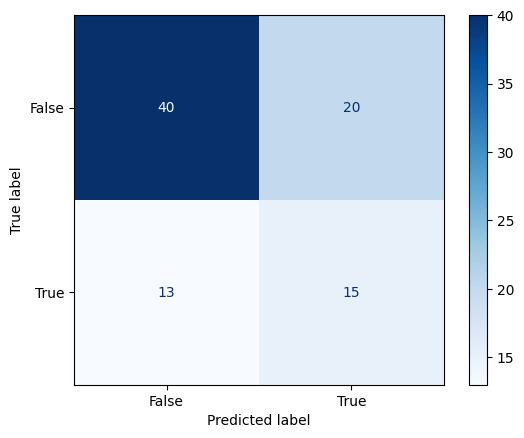

In [64]:
# combine_v2
combine_v2 = pd.read_csv('combine-v2.csv')
combine_v2['result'] = combine_v2['new_pre']
fivefolds_bert_v3_15k_wrong = combine_v2.iloc[np.where(combine_v2['ifcorrect'] == False)]
print(fivefolds_bert_v3_15k_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
combine_v2_result = combine_v2['result'].tolist()
combine_v2_hyps = combine_v2['new_hyps'].tolist()
combine_v2_truth = [int(i) for i in combine_v2['truth'].tolist()]
print(classification_report(combine_v2_truth, combine_v2_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(combine_v2_truth, combine_v2_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

fpr, tpr, thresholds = metrics.roc_curve(np.array(combine_v2_truth), np.array(combine_v2_hyps), pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))
fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(combine_v2_truth[0:19]), np.array(combine_v2_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(combine_v2_truth[19:37]), np.array(combine_v2_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(combine_v2_truth[37:54]), np.array(combine_v2_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(combine_v2_truth[54:71]), np.array(combine_v2_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(combine_v2_truth[71:88]), np.array(combine_v2_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in combine_v2_truth]
y_pred = [bool(int(x)) for x in combine_v2_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

### 1,3

        hyps  truth  result  ifcorrect
0   0.635453      0       1      False
2   0.879365      0       1      False
5   0.923637      0       1      False
9   0.665419      0       1      False
10  0.801692      0       1      False
16  0.835395      0       1      False
18  0.635622      0       1      False
19  0.193855      1       0      False
24  0.042350      1       0      False
37  0.102589      1       0      False
39  0.228588      1       0      False
41  0.070747      1       0      False
42  0.168689      1       0      False
43  0.533548      0       1      False
45  0.708665      0       1      False
46  0.038473      1       0      False
49  0.568864      0       1      False
54  0.651488      0       1      False
55  0.363035      1       0      False
56  0.417636      1       0      False
57  0.726560      0       1      False
58  0.566303      0       1      False
62  0.208121      1       0      False
64  0.547843      0       1      False
69  0.563377      0      

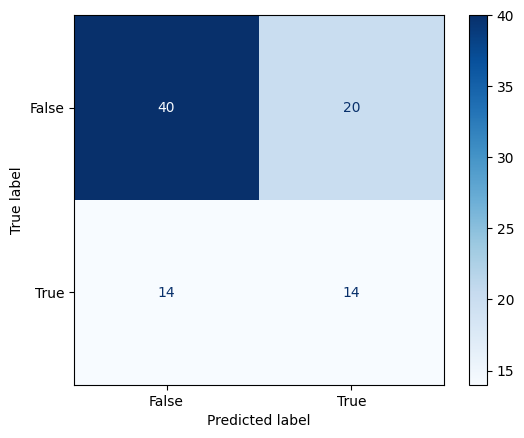

In [65]:
# for 1, 3
whisper_v2_15k = pd.read_csv('whisper-WhisperForAudioClassification-v2-15k_2.csv')
bert_v2_15k = pd.read_csv('bert-v2-15k-mean4.csv')
llama_v2 = pd.read_csv('llama-v2.csv')

w_w = 0.74
b_w = 0.87
l_w = 0.80
weighted = w_w + l_w
combine = pd.DataFrame()
# combine['hyps'] = whisper_v2_15k['hyps']*w_w/weighted + llama_v2['hyps']*l_w/weighted
combine['hyps'] = (whisper_v2_15k['hyps'] + llama_v2['hyps']) / 2
combine['truth'] = whisper_v2_15k['truth'].astype(int)
combine['result'] = np.where(combine['hyps'] >= 0.5,1,0)
combine['ifcorrect'] = combine['result'] == combine['truth']
# combine
combine_wrong = combine.iloc[np.where(combine['ifcorrect'] == False)]
print(combine_wrong)
# print(fivefolds_with10separate_10k.head(20))
combine_result = combine['result'].tolist()
combine_hyps = combine['hyps'].tolist()
combine_truth = [int(i) for i in combine['truth'].tolist()]
print(classification_report(combine_truth, combine_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(combine_truth, combine_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth), np.array(fivefolds_bert_v2_15k_mean4_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(combine_truth[0:19]), np.array(combine_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(combine_truth[19:37]), np.array(combine_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(combine_truth[37:54]), np.array(combine_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(combine_truth[54:71]), np.array(combine_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(combine_truth[71:88]), np.array(combine_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in combine_truth]
y_pred = [bool(int(x)) for x in combine_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [66]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

test_1 = combine_hyps[0:19]
test_2 = combine_hyps[19:37]
test_3 = combine_hyps[37:54]
test_4 = combine_hyps[54:71]
test_5 = combine_hyps[71:88]

train_1 = combine_hyps[19:88]
train_2 = combine_hyps[0:19] + combine_hyps[37:88]
train_3 = combine_hyps[0:37] + combine_hyps[54:88]
train_4 = combine_hyps[0:54] + combine_hyps[71:88]
train_5 = combine_hyps[0:19]

idx = [0, 19, 37, 54, 71, 88]

for i in range(5):
    svc = SVC(kernel='linear', probability=True, random_state=0)
    clf = make_pipeline(StandardScaler(), svc)
    # Fit the model to the data

    train = np.array(combine_hyps[0:idx[i]]+combine_hyps[idx[i+1]:88]).reshape(-1, 1)
    t_tra = np.array(combine_result[0:idx[i]]+combine_result[idx[i+1]:88]).reshape(-1, 1)
    valid = np.array(combine_hyps[idx[i]:idx[i+1]]).reshape(-1, 1)
    t_val = np.array(combine_result[idx[i]:idx[i+1]]).reshape(-1, 1)
    # print(train.shape, valid.shape)

    clf.fit(train, t_tra.ravel())
    # print(train, t_tra)
    #         print(reg.coef_)
    y_predicted = clf.predict(train)
    #         loss = mean_squared_error(t_tra, y_predicted)
    y_predicted_val = clf.predict(valid)
    y_predicted_val_pro = clf.predict_proba(valid)
    y_predicted_val_pro = [row[1] for row in y_predicted_val_pro]

    if  i == 0:
        new_pre = y_predicted_val
        new_pre_hys = y_predicted_val_pro
    else:
        new_pre = np.concatenate((new_pre, y_predicted_val))
        new_pre_hys = np.concatenate((new_pre_hys, y_predicted_val_pro))
    
# new_pre = new_pre.reshape(-1, 1)
# print(new_pre.shape, new_pre_hys.shape)

new_df = pd.DataFrame(new_pre, columns=['new_pre'])
new_h_df = pd.DataFrame(new_pre_hys, columns=['new_hyps'])
combine = pd.concat([combine, new_df, new_h_df], axis=1)
combine.to_csv(f'combine-v2.csv', index=False) 
print(combine)

        hyps  truth  result  ifcorrect  new_pre  new_hyps
0   0.635453      0       1      False        1  0.931875
1   0.945420      1       1       True        1  0.999999
2   0.879365      0       1      False        1  0.999990
3   0.151082      0       0       True        0  0.008794
4   0.862151      1       1       True        1  0.999983
..       ...    ...     ...        ...      ...       ...
83  0.023678      0       0       True        0  0.006465
84  0.044411      0       0       True        0  0.008376
85  0.184206      0       0       True        0  0.047560
86  0.150135      0       0       True        0  0.031251
87  0.099290      0       0       True        0  0.016611

[88 rows x 6 columns]


        hyps  truth  result  ifcorrect  new_pre  new_hyps
0   0.635453      0       1      False        1  0.931875
2   0.879365      0       1      False        1  0.999990
5   0.923637      0       1      False        1  0.999997
9   0.665419      0       1      False        1  0.955632
10  0.801692      0       1      False        1  0.994153
16  0.835395      0       1      False        1  0.996485
18  0.635622      0       1      False        1  0.932037
19  0.193855      1       0      False        0  0.028649
24  0.042350      1       0      False        0  0.003353
37  0.102589      1       0      False        0  0.001522
39  0.228588      1       0      False        0  0.012166
41  0.070747      1       0      False        0  0.000900
42  0.168689      1       0      False        0  0.004531
43  0.533548      0       1      False        1  0.651068
45  0.708665      0       1      False        1  0.971080
46  0.038473      1       0      False        0  0.000529
49  0.568864  

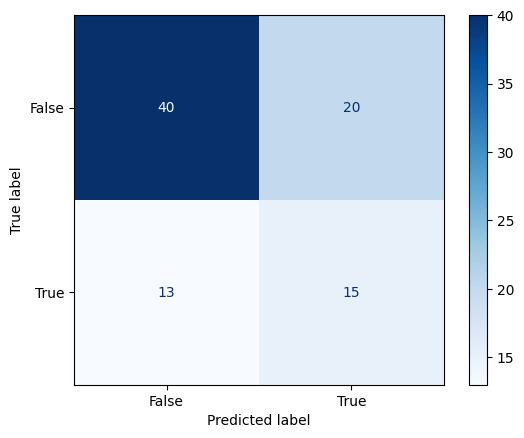

In [67]:
# combine_v2
combine_v2 = pd.read_csv('combine-v2.csv')
combine_v2['result'] = combine_v2['new_pre']
fivefolds_bert_v3_15k_wrong = combine_v2.iloc[np.where(combine_v2['ifcorrect'] == False)]
print(fivefolds_bert_v3_15k_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
combine_v2_result = combine_v2['result'].tolist()
combine_v2_hyps = combine_v2['new_hyps'].tolist()
combine_v2_truth = [int(i) for i in combine_v2['truth'].tolist()]
print(classification_report(combine_v2_truth, combine_v2_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(combine_v2_truth, combine_v2_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

fpr, tpr, thresholds = metrics.roc_curve(np.array(combine_v2_truth), np.array(combine_v2_hyps), pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))
fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(combine_v2_truth[0:19]), np.array(combine_v2_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(combine_v2_truth[19:37]), np.array(combine_v2_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(combine_v2_truth[37:54]), np.array(combine_v2_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(combine_v2_truth[54:71]), np.array(combine_v2_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(combine_v2_truth[71:88]), np.array(combine_v2_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in combine_v2_truth]
y_pred = [bool(int(x)) for x in combine_v2_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [68]:
# whisper_WhisperForAudioClassification_v3 = pd.read_csv('whisper-WhisperForAudioClassification-v3-15k_2.csv')
# whisper_v3_15k_with_id = pd.read_csv('whisper-v3-15k_with_id_2.csv')

# combine = pd.DataFrame()
# combine['hyps'] = (whisper_WhisperForAudioClassification_v3['hyps'] + whisper_v3_15k_with_id['hyps']) / 2
# combine['truth'] = whisper_WhisperForAudioClassification_v3['truth'].astype(int)
# combine['result'] = np.where(combine['hyps'] >= 0.5,1,0)
# combine['ifcorrect'] = combine['result'] == combine['truth']
# # combine
# combine_wrong = combine.iloc[np.where(combine['ifcorrect'] == False)]
# print(combine_wrong)
# # print(fivefolds_with10separate_10k.head(20))
# combine_result = combine['result'].tolist()
# combine_hyps = combine['hyps'].tolist()
# combine_truth = [int(i) for i in combine['truth'].tolist()]
# print(classification_report(combine_truth, combine_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(combine_truth, combine_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(combine_truth), np.array(combine_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

# New

## whisper-v2

### remove

                                name      hyps  truth  ifcorrect  result
2   data_process\CTT5-1-16\19CTT.wav  0.863496    0.0      False       1
5   data_process\CTT5-1-16\33CTT.wav  0.552638    0.0      False       1
7   data_process\CTT5-1-16\35CTT.wav  0.318732    1.0      False       0
10  data_process\CTT5-1-16\51CTT.wav  0.770602    0.0      False       1
16  data_process\CTT5-1-16\85CTT.wav  0.784683    0.0      False       1
22  data_process\CTT5-2-16\37CTT.wav  0.477203    1.0      False       0
27  data_process\CTT5-2-16\67CTT.wav  0.255880    1.0      False       0
28  data_process\CTT5-2-16\68CTT.wav  0.874175    0.0      False       1
41  data_process\CTT5-3-16\32CTT.wav  0.275862    1.0      False       0
46  data_process\CTT5-3-16\57CTT.wav  0.071735    1.0      False       0
57  data_process\CTT5-4-16\21CTT.wav  0.675660    0.0      False       1
71  data_process\CTT5-5-16\10CTT.wav  0.397756    1.0      False       0
76  data_process\CTT5-5-16\44CTT.wav  0.685755    0

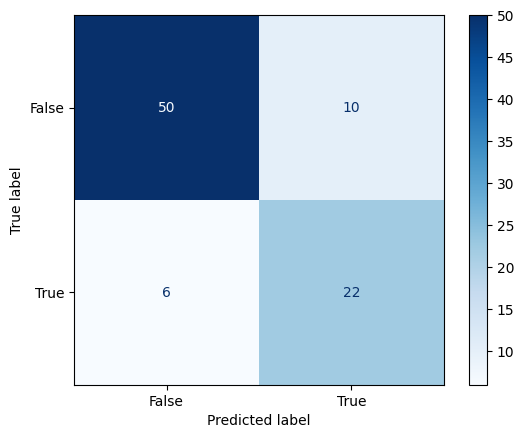

In [69]:
# with whisper-remove-augmentaion
whisper_v2_r_a = pd.read_csv('whisper-v2-15k-r-a.csv')
whisper_v2_r_a['result'] = np.where(whisper_v2_r_a['hyps'] >= 0.5,1,0)
whisper_v2_r_a_wrong = whisper_v2_r_a.iloc[np.where(whisper_v2_r_a['ifcorrect'] == False)]
print(whisper_v2_r_a_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
whisper_v2_r_a_result = whisper_v2_r_a['result'].tolist()
whisper_v2_r_a_hyps = whisper_v2_r_a['hyps'].tolist()
whisper_v2_r_a_truth = [int(i) for i in whisper_v2_r_a['truth'].tolist()]
print(classification_report(whisper_v2_r_a_truth, whisper_v2_r_a_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(whisper_v2_r_a_truth, whisper_v2_r_a_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(whisper_v2_r_a_truth[0:19]), np.array(whisper_v2_r_a_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(whisper_v2_r_a_truth[19:37]), np.array(whisper_v2_r_a_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(whisper_v2_r_a_truth[37:54]), np.array(whisper_v2_r_a_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(whisper_v2_r_a_truth[54:71]), np.array(whisper_v2_r_a_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(whisper_v2_r_a_truth[71:88]), np.array(whisper_v2_r_a_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in whisper_v2_r_a_truth]
y_pred = [bool(int(x)) for x in whisper_v2_r_a_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [70]:
# with bert-v2-augmentation-overlap
whisper_v2_r_s_a = pd.read_csv('whisper-v2-15k-r-s-a.csv')
# result = np.where(whisper_v2_r_s_a['hyps'] >= 0.5,1,0)
hyps = whisper_v2_r_s_a['hyps'].values.tolist()
name = whisper_v2_r_s_a['name'].values.tolist()
truth = whisper_v2_r_s_a['truth'].values.tolist()
allhyps = np.zeros(88)
allresult = np.zeros(88)
allname = np.empty(88, dtype=object)
alltruth = np.zeros(88)
ifcorrect = np.zeros(88)
# major = np.zeros([100, 3])
# majorvote = np.zeros([100, 3])

prev = 15
cnt = 0
idx = 0
for i in range(len(name)):
    file = int(name[i].split('\\')[-1].split('C')[0])
    # idx = int(name[i].split('\\')[-1].split('_')[1].split('.')[0])
    # print(file, idx, prev, cnt, idx)
    if(int(file) != prev):
        allhyps[idx]  = allhyps[idx]/cnt
        allname[idx] = name[i-1].split("CTT_")[0]+"CTT.wav"
        alltruth[idx] = truth[i-1]
        cnt = 1
        prev = file
        idx += 1
    else:
        cnt += 1
    allhyps[idx] += whisper_v2_r_s_a['hyps'][i]
    # print(allhyps[idx])
allhyps[idx]  = allhyps[idx]/cnt
allname[idx] = name[len(name)-1].split("CTT_")[0]+"CTT.wav"
alltruth[idx] = truth[len(name)-1]

allresult = np.where(allhyps >= 0.5,1,0)
ifcorrect = [allresult[i]==alltruth[i] for i in range(len(allname))]
# print(len(allresult))
# print(len(allhyps))
# print(len(allname))
# print(len(alltruth))
# print(len(ifcorrect))
    

# print(correct, 88, correct/88)
whisper_v2_r_s_a_final = pd.DataFrame({
    'name': allname,
    'hyps': allhyps,
    'truth': alltruth,
    'ifcorrect': ifcorrect,
    'result': allresult})
whisper_v2_r_s_a_final.to_csv(f'whisper-v2-15k-r-s-a-f.csv', index=False) 
# whisper_v2_a_o_finalresult_df = pd.DataFrame(majorvote, columns=['name', 'result', 'truth'])
# whisper_v2_a_o_finalresult_df.to_csv(f'whisper-with10separate_finalresult.csv', index=False) 
# whisper_v2_a_o_finalresult_df = whisper_v2_a_o_finalresult_df.drop(['name'], axis=1)
# whisper_v2_a_o_finalresult_df = whisper_v2_a_o_finalresult_df.drop([22, 25, 26, 35, 40, 47, 48, 58, 59, 60, 61, 65], axis=0)
# whisper_v2_a_o_finalresult_df
whisper_v2_r_s_a_final

,name,hyps,truth,ifcorrect,result
0,data_process\CTT5-1-18\15CTT.wav,0.536694,0.0,False,1
1,data_process\CTT5-1-18\16CTT.wav,0.653676,1.0,True,1
2,data_process\CTT5-1-18\19CTT.wav,0.710197,0.0,False,1
3,data_process\CTT5-1-18\22CTT.wav,0.355561,0.0,True,0
4,data_process\CTT5-1-18\28CTT.wav,0.594890,1.0,True,1
...,...,...,...,...,...
83,data_process\CTT5-5-18\73CTT.wav,0.151184,0.0,True,0
84,data_process\CTT5-5-18\79CTT.wav,0.264724,0.0,True,0
85,data_process\CTT5-5-18\8CTT.wav,0.526046,0.0,False,1
86,data_process\CTT5-5-18\90CTT.wav,0.296533,0.0,True,0


                                name      hyps  truth  ifcorrect  result
0   data_process\CTT5-1-18\15CTT.wav  0.536694    0.0      False       1
2   data_process\CTT5-1-18\19CTT.wav  0.710197    0.0      False       1
5   data_process\CTT5-1-18\33CTT.wav  0.606543    0.0      False       1
7   data_process\CTT5-1-18\35CTT.wav  0.328605    1.0      False       0
8   data_process\CTT5-1-18\40CTT.wav  0.379287    1.0      False       0
10  data_process\CTT5-1-18\51CTT.wav  0.654400    0.0      False       1
14  data_process\CTT5-1-18\83CTT.wav  0.529468    0.0      False       1
16  data_process\CTT5-1-18\85CTT.wav  0.522447    0.0      False       1
19  data_process\CTT5-2-18\11CTT.wav  0.446757    1.0      False       0
22  data_process\CTT5-2-18\37CTT.wav  0.377639    1.0      False       0
23  data_process\CTT5-2-18\39CTT.wav  0.405082    1.0      False       0
24  data_process\CTT5-2-18\45CTT.wav  0.445642    1.0      False       0
25  data_process\CTT5-2-18\46CTT.wav  0.416738    1

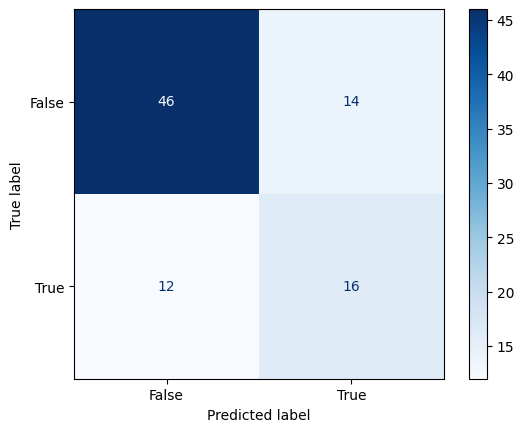

In [71]:
# with whisper-v2-augmentation
whisper_v2_r_s_a_final = pd.read_csv('whisper-v2-15k-r-s-a-f.csv')
whisper_v2_r_s_a_final['result'] = np.where(whisper_v2_r_s_a_final['hyps'] >= 0.5,1,0)
whisper_v2_r_s_a_final_wrong = whisper_v2_r_s_a_final.iloc[np.where(whisper_v2_r_s_a_final['ifcorrect'] == False)]
print(whisper_v2_r_s_a_final_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
whisper_v2_r_s_a_final_result = whisper_v2_r_s_a_final['result'].tolist()
whisper_v2_r_s_a_final_hyps = whisper_v2_r_s_a_final['hyps'].tolist()
whisper_v2_r_s_a_final_truth = [int(i) for i in whisper_v2_r_s_a_final['truth'].tolist()]
print(classification_report(whisper_v2_r_s_a_final_truth, whisper_v2_r_s_a_final_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(whisper_v2_r_s_a_final_truth, whisper_v2_r_s_a_final_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(whisper_v2_r_s_a_final_truth[0:19]), np.array(whisper_v2_r_s_a_final_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(whisper_v2_r_s_a_final_truth[19:37]), np.array(whisper_v2_r_s_a_final_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(whisper_v2_r_s_a_final_truth[37:54]), np.array(whisper_v2_r_s_a_final_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(whisper_v2_r_s_a_final_truth[54:71]), np.array(whisper_v2_r_s_a_final_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(whisper_v2_r_s_a_final_truth[71:88]), np.array(whisper_v2_r_s_a_final_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in whisper_v2_r_s_a_final_truth]
y_pred = [bool(int(x)) for x in whisper_v2_r_s_a_final_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

### w/o diarization

                               name      hyps  truth  ifcorrect  result
2   data_process\CTT5-1-2\19CTT.wav  0.743915    0.0      False       1
5   data_process\CTT5-1-2\33CTT.wav  0.811634    0.0      False       1
7   data_process\CTT5-1-2\35CTT.wav  0.265190    1.0      False       0
8   data_process\CTT5-1-2\40CTT.wav  0.476412    1.0      False       0
10  data_process\CTT5-1-2\51CTT.wav  0.558532    0.0      False       1
16  data_process\CTT5-1-2\85CTT.wav  0.708414    0.0      False       1
19  data_process\CTT5-2-2\11CTT.wav  0.424826    1.0      False       0
20  data_process\CTT5-2-2\25CTT.wav  0.375013    1.0      False       0
22  data_process\CTT5-2-2\37CTT.wav  0.359925    1.0      False       0
23  data_process\CTT5-2-2\39CTT.wav  0.281344    1.0      False       0
24  data_process\CTT5-2-2\45CTT.wav  0.104545    1.0      False       0
25  data_process\CTT5-2-2\46CTT.wav  0.264270    1.0      False       0
27  data_process\CTT5-2-2\67CTT.wav  0.285994    1.0      False 

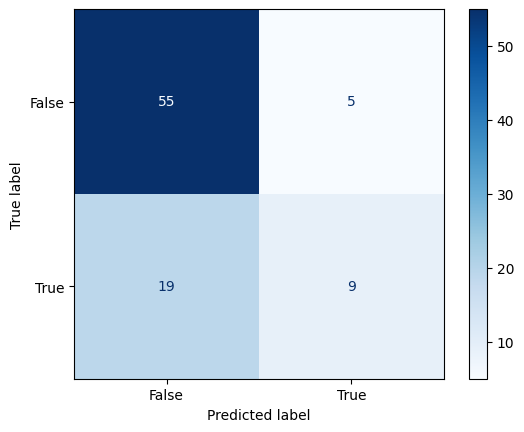

In [72]:
# with whisper-v2
whisper_v2 = pd.read_csv('whisper-v2-15k.csv')
whisper_v2['result'] = np.where(whisper_v2['hyps'] >= 0.5,1,0)
whisper_v2_wrong = whisper_v2.iloc[np.where(whisper_v2['ifcorrect'] == False)]
print(whisper_v2_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
whisper_v2_result = whisper_v2['result'].tolist()
whisper_v2_hyps = whisper_v2['hyps'].tolist()
whisper_v2_truth = [int(i) for i in whisper_v2['truth'].tolist()]
print(classification_report(whisper_v2_truth, whisper_v2_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(whisper_v2_truth, whisper_v2_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(whisper_v2_truth[0:19]), np.array(whisper_v2_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(whisper_v2_truth[19:37]), np.array(whisper_v2_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(whisper_v2_truth[37:54]), np.array(whisper_v2_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(whisper_v2_truth[54:71]), np.array(whisper_v2_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(whisper_v2_truth[71:88]), np.array(whisper_v2_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in whisper_v2_truth]
y_pred = [bool(int(x)) for x in whisper_v2_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

                               name      hyps  truth  ifcorrect  result
2   data_process\CTT5-1-2\19CTT.wav  0.736588    0.0      False       1
5   data_process\CTT5-1-2\33CTT.wav  0.595659    0.0      False       1
7   data_process\CTT5-1-2\35CTT.wav  0.268482    1.0      False       0
10  data_process\CTT5-1-2\51CTT.wav  0.556899    0.0      False       1
16  data_process\CTT5-1-2\85CTT.wav  0.749688    0.0      False       1
24  data_process\CTT5-2-2\45CTT.wav  0.421340    1.0      False       0
27  data_process\CTT5-2-2\67CTT.wav  0.449193    1.0      False       0
28  data_process\CTT5-2-2\68CTT.wav  0.645018    0.0      False       1
29  data_process\CTT5-2-2\71CTT.wav  0.629968    0.0      False       1
41  data_process\CTT5-3-2\32CTT.wav  0.383888    1.0      False       0
46  data_process\CTT5-3-2\57CTT.wav  0.138203    1.0      False       0
47  data_process\CTT5-3-2\58CTT.wav  0.490879    1.0      False       0
57  data_process\CTT5-4-2\21CTT.wav  0.606016    0.0      False 

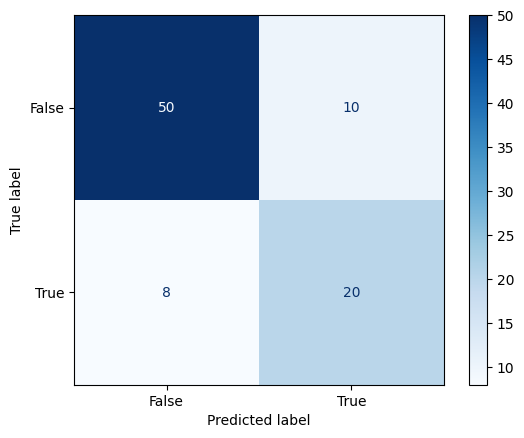

In [73]:
# with whisper-v2-augmentation
whisper_v2_a = pd.read_csv('whisper-v2-15k-a.csv')
whisper_v2_a['result'] = np.where(whisper_v2_a['hyps'] >= 0.5,1,0)
whisper_v2_a_wrong = whisper_v2_a.iloc[np.where(whisper_v2_a['ifcorrect'] == False)]
print(whisper_v2_a_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
whisper_v2_a_result = whisper_v2_a['result'].tolist()
whisper_v2_a_hyps = whisper_v2_a['hyps'].tolist()
whisper_v2_a_truth = [int(i) for i in whisper_v2_a['truth'].tolist()]
print(classification_report(whisper_v2_a_truth, whisper_v2_a_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(whisper_v2_a_truth, whisper_v2_a_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(whisper_v2_a_truth[0:19]), np.array(whisper_v2_a_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(whisper_v2_a_truth[19:37]), np.array(whisper_v2_a_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(whisper_v2_a_truth[37:54]), np.array(whisper_v2_a_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(whisper_v2_a_truth[54:71]), np.array(whisper_v2_a_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(whisper_v2_a_truth[71:88]), np.array(whisper_v2_a_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in whisper_v2_a_truth]
y_pred = [bool(int(x)) for x in whisper_v2_a_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [74]:
# with whisper-v2-augmentation-overlap
whisper_v2_a_o = pd.read_csv('whisper-v2-15k-a-o.csv')
# result = np.where(whisper_v2_a_o['hyps'] >= 0.5,1,0)
hyps = whisper_v2_a_o['hyps'].values.tolist()
name = whisper_v2_a_o['name'].values.tolist()
truth = whisper_v2_a_o['truth'].values.tolist()
allhyps = np.zeros(88)
allresult = np.zeros(88)
allname = np.empty(88, dtype=object)
alltruth = np.zeros(88)
ifcorrect = np.zeros(88)
# major = np.zeros([100, 3])
# majorvote = np.zeros([100, 3])

prev = 15
cnt = 0
idx = 0
for i in range(len(name)):
    file = int(name[i].split('\\')[-1].split('C')[0])
    # idx = int(name[i].split('\\')[-1].split('_')[1].split('.')[0])
    # print(file, idx, prev, cnt, idx)
    if(int(file) != prev):
        allhyps[idx]  = allhyps[idx]/cnt
        allname[idx] = name[i-1].split("CTT_")[0]+"CTT.wav"
        alltruth[idx] = truth[i-1]
        cnt = 1
        prev = file
        idx += 1
    else:
        cnt += 1
    allhyps[idx] += whisper_v2_a_o['hyps'][i]
    # print(allhyps[idx])
allhyps[idx]  = allhyps[idx]/cnt
allname[idx] = name[len(name)-1].split("CTT_")[0]+"CTT.wav"
alltruth[idx] = truth[len(name)-1]

allresult = np.where(allhyps >= 0.5,1,0)
ifcorrect = [allresult[i]==alltruth[i] for i in range(len(allname))]
# print(len(allresult))
# print(len(allhyps))
# print(len(allname))
# print(len(alltruth))
# print(len(ifcorrect))
    

# print(correct, 88, correct/88)
whisper_v2_a_o_final = pd.DataFrame({
    'name': allname,
    'hyps': allhyps,
    'truth': alltruth,
    'ifcorrect': ifcorrect,
    'result': allresult})
whisper_v2_a_o_final.to_csv(f'whisper-v2-15k-a-o-f.csv', index=False) 
# whisper_v2_a_o_finalresult_df = pd.DataFrame(majorvote, columns=['name', 'result', 'truth'])
# whisper_v2_a_o_finalresult_df.to_csv(f'whisper-with10separate_finalresult.csv', index=False) 
# whisper_v2_a_o_finalresult_df = whisper_v2_a_o_finalresult_df.drop(['name'], axis=1)
# whisper_v2_a_o_finalresult_df = whisper_v2_a_o_finalresult_df.drop([22, 25, 26, 35, 40, 47, 48, 58, 59, 60, 61, 65], axis=0)
# whisper_v2_a_o_finalresult_df
whisper_v2_a_o_final

,name,hyps,truth,ifcorrect,result
0,data_process\CTT5-1-10\15CTT.wav,0.505478,0.0,False,1
1,data_process\CTT5-1-10\16CTT.wav,0.818270,1.0,True,1
2,data_process\CTT5-1-10\19CTT.wav,0.587329,0.0,False,1
3,data_process\CTT5-1-10\22CTT.wav,0.330193,0.0,True,0
4,data_process\CTT5-1-10\28CTT.wav,0.749464,1.0,True,1
...,...,...,...,...,...
83,data_process\CTT5-5-10\73CTT.wav,0.118607,0.0,True,0
84,data_process\CTT5-5-10\79CTT.wav,0.224146,0.0,True,0
85,data_process\CTT5-5-10\8CTT.wav,0.352518,0.0,True,0
86,data_process\CTT5-5-10\90CTT.wav,0.394049,0.0,True,0


                                 name      hyps  truth  ifcorrect  result
0    data_process\CTT5-1-10\15CTT.wav  0.505478    0.0      False       1
2    data_process\CTT5-1-10\19CTT.wav  0.587329    0.0      False       1
5    data_process\CTT5-1-10\33CTT.wav  0.690339    0.0      False       1
6    data_process\CTT5-1-10\34CTT.wav  0.519099    0.0      False       1
7    data_process\CTT5-1-10\35CTT.wav  0.381109    1.0      False       0
10   data_process\CTT5-1-10\51CTT.wav  0.689845    0.0      False       1
16   data_process\CTT5-1-10\85CTT.wav  0.660685    0.0      False       1
22   data_process\CTT5-2-10\37CTT.wav  0.473988    1.0      False       0
23   data_process\CTT5-2-10\39CTT.wav  0.304311    1.0      False       0
27   data_process\CTT5-2-10\67CTT.wav  0.403180    1.0      False       0
41   data_process\CTT5-3-10\32CTT.wav  0.446051    1.0      False       0
46   data_process\CTT5-3-10\57CTT.wav  0.289239    1.0      False       0
47   data_process\CTT5-3-10\58CTT.wav 

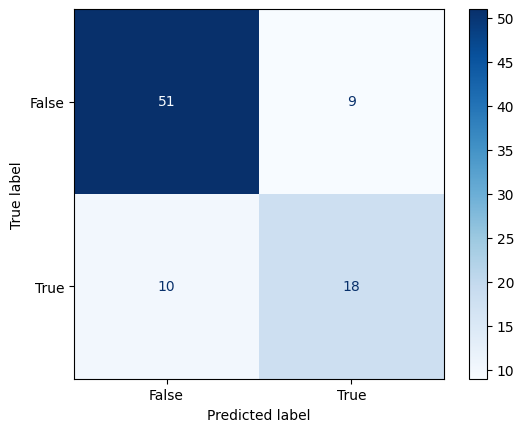

In [75]:
# with whisper-v2-augmentation
whisper_v2_a_o_final = pd.read_csv('whisper-v2-15k-a-o-final.csv')
whisper_v2_a_o_final['result'] = np.where(whisper_v2_a_o_final['hyps'] >= 0.5,1,0)
whisper_v2_a_o_final_wrong = whisper_v2_a_o_final.iloc[np.where(whisper_v2_a_o_final['ifcorrect'] == False)]
print(whisper_v2_a_o_final_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
whisper_v2_a_o_final_result = whisper_v2_a_o_final['result'].tolist()
whisper_v2_a_o_final_hyps = whisper_v2_a_o_final['hyps'].tolist()
whisper_v2_a_o_final_truth = [int(i) for i in whisper_v2_a_o_final['truth'].tolist()]
print(classification_report(whisper_v2_a_o_final_truth, whisper_v2_a_o_final_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(whisper_v2_a_o_final_truth, whisper_v2_a_o_final_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(whisper_v2_a_o_final_truth[0:19]), np.array(whisper_v2_a_o_final_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(whisper_v2_a_o_final_truth[19:37]), np.array(whisper_v2_a_o_final_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(whisper_v2_a_o_final_truth[37:54]), np.array(whisper_v2_a_o_final_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(whisper_v2_a_o_final_truth[54:71]), np.array(whisper_v2_a_o_final_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(whisper_v2_a_o_final_truth[71:88]), np.array(whisper_v2_a_o_final_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in whisper_v2_a_o_final_truth]
y_pred = [bool(int(x)) for x in whisper_v2_a_o_final_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

### w/ diarization

                                name      hyps  truth  ifcorrect  result
4   data_process\CTT5-1-12\28CTT.wav  0.475346    1.0      False       0
5   data_process\CTT5-1-12\33CTT.wav  0.531605    0.0      False       1
7   data_process\CTT5-1-12\35CTT.wav  0.203889    1.0      False       0
10  data_process\CTT5-1-12\51CTT.wav  0.535970    0.0      False       1
16  data_process\CTT5-1-12\85CTT.wav  0.576342    0.0      False       1
20  data_process\CTT5-2-12\25CTT.wav  0.422951    1.0      False       0
22  data_process\CTT5-2-12\37CTT.wav  0.363586    1.0      False       0
24  data_process\CTT5-2-12\45CTT.wav  0.247352    1.0      False       0
26  data_process\CTT5-2-12\65CTT.wav  0.463735    1.0      False       0
27  data_process\CTT5-2-12\67CTT.wav  0.434671    1.0      False       0
28  data_process\CTT5-2-12\68CTT.wav  0.614220    0.0      False       1
37  data_process\CTT5-3-12\18CTT.wav  0.435134    1.0      False       0
41  data_process\CTT5-3-12\32CTT.wav  0.193780    1

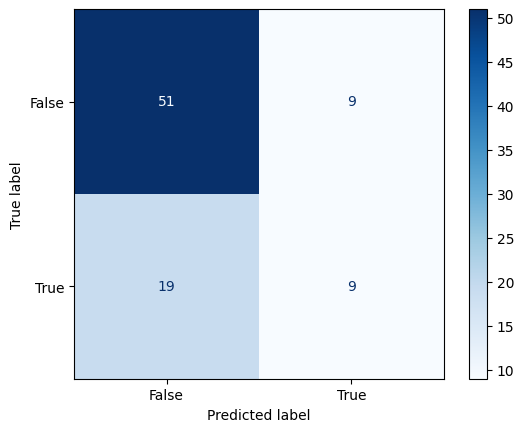

In [76]:
# with whisper-v2-diarization
whisper_v2_d = pd.read_csv('whisper-v2-15k-d.csv')
whisper_v2_d['result'] = np.where(whisper_v2_d['hyps'] >= 0.5,1,0)
whisper_v2_d_wrong = whisper_v2_d.iloc[np.where(whisper_v2_d['ifcorrect'] == False)]
print(whisper_v2_d_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
whisper_v2_d_result = whisper_v2_d['result'].tolist()
whisper_v2_d_hyps = whisper_v2_d['hyps'].tolist()
whisper_v2_d_truth = [int(i) for i in whisper_v2_d['truth'].tolist()]
print(classification_report(whisper_v2_d_truth, whisper_v2_d_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(whisper_v2_d_truth, whisper_v2_d_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(whisper_v2_d_truth[0:19]), np.array(whisper_v2_d_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(whisper_v2_d_truth[19:37]), np.array(whisper_v2_d_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(whisper_v2_d_truth[37:54]), np.array(whisper_v2_d_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(whisper_v2_d_truth[54:71]), np.array(whisper_v2_d_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(whisper_v2_d_truth[71:88]), np.array(whisper_v2_d_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in whisper_v2_d_truth]
y_pred = [bool(int(x)) for x in whisper_v2_d_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

                                name      hyps  truth  ifcorrect  result
2   data_process\CTT5-1-12\19CTT.wav  0.503878    0.0      False       1
5   data_process\CTT5-1-12\33CTT.wav  0.510245    0.0      False       1
7   data_process\CTT5-1-12\35CTT.wav  0.181470    1.0      False       0
10  data_process\CTT5-1-12\51CTT.wav  0.599703    0.0      False       1
16  data_process\CTT5-1-12\85CTT.wav  0.638866    0.0      False       1
27  data_process\CTT5-2-12\67CTT.wav  0.444891    1.0      False       0
28  data_process\CTT5-2-12\68CTT.wav  0.741138    0.0      False       1
29  data_process\CTT5-2-12\71CTT.wav  0.525508    0.0      False       1
41  data_process\CTT5-3-12\32CTT.wav  0.268313    1.0      False       0
45  data_process\CTT5-3-12\52CTT.wav  0.555295    0.0      False       1
46  data_process\CTT5-3-12\57CTT.wav  0.203403    1.0      False       0
47  data_process\CTT5-3-12\58CTT.wav  0.176107    1.0      False       0
57  data_process\CTT5-4-12\21CTT.wav  0.520563    0

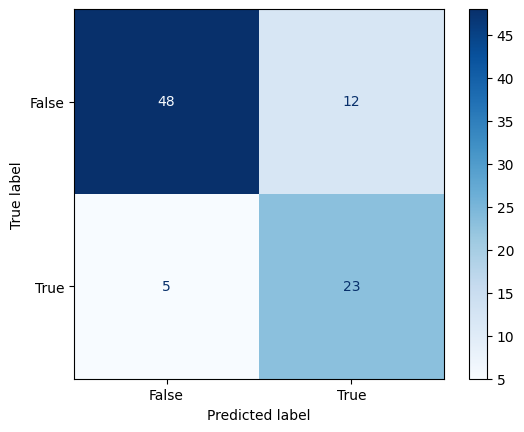

In [77]:
# with whisper-v2-diarization-augmentation
whisper_v2_a_d = pd.read_csv('whisper-v2-15k-a-d.csv')
whisper_v2_a_d['result'] = np.where(whisper_v2_a_d['hyps'] >= 0.5,1,0)
whisper_v2_a_d_wrong = whisper_v2_a_d.iloc[np.where(whisper_v2_a_d['ifcorrect'] == False)]
print(whisper_v2_a_d_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
whisper_v2_a_d_result = whisper_v2_a_d['result'].tolist()
whisper_v2_a_d_hyps = whisper_v2_a_d['hyps'].tolist()
whisper_v2_a_d_truth = [int(i) for i in whisper_v2_a_d['truth'].tolist()]
print(classification_report(whisper_v2_a_d_truth, whisper_v2_a_d_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(whisper_v2_a_d_truth, whisper_v2_a_d_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(whisper_v2_a_d_truth[0:19]), np.array(whisper_v2_a_d_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(whisper_v2_a_d_truth[19:37]), np.array(whisper_v2_a_d_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(whisper_v2_a_d_truth[37:54]), np.array(whisper_v2_a_d_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(whisper_v2_a_d_truth[54:71]), np.array(whisper_v2_a_d_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(whisper_v2_a_d_truth[71:88]), np.array(whisper_v2_a_d_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in whisper_v2_a_d_truth]
y_pred = [bool(int(x)) for x in whisper_v2_a_d_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [78]:
# with bert-v2-augmentation-overlap
whisper_v2_a_o_d = pd.read_csv('whisper-v2-15k-a-o-d.csv')
# result = np.where(whisper_v2_a_o_d['hyps'] >= 0.5,1,0)
hyps = whisper_v2_a_o_d['hyps'].values.tolist()
name = whisper_v2_a_o_d['name'].values.tolist()
truth = whisper_v2_a_o_d['truth'].values.tolist()
allhyps = np.zeros(88)
allresult = np.zeros(88)
allname = np.empty(88, dtype=object)
alltruth = np.zeros(88)
ifcorrect = np.zeros(88)
# major = np.zeros([100, 3])
# majorvote = np.zeros([100, 3])

prev = 15
cnt = 0
idx = 0
for i in range(len(name)):
    file = int(name[i].split('\\')[-1].split('C')[0])
    # idx = int(name[i].split('\\')[-1].split('_')[1].split('.')[0])
    # print(file, idx, prev, cnt, idx)
    if(int(file) != prev):
        allhyps[idx]  = allhyps[idx]/cnt
        allname[idx] = name[i-1].split("CTT_")[0]+"CTT.wav"
        alltruth[idx] = truth[i-1]
        cnt = 1
        prev = file
        idx += 1
    else:
        cnt += 1
    allhyps[idx] += whisper_v2_a_o_d['hyps'][i]
    # print(allhyps[idx])
allhyps[idx]  = allhyps[idx]/cnt
allname[idx] = name[len(name)-1].split("CTT_")[0]+"CTT.wav"
alltruth[idx] = truth[len(name)-1]

allresult = np.where(allhyps >= 0.5,1,0)
ifcorrect = [allresult[i]==alltruth[i] for i in range(len(allname))]
# print(len(allresult))
# print(len(allhyps))
# print(len(allname))
# print(len(alltruth))
# print(len(ifcorrect))
    

# print(correct, 88, correct/88)
whisper_v2_a_o_d_final = pd.DataFrame({
    'name': allname,
    'hyps': allhyps,
    'truth': alltruth,
    'ifcorrect': ifcorrect,
    'result': allresult})
whisper_v2_a_o_d_final.to_csv(f'whisper-v2-15k-a-o-d-f.csv', index=False) 
# whisper_v2_a_o_finalresult_df = pd.DataFrame(majorvote, columns=['name', 'result', 'truth'])
# whisper_v2_a_o_finalresult_df.to_csv(f'whisper-with10separate_finalresult.csv', index=False) 
# whisper_v2_a_o_finalresult_df = whisper_v2_a_o_finalresult_df.drop(['name'], axis=1)
# whisper_v2_a_o_finalresult_df = whisper_v2_a_o_finalresult_df.drop([22, 25, 26, 35, 40, 47, 48, 58, 59, 60, 61, 65], axis=0)
# whisper_v2_a_o_finalresult_df
whisper_v2_a_o_d_final

,name,hyps,truth,ifcorrect,result
0,data_process\CTT5-1-14\15CTT.wav,0.561450,0.0,False,1
1,data_process\CTT5-1-14\16CTT.wav,0.757411,1.0,True,1
2,data_process\CTT5-1-14\19CTT.wav,0.502915,0.0,False,1
3,data_process\CTT5-1-14\22CTT.wav,0.229610,0.0,True,0
4,data_process\CTT5-1-14\28CTT.wav,0.462308,1.0,False,0
...,...,...,...,...,...
83,data_process\CTT5-5-14\73CTT.wav,0.177993,0.0,True,0
84,data_process\CTT5-5-14\79CTT.wav,0.445718,0.0,True,0
85,data_process\CTT5-5-14\8CTT.wav,0.450852,0.0,True,0
86,data_process\CTT5-5-14\90CTT.wav,0.356390,0.0,True,0


                                name      hyps  truth  ifcorrect  result
0   data_process\CTT5-1-14\15CTT.wav  0.561450    0.0      False       1
2   data_process\CTT5-1-14\19CTT.wav  0.502915    0.0      False       1
4   data_process\CTT5-1-14\28CTT.wav  0.462308    1.0      False       0
5   data_process\CTT5-1-14\33CTT.wav  0.596745    0.0      False       1
7   data_process\CTT5-1-14\35CTT.wav  0.374197    1.0      False       0
10  data_process\CTT5-1-14\51CTT.wav  0.565553    0.0      False       1
20  data_process\CTT5-2-14\25CTT.wav  0.447476    1.0      False       0
22  data_process\CTT5-2-14\37CTT.wav  0.491982    1.0      False       0
23  data_process\CTT5-2-14\39CTT.wav  0.462550    1.0      False       0
28  data_process\CTT5-2-14\68CTT.wav  0.539635    0.0      False       1
31  data_process\CTT5-2-14\76CTT.wav  0.576522    0.0      False       1
32  data_process\CTT5-2-14\77CTT.wav  0.656559    0.0      False       1
33  data_process\CTT5-2-14\78CTT.wav  0.527561    0

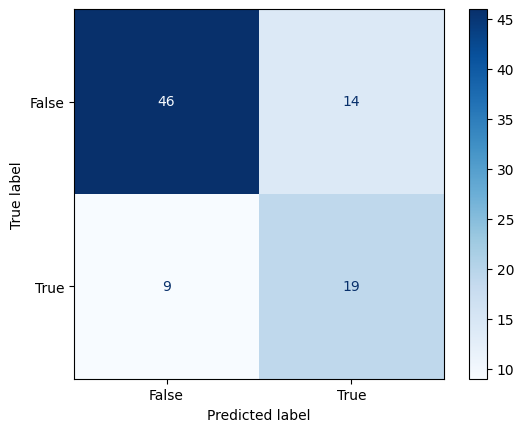

In [79]:
# with whisper-v2-augmentation
whisper_v2_a_o_d_final = pd.read_csv('whisper-v2-15k-a-o-d-f.csv')
whisper_v2_a_o_d_final['result'] = np.where(whisper_v2_a_o_d_final['hyps'] >= 0.5,1,0)
whisper_v2_a_o_d_final_wrong = whisper_v2_a_o_d_final.iloc[np.where(whisper_v2_a_o_d_final['ifcorrect'] == False)]
print(whisper_v2_a_o_d_final_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
whisper_v2_a_o_d_final_result = whisper_v2_a_o_d_final['result'].tolist()
whisper_v2_a_o_d_final_hyps = whisper_v2_a_o_d_final['hyps'].tolist()
whisper_v2_a_o_d_final_truth = [int(i) for i in whisper_v2_a_o_d_final['truth'].tolist()]
print(classification_report(whisper_v2_a_o_d_final_truth, whisper_v2_a_o_d_final_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(whisper_v2_a_o_d_final_truth, whisper_v2_a_o_d_final_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(whisper_v2_a_o_d_final_truth[0:19]), np.array(whisper_v2_a_o_d_final_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(whisper_v2_a_o_d_final_truth[19:37]), np.array(whisper_v2_a_o_d_final_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(whisper_v2_a_o_d_final_truth[37:54]), np.array(whisper_v2_a_o_d_final_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(whisper_v2_a_o_d_final_truth[54:71]), np.array(whisper_v2_a_o_d_final_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(whisper_v2_a_o_d_final_truth[71:88]), np.array(whisper_v2_a_o_d_final_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in whisper_v2_a_o_d_final_truth]
y_pred = [bool(int(x)) for x in whisper_v2_a_o_d_final_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

### segment

In [80]:
whisper_v2_15k_r_s_a = pd.read_csv('whisper-v2-15k-r-s-a.csv')
result = np.where(whisper_v2_15k_r_s_a['hyps'] >= 0.5,1,0)
name = whisper_v2_15k_r_s_a['name'].values.tolist()
truth = whisper_v2_15k_r_s_a['truth'].values.tolist()
allresult = np.full([100, 105], np.nan)
major = np.zeros([100, 3])
majorvote = np.zeros([100, 3])
correct = 0

for i in range(len(name)):
    file = int(name[i].split('\\')[-1].split('C')[0])
    idx = int(name[i].split('\\')[-1].split('_')[1].split('.')[0])
    allresult[file-1][0] = file
    allresult[file-1][idx] = result[i]
    major[file-1][int(result[i])] += 1
    major[file-1][2] = truth[i]

for i in range(len(major)):
    if(i != 23 and i != 26 and i != 27 and i != 36 and i != 41 and i != 48 and i != 49 and i != 59 and i != 60 and i != 61 and i != 62 and i != 66):
        majorvote[i][0] = i+1
        majorvote[i][1] = 0 if (major[i][0] >= major[i][1]) else 1
        majorvote[i][2] = major[i][2]
        if(majorvote[i][1] == majorvote[i][2]): 
            correct += 1

print(correct, 88, correct/88)
whisper_v2_15k_r_s_a_allresult_df = pd.DataFrame(allresult)
whisper_v2_15k_r_s_a_allresult_df.to_csv(f'whisper-with10separate_allresult.csv', index=False) 
whisper_v2_15k_r_s_a_finalresult_df = pd.DataFrame(majorvote, columns=['name', 'result', 'truth'])
whisper_v2_15k_r_s_a_finalresult_df.to_csv(f'whisper-with10separate_finalresult.csv', index=False) 
print(whisper_v2_15k_r_s_a_finalresult_df)
whisper_v2_15k_r_s_a_finalresult_df = whisper_v2_15k_r_s_a_finalresult_df.drop(['name'], axis=1)
whisper_v2_15k_r_s_a_finalresult_df = whisper_v2_15k_r_s_a_finalresult_df.drop([22, 25, 26, 35, 40, 47, 48, 58, 59, 60, 61, 65], axis=0)
print(whisper_v2_15k_r_s_a_finalresult_df)

66 88 0.75
     name  result  truth
0     1.0     0.0    0.0
1     2.0     0.0    0.0
2     3.0     0.0    0.0
3     4.0     0.0    1.0
4     5.0     1.0    1.0
..    ...     ...    ...
95   96.0     0.0    0.0
96   97.0     0.0    0.0
97   98.0     0.0    0.0
98   99.0     0.0    0.0
99  100.0     0.0    0.0

[100 rows x 3 columns]
    result  truth
0      0.0    0.0
1      0.0    0.0
2      0.0    0.0
3      0.0    1.0
4      1.0    1.0
..     ...    ...
95     0.0    0.0
96     0.0    0.0
97     0.0    0.0
98     0.0    0.0
99     0.0    0.0

[88 rows x 2 columns]


    result  truth
3      0.0    1.0
7      1.0    0.0
9      0.0    1.0
10     0.0    1.0
12     1.0    0.0
14     1.0    0.0
15     0.0    1.0
18     1.0    0.0
20     1.0    0.0
31     0.0    1.0
32     1.0    0.0
34     0.0    1.0
38     0.0    1.0
39     0.0    1.0
43     1.0    0.0
44     0.0    1.0
45     0.0    1.0
50     1.0    0.0
56     0.0    1.0
64     0.0    1.0
67     1.0    0.0
84     1.0    0.0
              precision    recall  f1-score   support

 non-patient       0.82      0.85      0.83        65
     patient       0.52      0.48      0.50        23

    accuracy                           0.75        88
   macro avg       0.67      0.66      0.67        88
weighted avg       0.74      0.75      0.75        88

sensitivity:  0.4782608695652174
specificity:  0.8461538461538461


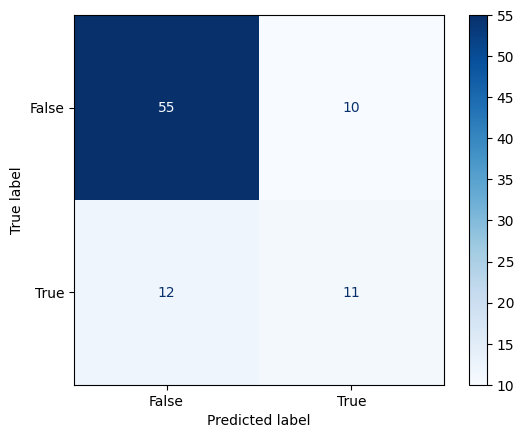

In [81]:
whisper_v2_15k_r_s_a_finalresult_df_result = whisper_v2_15k_r_s_a_finalresult_df['result']
whisper_v2_15k_r_s_a_finalresult_df_truth = whisper_v2_15k_r_s_a_finalresult_df['truth']
whisper_v2_15k_r_s_a_finalresult_df_wrong = whisper_v2_15k_r_s_a_finalresult_df.iloc[np.where(whisper_v2_15k_r_s_a_finalresult_df['result'] != whisper_v2_15k_r_s_a_finalresult_df['truth'])]
print(whisper_v2_15k_r_s_a_finalresult_df_wrong)
clf_report  = classification_report(whisper_v2_15k_r_s_a_finalresult_df_truth, whisper_v2_15k_r_s_a_finalresult_df_result, target_names=target_names)
print(clf_report)
tn, fp, fn, tp = confusion_matrix(whisper_v2_15k_r_s_a_finalresult_df_truth, whisper_v2_15k_r_s_a_finalresult_df_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_with10separate_truth), np.array(fivefolds_with10separate_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

y_test = [bool(int(x)) for x in whisper_v2_15k_r_s_a_finalresult_df_truth]
y_pred = [bool(int(x)) for x in whisper_v2_15k_r_s_a_finalresult_df_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [82]:
whisper_v2_15k_a_o = pd.read_csv('whisper-v2-15k-a-o.csv')
result = np.where(whisper_v2_15k_a_o['hyps'] >= 0.5,1,0)
name = whisper_v2_15k_a_o['name'].values.tolist()
truth = whisper_v2_15k_a_o['truth'].values.tolist()
allresult = np.full([100, 105], np.nan)
major = np.zeros([100, 3])
majorvote = np.zeros([100, 3])
correct = 0

for i in range(len(name)):
    file = int(name[i].split('\\')[-1].split('C')[0])
    idx = int(name[i].split('\\')[-1].split('_')[1].split('.')[0])
    allresult[file-1][0] = file
    allresult[file-1][idx] = result[i]
    major[file-1][int(result[i])] += 1
    major[file-1][2] = truth[i]

for i in range(len(major)):
    if(i != 23 and i != 26 and i != 27 and i != 36 and i != 41 and i != 48 and i != 49 and i != 59 and i != 60 and i != 61 and i != 62 and i != 66):
        majorvote[i][0] = i+1
        majorvote[i][1] = 0 if (major[i][0] >= major[i][1]) else 1
        majorvote[i][2] = major[i][2]
        if(majorvote[i][1] == majorvote[i][2]): 
            correct += 1

print(correct, 88, correct/88)
whisper_v2_15k_a_o_allresult_df = pd.DataFrame(allresult)
whisper_v2_15k_a_o_allresult_df.to_csv(f'whisper-with10separate_allresult.csv', index=False) 
whisper_v2_15k_a_o_finalresult_df = pd.DataFrame(majorvote, columns=['name', 'result', 'truth'])
whisper_v2_15k_a_o_finalresult_df.to_csv(f'whisper-with10separate_finalresult.csv', index=False) 
print(whisper_v2_15k_a_o_finalresult_df)
whisper_v2_15k_a_o_finalresult_df = whisper_v2_15k_a_o_finalresult_df.drop(['name'], axis=1)
whisper_v2_15k_a_o_finalresult_df = whisper_v2_15k_a_o_finalresult_df.drop([22, 25, 26, 35, 40, 47, 48, 58, 59, 60, 61, 65], axis=0)
print(whisper_v2_15k_a_o_finalresult_df)

74 88 0.8409090909090909
     name  result  truth
0     1.0     0.0    0.0
1     2.0     0.0    0.0
2     3.0     0.0    0.0
3     4.0     1.0    1.0
4     5.0     0.0    1.0
..    ...     ...    ...
95   96.0     0.0    0.0
96   97.0     0.0    0.0
97   98.0     0.0    0.0
98   99.0     1.0    0.0
99  100.0     0.0    0.0

[100 rows x 3 columns]
    result  truth
0      0.0    0.0
1      0.0    0.0
2      0.0    0.0
3      1.0    1.0
4      0.0    1.0
..     ...    ...
95     0.0    0.0
96     0.0    0.0
97     0.0    0.0
98     1.0    0.0
99     0.0    0.0

[88 rows x 2 columns]


    result  truth
4      0.0    1.0
8      0.0    1.0
9      0.0    1.0
18     1.0    0.0
31     0.0    1.0
32     1.0    0.0
33     1.0    0.0
34     0.0    1.0
38     0.0    1.0
50     1.0    0.0
56     0.0    1.0
57     0.0    1.0
84     1.0    0.0
98     1.0    0.0
              precision    recall  f1-score   support

 non-patient       0.88      0.91      0.89        65
     patient       0.71      0.65      0.68        23

    accuracy                           0.84        88
   macro avg       0.80      0.78      0.79        88
weighted avg       0.84      0.84      0.84        88

sensitivity:  0.6521739130434783
specificity:  0.9076923076923077


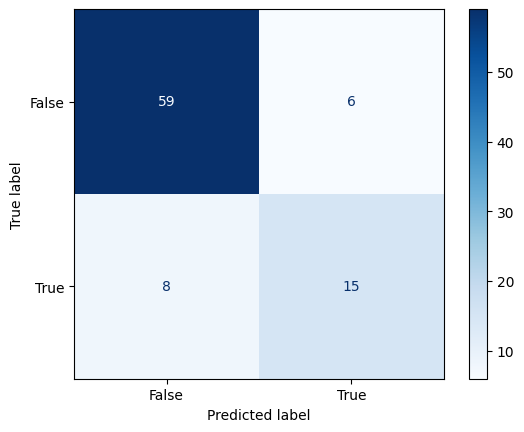

In [83]:
whisper_v2_15k_a_o_finalresult_df_result = whisper_v2_15k_a_o_finalresult_df['result']
whisper_v2_15k_a_o_finalresult_df_truth = whisper_v2_15k_a_o_finalresult_df['truth']
whisper_v2_15k_a_o_finalresult_df_wrong = whisper_v2_15k_a_o_finalresult_df.iloc[np.where(whisper_v2_15k_a_o_finalresult_df['result'] != whisper_v2_15k_a_o_finalresult_df['truth'])]
print(whisper_v2_15k_a_o_finalresult_df_wrong)
clf_report  = classification_report(whisper_v2_15k_a_o_finalresult_df_truth, whisper_v2_15k_a_o_finalresult_df_result, target_names=target_names)
print(clf_report)
tn, fp, fn, tp = confusion_matrix(whisper_v2_15k_a_o_finalresult_df_truth, whisper_v2_15k_a_o_finalresult_df_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_with10separate_truth), np.array(fivefolds_with10separate_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

y_test = [bool(int(x)) for x in whisper_v2_15k_a_o_finalresult_df_truth]
y_pred = [bool(int(x)) for x in whisper_v2_15k_a_o_finalresult_df_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

In [84]:
whisper_v2_15k_a_o_d = pd.read_csv('whisper-v2-15k-a-o-d.csv')
result = np.where(whisper_v2_15k_a_o_d['hyps'] >= 0.5,1,0)
name = whisper_v2_15k_a_o_d['name'].values.tolist()
truth = whisper_v2_15k_a_o_d['truth'].values.tolist()
allresult = np.full([100, 105], np.nan)
major = np.zeros([100, 3])
majorvote = np.zeros([100, 3])
correct = 0

for i in range(len(name)):
    file = int(name[i].split('\\')[-1].split('C')[0])
    idx = int(name[i].split('\\')[-1].split('_')[1].split('.')[0])
    allresult[file-1][0] = file
    allresult[file-1][idx] = result[i]
    major[file-1][int(result[i])] += 1
    major[file-1][2] = truth[i]

for i in range(len(major)):
    if(i != 23 and i != 26 and i != 27 and i != 36 and i != 41 and i != 48 and i != 49 and i != 59 and i != 60 and i != 61 and i != 62 and i != 66):
        majorvote[i][0] = i+1
        majorvote[i][1] = 0 if (major[i][0] >= major[i][1]) else 1
        majorvote[i][2] = major[i][2]
        if(majorvote[i][1] == majorvote[i][2]): 
            correct += 1

print(correct, 88, correct/88)
whisper_v2_15k_a_o_d_allresult_df = pd.DataFrame(allresult)
whisper_v2_15k_a_o_d_allresult_df.to_csv(f'whisper-with10separate_allresult.csv', index=False) 
whisper_v2_15k_a_o_d_finalresult_df = pd.DataFrame(majorvote, columns=['name', 'result', 'truth'])
whisper_v2_15k_a_o_d_finalresult_df.to_csv(f'whisper-with10separate_finalresult.csv', index=False) 
print(whisper_v2_15k_a_o_d_finalresult_df)
whisper_v2_15k_a_o_d_finalresult_df = whisper_v2_15k_a_o_d_finalresult_df.drop(['name'], axis=1)
whisper_v2_15k_a_o_d_finalresult_df = whisper_v2_15k_a_o_d_finalresult_df.drop([22, 25, 26, 35, 40, 47, 48, 58, 59, 60, 61, 65], axis=0)
print(whisper_v2_15k_a_o_d_finalresult_df)

73 88 0.8295454545454546
     name  result  truth
0     1.0     0.0    0.0
1     2.0     0.0    0.0
2     3.0     0.0    0.0
3     4.0     1.0    1.0
4     5.0     1.0    1.0
..    ...     ...    ...
95   96.0     0.0    0.0
96   97.0     0.0    0.0
97   98.0     0.0    0.0
98   99.0     0.0    0.0
99  100.0     0.0    0.0

[100 rows x 3 columns]
    result  truth
0      0.0    0.0
1      0.0    0.0
2      0.0    0.0
3      1.0    1.0
4      1.0    1.0
..     ...    ...
95     0.0    0.0
96     0.0    0.0
97     0.0    0.0
98     0.0    0.0
99     0.0    0.0

[88 rows x 2 columns]


    result  truth
16     0.0    1.0
24     0.0    1.0
30     0.0    1.0
31     0.0    1.0
32     1.0    0.0
34     0.0    1.0
37     0.0    1.0
38     0.0    1.0
46     1.0    0.0
51     1.0    0.0
56     0.0    1.0
57     0.0    1.0
67     1.0    0.0
68     1.0    0.0
87     1.0    0.0
              precision    recall  f1-score   support

 non-patient       0.87      0.91      0.89        65
     patient       0.70      0.61      0.65        23

    accuracy                           0.83        88
   macro avg       0.78      0.76      0.77        88
weighted avg       0.82      0.83      0.83        88

sensitivity:  0.6086956521739131
specificity:  0.9076923076923077


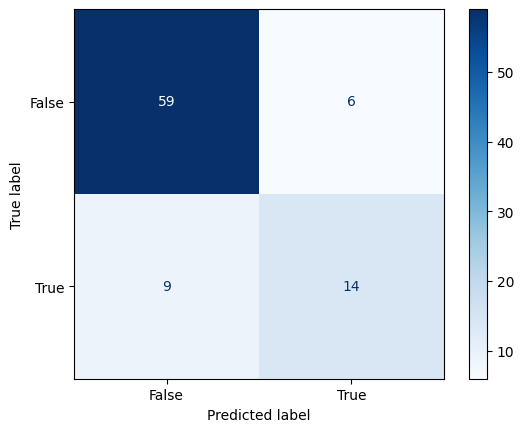

In [85]:
whisper_v2_15k_a_o_d_finalresult_df_result = whisper_v2_15k_a_o_d_finalresult_df['result']
whisper_v2_15k_a_o_d_finalresult_df_truth = whisper_v2_15k_a_o_d_finalresult_df['truth']
whisper_v2_15k_a_o_d_finalresult_df_wrong = whisper_v2_15k_a_o_d_finalresult_df.iloc[np.where(whisper_v2_15k_a_o_d_finalresult_df['result'] != whisper_v2_15k_a_o_d_finalresult_df['truth'])]
print(whisper_v2_15k_a_o_d_finalresult_df_wrong)
clf_report  = classification_report(whisper_v2_15k_a_o_d_finalresult_df_truth, whisper_v2_15k_a_o_d_finalresult_df_result, target_names=target_names)
print(clf_report)
tn, fp, fn, tp = confusion_matrix(whisper_v2_15k_a_o_d_finalresult_df_truth, whisper_v2_15k_a_o_d_finalresult_df_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_with10separate_truth), np.array(fivefolds_with10separate_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

y_test = [bool(int(x)) for x in whisper_v2_15k_a_o_d_finalresult_df_truth]
y_pred = [bool(int(x)) for x in whisper_v2_15k_a_o_d_finalresult_df_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

## bert

### remove

    name      hyps  truth  ifcorrect  result
0     15  0.769617    0.0      False       1
1     16  0.153784    1.0      False       0
2     19  0.523748    0.0      False       1
3     22  0.799040    0.0      False       1
8     40  0.120190    1.0      False       0
9     42  0.799040    0.0      False       1
12    55  0.523748    0.0      False       1
17    97  0.523748    0.0      False       1
18    99  0.731723    0.0      False       1
19    11  0.080822    1.0      False       0
20    25  0.261396    1.0      False       0
22    37  0.202730    1.0      False       0
24    45  0.261397    1.0      False       0
25    46  0.133112    1.0      False       0
26    65  0.143135    1.0      False       0
27    67  0.080822    1.0      False       0
37    18  0.187008    1.0      False       0
39    20  0.187008    1.0      False       0
41    32  0.404158    1.0      False       0
42    38  0.499370    1.0      False       0
43     3  0.714353    0.0      False       1
46    57  

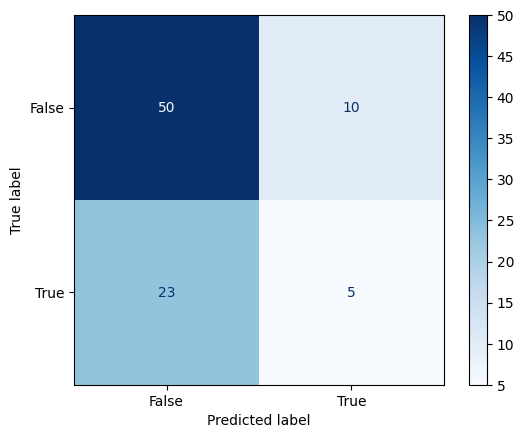

In [86]:
# with bert-v2-overlap-diarization
bert_v2_r_a_at = pd.read_csv('bert-v2-15k-r-a-at.csv')
bert_v2_r_a_at['result'] = np.where(bert_v2_r_a_at['hyps'] >= 0.5,1,0)
bert_v2_r_a_at_wrong = bert_v2_r_a_at.iloc[np.where(bert_v2_r_a_at['ifcorrect'] == False)]
print(bert_v2_r_a_at_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_r_a_at_result = bert_v2_r_a_at['result'].tolist()
bert_v2_r_a_at_hyps = bert_v2_r_a_at['hyps'].tolist()
bert_v2_r_a_at_truth = [int(i) for i in bert_v2_r_a_at['truth'].tolist()]
print(classification_report(bert_v2_r_a_at_truth, bert_v2_r_a_at_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_r_a_at_truth, bert_v2_r_a_at_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(bert_v2_r_a_at_truth[0:19]), np.array(bert_v2_r_a_at_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(bert_v2_r_a_at_truth[19:37]), np.array(bert_v2_r_a_at_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(bert_v2_r_a_at_truth[37:54]), np.array(bert_v2_r_a_at_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(bert_v2_r_a_at_truth[54:71]), np.array(bert_v2_r_a_at_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(bert_v2_r_a_at_truth[71:88]), np.array(bert_v2_r_a_at_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in bert_v2_r_a_at_truth]
y_pred = [bool(int(x)) for x in bert_v2_r_a_at_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

    name      hyps  truth  ifcorrect  result
0     15  0.772908    0.0      False       1
1     16  0.245514    1.0      False       0
3     22  0.831067    0.0      False       1
7     35  0.463528    1.0      False       0
8     40  0.138426    1.0      False       0
9     42  0.831067    0.0      False       1
16    85  0.547254    0.0      False       1
18    99  0.607445    0.0      False       1
19    11  0.104805    1.0      False       0
20    25  0.255043    1.0      False       0
22    37  0.222290    1.0      False       0
24    45  0.255044    1.0      False       0
25    46  0.144297    1.0      False       0
26    65  0.156528    1.0      False       0
27    67  0.104804    1.0      False       0
34    80  0.526038    0.0      False       1
36    94  0.526039    0.0      False       1
37    18  0.186298    1.0      False       0
39    20  0.186298    1.0      False       0
42    38  0.454327    1.0      False       0
43     3  0.541486    0.0      False       1
45    52  

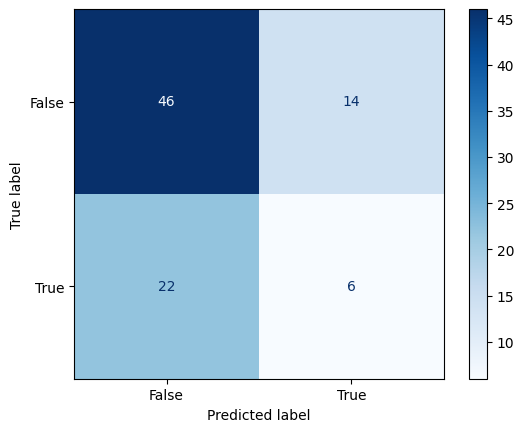

In [87]:
# with bert-v2-overlap-diarization
bert_v2_r_a_mean4_at = pd.read_csv('bert-v2-15k-r-a-mean4-at.csv')
bert_v2_r_a_mean4_at['result'] = np.where(bert_v2_r_a_mean4_at['hyps'] >= 0.5,1,0)
bert_v2_r_a_mean4_at_wrong = bert_v2_r_a_mean4_at.iloc[np.where(bert_v2_r_a_mean4_at['ifcorrect'] == False)]
print(bert_v2_r_a_mean4_at_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_r_a_mean4_at_result = bert_v2_r_a_mean4_at['result'].tolist()
bert_v2_r_a_mean4_at_hyps = bert_v2_r_a_mean4_at['hyps'].tolist()
bert_v2_r_a_mean4_at_truth = [int(i) for i in bert_v2_r_a_mean4_at['truth'].tolist()]
print(classification_report(bert_v2_r_a_mean4_at_truth, bert_v2_r_a_mean4_at_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_r_a_mean4_at_truth, bert_v2_r_a_mean4_at_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(bert_v2_r_a_mean4_at_truth[0:19]), np.array(bert_v2_r_a_mean4_at_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(bert_v2_r_a_mean4_at_truth[19:37]), np.array(bert_v2_r_a_mean4_at_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(bert_v2_r_a_mean4_at_truth[37:54]), np.array(bert_v2_r_a_mean4_at_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(bert_v2_r_a_mean4_at_truth[54:71]), np.array(bert_v2_r_a_mean4_at_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(bert_v2_r_a_mean4_at_truth[71:88]), np.array(bert_v2_r_a_mean4_at_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in bert_v2_r_a_mean4_at_truth]
y_pred = [bool(int(x)) for x in bert_v2_r_a_mean4_at_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

    name      hyps  truth  ifcorrect  result
0     15  0.819207    0.0      False       1
1     16  0.474309    1.0      False       0
5     33  0.754469    0.0      False       1
7     35  0.479098    1.0      False       0
20    25  0.147424    1.0      False       0
22    37  0.228657    1.0      False       0
24    45  0.191147    1.0      False       0
26    65  0.359743    1.0      False       0
28    68  0.948083    0.0      False       1
37    18  0.228684    1.0      False       0
39    20  0.385235    1.0      False       0
41    32  0.274770    1.0      False       0
46    57  0.049372    1.0      False       0
71    10  0.236731    1.0      False       0
75    31  0.342340    1.0      False       0
79     5  0.455778    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.81      0.95      0.88        60
     patient       0.83      0.54      0.65        28

    accuracy                           0.82        88
   macro avg     

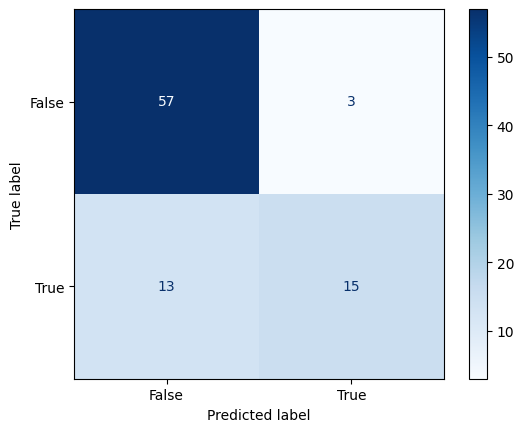

In [88]:
# with bert-v2-overlap-diarization
bert_v2_r_a = pd.read_csv('bert-v2-15k-r-a.csv')
bert_v2_r_a['result'] = np.where(bert_v2_r_a['hyps'] >= 0.5,1,0)
bert_v2_r_a_wrong = bert_v2_r_a.iloc[np.where(bert_v2_r_a['ifcorrect'] == False)]
print(bert_v2_r_a_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_r_a_result = bert_v2_r_a['result'].tolist()
bert_v2_r_a_hyps = bert_v2_r_a['hyps'].tolist()
bert_v2_r_a_truth = [int(i) for i in bert_v2_r_a['truth'].tolist()]
print(classification_report(bert_v2_r_a_truth, bert_v2_r_a_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_r_a_truth, bert_v2_r_a_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(bert_v2_r_a_truth[0:19]), np.array(bert_v2_r_a_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(bert_v2_r_a_truth[19:37]), np.array(bert_v2_r_a_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(bert_v2_r_a_truth[37:54]), np.array(bert_v2_r_a_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(bert_v2_r_a_truth[54:71]), np.array(bert_v2_r_a_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(bert_v2_r_a_truth[71:88]), np.array(bert_v2_r_a_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in bert_v2_r_a_truth]
y_pred = [bool(int(x)) for x in bert_v2_r_a_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

    name      hyps  truth  ifcorrect  result
0     15  0.889520    0.0      False       1
1     16  0.363114    1.0      False       0
4     28  0.253388    1.0      False       0
5     33  0.891200    0.0      False       1
7     35  0.327576    1.0      False       0
10    51  0.606602    0.0      False       1
20    25  0.217109    1.0      False       0
22    37  0.225847    1.0      False       0
24    45  0.198187    1.0      False       0
26    65  0.302439    1.0      False       0
27    67  0.470542    1.0      False       0
28    68  0.672999    0.0      False       1
29    71  0.615185    0.0      False       1
37    18  0.230666    1.0      False       0
39    20  0.282887    1.0      False       0
41    32  0.240318    1.0      False       0
42    38  0.490891    1.0      False       0
46    57  0.072382    1.0      False       0
47    58  0.447486    1.0      False       0
71    10  0.372413    1.0      False       0
79     5  0.323870    1.0      False       0
          

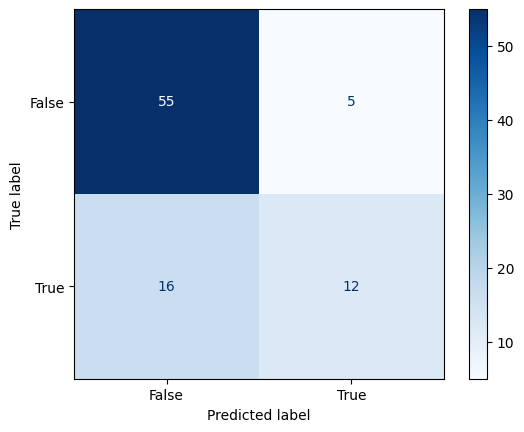

In [89]:
# with bert-v2-overlap-diarization
bert_v2_r_a_mean4 = pd.read_csv('bert-v2-15k-r-a-mean4.csv')
bert_v2_r_a_mean4['result'] = np.where(bert_v2_r_a_mean4['hyps'] >= 0.5,1,0)
bert_v2_r_a_mean4_wrong = bert_v2_r_a_mean4.iloc[np.where(bert_v2_r_a_mean4['ifcorrect'] == False)]
print(bert_v2_r_a_mean4_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_r_a_mean4_result = bert_v2_r_a_mean4['result'].tolist()
bert_v2_r_a_mean4_hyps = bert_v2_r_a_mean4['hyps'].tolist()
bert_v2_r_a_mean4_truth = [int(i) for i in bert_v2_r_a_mean4['truth'].tolist()]
print(classification_report(bert_v2_r_a_mean4_truth, bert_v2_r_a_mean4_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_r_a_mean4_truth, bert_v2_r_a_mean4_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(bert_v2_r_a_mean4_truth[0:19]), np.array(bert_v2_r_a_mean4_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(bert_v2_r_a_mean4_truth[19:37]), np.array(bert_v2_r_a_mean4_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(bert_v2_r_a_mean4_truth[37:54]), np.array(bert_v2_r_a_mean4_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(bert_v2_r_a_mean4_truth[54:71]), np.array(bert_v2_r_a_mean4_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(bert_v2_r_a_mean4_truth[71:88]), np.array(bert_v2_r_a_mean4_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in bert_v2_r_a_mean4_truth]
y_pred = [bool(int(x)) for x in bert_v2_r_a_mean4_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

### original

    name      hyps  truth  ifcorrect  result
0     15  0.825588    0.0      False       1
2     19  0.866405    0.0      False       1
5     33  0.944058    0.0      False       1
7     35  0.194594    1.0      False       0
10    51  0.791125    0.0      False       1
22    37  0.329976    1.0      False       0
24    45  0.087066    1.0      False       0
27    67  0.424116    1.0      False       0
28    68  0.684432    0.0      False       1
37    18  0.472637    1.0      False       0
41    32  0.215242    1.0      False       0
42    38  0.072879    1.0      False       0
45    52  0.617013    0.0      False       1
46    57  0.048187    1.0      False       0
47    58  0.197604    1.0      False       0
62    63  0.232716    1.0      False       0
71    10  0.219817    1.0      False       0
79     5  0.250869    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.82      0.90      0.86        60
     patient       0.73      0.57   

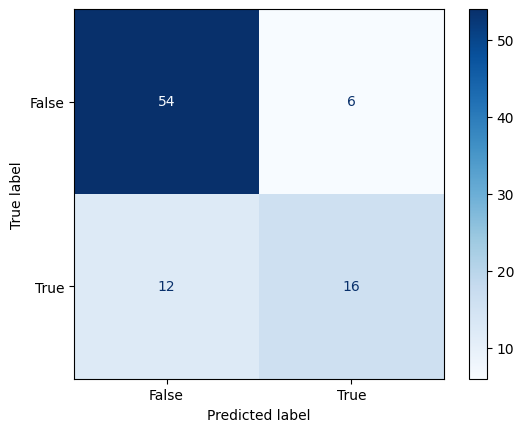

In [90]:
# with bert-v2-overlap-diarization
bert_v2_l7 = pd.read_csv('bert-v2-15k-l7.csv')
bert_v2_l7['result'] = np.where(bert_v2_l7['hyps'] >= 0.5,1,0)
bert_v2_l7_wrong = bert_v2_l7.iloc[np.where(bert_v2_l7['ifcorrect'] == False)]
print(bert_v2_l7_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_l7_result = bert_v2_l7['result'].tolist()
bert_v2_l7_hyps = bert_v2_l7['hyps'].tolist()
bert_v2_l7_truth = [int(i) for i in bert_v2_l7['truth'].tolist()]
print(classification_report(bert_v2_l7_truth, bert_v2_l7_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_l7_truth, bert_v2_l7_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(bert_v2_l7_truth[0:19]), np.array(bert_v2_l7_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(bert_v2_l7_truth[19:37]), np.array(bert_v2_l7_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(bert_v2_l7_truth[37:54]), np.array(bert_v2_l7_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(bert_v2_l7_truth[54:71]), np.array(bert_v2_l7_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(bert_v2_l7_truth[71:88]), np.array(bert_v2_l7_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in bert_v2_l7_truth]
y_pred = [bool(int(x)) for x in bert_v2_l7_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

    name      hyps  truth  ifcorrect  result
0     15  0.780101    0.0      False       1
2     19  0.903586    0.0      False       1
5     33  0.977081    0.0      False       1
7     35  0.109072    1.0      False       0
10    51  0.871969    0.0      False       1
19    11  0.326790    1.0      False       0
22    37  0.388392    1.0      False       0
23    39  0.382135    1.0      False       0
24    45  0.280805    1.0      False       0
27    67  0.346820    1.0      False       0
37    18  0.354093    1.0      False       0
41    32  0.164999    1.0      False       0
42    38  0.248550    1.0      False       0
45    52  0.540627    0.0      False       1
46    57  0.045602    1.0      False       0
47    58  0.278414    1.0      False       0
55    12  0.462666    1.0      False       0
62    63  0.221527    1.0      False       0
71    10  0.189177    1.0      False       0
74    24  0.306028    1.0      False       0
79     5  0.109777    1.0      False       0
          

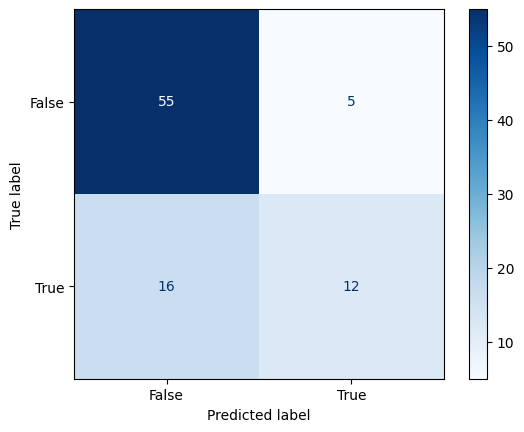

In [91]:
# with bert-v2-mean4
fivefolds_bert_v2_15k_mean4 = pd.read_csv('bert-v2-15k-mean4.csv')
fivefolds_bert_v2_15k_mean4['result'] = np.where(fivefolds_bert_v2_15k_mean4['hyps'] >= 0.5,1,0)
fivefolds_bert_v2_15k_mean4_wrong = fivefolds_bert_v2_15k_mean4.iloc[np.where(fivefolds_bert_v2_15k_mean4['ifcorrect'] == False)]
print(fivefolds_bert_v2_15k_mean4_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
fivefolds_bert_v2_15k_mean4_result = fivefolds_bert_v2_15k_mean4['result'].tolist()
fivefolds_bert_v2_15k_mean4_hyps = fivefolds_bert_v2_15k_mean4['hyps'].tolist()
fivefolds_bert_v2_15k_mean4_truth = [int(i) for i in fivefolds_bert_v2_15k_mean4['truth'].tolist()]
print(classification_report(fivefolds_bert_v2_15k_mean4_truth, fivefolds_bert_v2_15k_mean4_result, target_names=target_names))

tn, fp, fn, tp = confusion_matrix(fivefolds_bert_v2_15k_mean4_truth, fivefolds_bert_v2_15k_mean4_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth), np.array(fivefolds_bert_v2_15k_mean4_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth[0:19]), np.array(fivefolds_bert_v2_15k_mean4_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth[19:37]), np.array(fivefolds_bert_v2_15k_mean4_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth[37:54]), np.array(fivefolds_bert_v2_15k_mean4_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth[54:71]), np.array(fivefolds_bert_v2_15k_mean4_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth[71:88]), np.array(fivefolds_bert_v2_15k_mean4_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in fivefolds_bert_v2_15k_mean4_truth]
y_pred = [bool(int(x)) for x in fivefolds_bert_v2_15k_mean4_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

    name      hyps  truth  ifcorrect  result
0     15  0.814340    0.0      False       1
2     19  0.639607    0.0      False       1
5     33  0.878764    0.0      False       1
7     35  0.089982    1.0      False       0
8     40  0.358442    1.0      False       0
22    37  0.131392    1.0      False       0
24    45  0.168586    1.0      False       0
26    65  0.399203    1.0      False       0
41    32  0.307575    1.0      False       0
42    38  0.144789    1.0      False       0
45    52  0.527430    0.0      False       1
46    57  0.042184    1.0      False       0
47    58  0.237852    1.0      False       0
62    63  0.324645    1.0      False       0
71    10  0.097246    1.0      False       0
79     5  0.334217    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.82      0.93      0.87        60
     patient       0.80      0.57      0.67        28

    accuracy                           0.82        88
   macro avg     

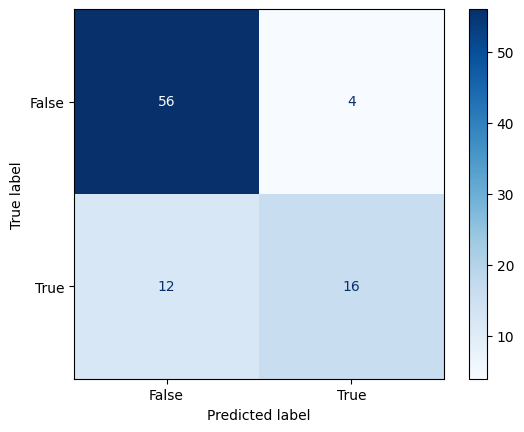

In [92]:
# with bert-v2-overlap-diarization
bert_v2 = pd.read_csv('bert-v2-15k.csv')
bert_v2['result'] = np.where(bert_v2['hyps'] >= 0.5,1,0)
bert_v2_wrong = bert_v2.iloc[np.where(bert_v2['ifcorrect'] == False)]
print(bert_v2_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_result = bert_v2['result'].tolist()
bert_v2_hyps = bert_v2['hyps'].tolist()
bert_v2_truth = [int(i) for i in bert_v2['truth'].tolist()]
print(classification_report(bert_v2_truth, bert_v2_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_truth, bert_v2_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(bert_v2_truth[0:19]), np.array(bert_v2_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(bert_v2_truth[19:37]), np.array(bert_v2_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(bert_v2_truth[37:54]), np.array(bert_v2_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(bert_v2_truth[54:71]), np.array(bert_v2_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(bert_v2_truth[71:88]), np.array(bert_v2_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in bert_v2_truth]
y_pred = [bool(int(x)) for x in bert_v2_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

### overlap

    name      hyps  truth  ifcorrect  result
0     15  0.912525    0.0      False       1
2     19  0.838906    0.0      False       1
3     22  0.814972    0.0      False       1
5     33  0.919078    0.0      False       1
7     35  0.066674    1.0      False       0
10    51  0.770736    0.0      False       1
22    37  0.185629    1.0      False       0
24    45  0.252018    1.0      False       0
28    68  0.509549    0.0      False       1
33    78  0.505974    0.0      False       1
37    18  0.378091    1.0      False       0
41    32  0.178293    1.0      False       0
42    38  0.124298    1.0      False       0
46    57  0.052875    1.0      False       0
47    58  0.187380    1.0      False       0
62    63  0.158695    1.0      False       0
71    10  0.262935    1.0      False       0
79     5  0.470130    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.83      0.88      0.85        60
     patient       0.71      0.61   

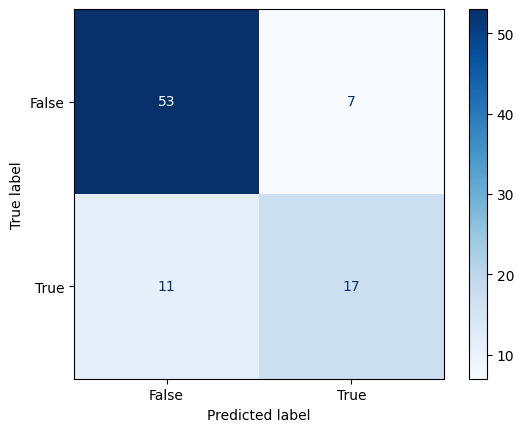

In [93]:
# with bert-v2-overlap-diarization
bert_v2_o_mean4 = pd.read_csv('bert-v2-15k-o-mean4.csv')
bert_v2_o_mean4['result'] = np.where(bert_v2_o_mean4['hyps'] >= 0.5,1,0)
bert_v2_o_mean4_wrong = bert_v2_o_mean4.iloc[np.where(bert_v2_o_mean4['ifcorrect'] == False)]
print(bert_v2_o_mean4_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_o_mean4_result = bert_v2_o_mean4['result'].tolist()
bert_v2_o_mean4_hyps = bert_v2_o_mean4['hyps'].tolist()
bert_v2_o_mean4_truth = [int(i) for i in bert_v2_o_mean4['truth'].tolist()]
print(classification_report(bert_v2_o_mean4_truth, bert_v2_o_mean4_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_o_mean4_truth, bert_v2_o_mean4_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(bert_v2_o_mean4_truth[0:19]), np.array(bert_v2_o_mean4_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(bert_v2_o_mean4_truth[19:37]), np.array(bert_v2_o_mean4_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(bert_v2_o_mean4_truth[37:54]), np.array(bert_v2_o_mean4_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(bert_v2_o_mean4_truth[54:71]), np.array(bert_v2_o_mean4_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(bert_v2_o_mean4_truth[71:88]), np.array(bert_v2_o_mean4_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in bert_v2_o_mean4_truth]
y_pred = [bool(int(x)) for x in bert_v2_o_mean4_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

    name      hyps  truth  ifcorrect  result
0     15  0.847262    0.0      False       1
2     19  0.655451    0.0      False       1
3     22  0.712177    0.0      False       1
5     33  0.840988    0.0      False       1
7     35  0.078750    1.0      False       0
8     40  0.397226    1.0      False       0
10    51  0.573037    0.0      False       1
22    37  0.122377    1.0      False       0
24    45  0.202619    1.0      False       0
26    65  0.457418    1.0      False       0
37    18  0.489159    1.0      False       0
41    32  0.197589    1.0      False       0
42    38  0.129322    1.0      False       0
45    52  0.584316    0.0      False       1
46    57  0.034127    1.0      False       0
47    58  0.120508    1.0      False       0
62    63  0.238090    1.0      False       0
71    10  0.107796    1.0      False       0
79     5  0.393851    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.81      0.90      0.85  

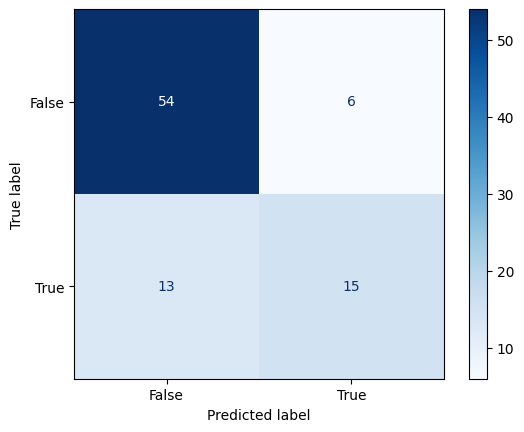

In [94]:
# with bert-v2-overlap-diarization
bert_v2_o = pd.read_csv('bert-v2-15k-o.csv')
bert_v2_o['result'] = np.where(bert_v2_o['hyps'] >= 0.5,1,0)
bert_v2_o_wrong = bert_v2_o.iloc[np.where(bert_v2_o['ifcorrect'] == False)]
print(bert_v2_o_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_o_result = bert_v2_o['result'].tolist()
bert_v2_o_hyps = bert_v2_o['hyps'].tolist()
bert_v2_o_truth = [int(i) for i in bert_v2_o['truth'].tolist()]
print(classification_report(bert_v2_o_truth, bert_v2_o_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_o_truth, bert_v2_o_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(bert_v2_o_truth[0:19]), np.array(bert_v2_o_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(bert_v2_o_truth[19:37]), np.array(bert_v2_o_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(bert_v2_o_truth[37:54]), np.array(bert_v2_o_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(bert_v2_o_truth[54:71]), np.array(bert_v2_o_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(bert_v2_o_truth[71:88]), np.array(bert_v2_o_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in bert_v2_o_truth]
y_pred = [bool(int(x)) for x in bert_v2_o_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

### overlap & diarization

    name      hyps  truth  ifcorrect  result
0     15  0.876496    0.0      False       1
2     19  0.909436    0.0      False       1
3     22  0.573017    0.0      False       1
5     33  0.972549    0.0      False       1
7     35  0.115558    1.0      False       0
10    51  0.776765    0.0      False       1
22    37  0.172574    1.0      False       0
24    45  0.124433    1.0      False       0
37    18  0.215117    1.0      False       0
39    20  0.397491    1.0      False       0
41    32  0.153543    1.0      False       0
42    38  0.171612    1.0      False       0
46    57  0.066505    1.0      False       0
47    58  0.202509    1.0      False       0
59     4  0.432489    1.0      False       0
62    63  0.116401    1.0      False       0
79     5  0.264693    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.82      0.92      0.87        60
     patient       0.76      0.57      0.65        28

    accuracy              

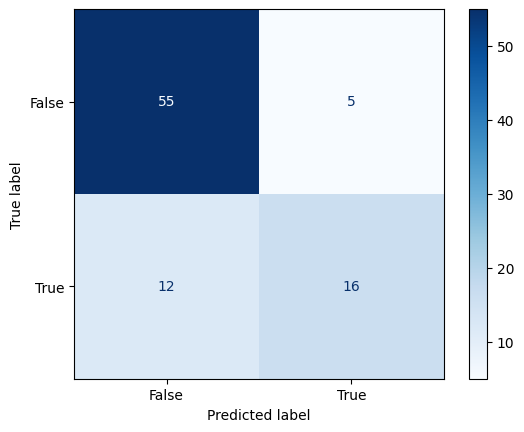

In [95]:
# with bert-v2-overlap-diarization
bert_v2_o_d_mean4 = pd.read_csv('bert-v2-15k-o-d-mean4.csv')
bert_v2_o_d_mean4['result'] = np.where(bert_v2_o_d_mean4['hyps'] >= 0.5,1,0)
bert_v2_o_d_mean4_wrong = bert_v2_o_d_mean4.iloc[np.where(bert_v2_o_d_mean4['ifcorrect'] == False)]
print(bert_v2_o_d_mean4_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_o_d_mean4_result = bert_v2_o_d_mean4['result'].tolist()
bert_v2_o_d_mean4_hyps = bert_v2_o_d_mean4['hyps'].tolist()
bert_v2_o_d_mean4_truth = [int(i) for i in bert_v2_o_d_mean4['truth'].tolist()]
print(classification_report(bert_v2_o_d_mean4_truth, bert_v2_o_d_mean4_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_o_d_mean4_truth, bert_v2_o_d_mean4_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(bert_v2_o_d_mean4_truth[0:19]), np.array(bert_v2_o_d_mean4_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(bert_v2_o_d_mean4_truth[19:37]), np.array(bert_v2_o_d_mean4_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(bert_v2_o_d_mean4_truth[37:54]), np.array(bert_v2_o_d_mean4_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(bert_v2_o_d_mean4_truth[54:71]), np.array(bert_v2_o_d_mean4_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(bert_v2_o_d_mean4_truth[71:88]), np.array(bert_v2_o_d_mean4_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in bert_v2_o_d_mean4_truth]
y_pred = [bool(int(x)) for x in bert_v2_o_d_mean4_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

    name      hyps  truth  ifcorrect  result
0     15  0.652063    0.0      False       1
2     19  0.710956    0.0      False       1
3     22  0.671705    0.0      False       1
5     33  0.872895    0.0      False       1
7     35  0.073373    1.0      False       0
10    51  0.734261    0.0      False       1
22    37  0.057399    1.0      False       0
24    45  0.091232    1.0      False       0
26    65  0.280856    1.0      False       0
37    18  0.166925    1.0      False       0
39    20  0.364902    1.0      False       0
41    32  0.137811    1.0      False       0
42    38  0.177165    1.0      False       0
46    57  0.053958    1.0      False       0
47    58  0.208653    1.0      False       0
62    63  0.276549    1.0      False       0
71    10  0.422768    1.0      False       0
79     5  0.232299    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.81      0.92      0.86        60
     patient       0.75      0.54   

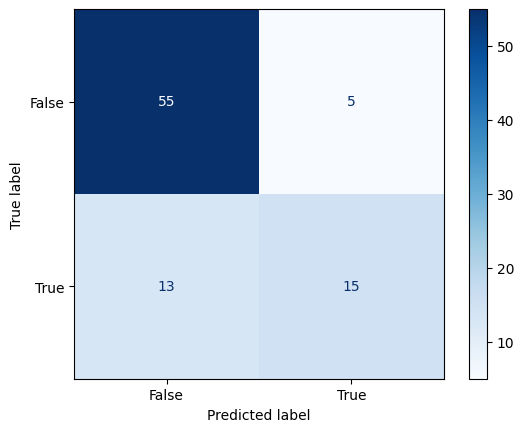

In [96]:
# with bert-v2-overlap-diarization
bert_v2_o_d = pd.read_csv('bert-v2-15k-o-d.csv')
bert_v2_o_d['result'] = np.where(bert_v2_o_d['hyps'] >= 0.5,1,0)
bert_v2_o_d_wrong = bert_v2_o_d.iloc[np.where(bert_v2_o_d['ifcorrect'] == False)]
print(bert_v2_o_d_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_o_d_result = bert_v2_o_d['result'].tolist()
bert_v2_o_d_hyps = bert_v2_o_d['hyps'].tolist()
bert_v2_o_d_truth = [int(i) for i in bert_v2_o_d['truth'].tolist()]
print(classification_report(bert_v2_o_d_truth, bert_v2_o_d_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_o_d_truth, bert_v2_o_d_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(bert_v2_o_d_truth[0:19]), np.array(bert_v2_o_d_hyps[0:19]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(bert_v2_o_d_truth[19:37]), np.array(bert_v2_o_d_hyps[19:37]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(bert_v2_o_d_truth[37:54]), np.array(bert_v2_o_d_hyps[37:54]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(bert_v2_o_d_truth[54:71]), np.array(bert_v2_o_d_hyps[54:71]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(bert_v2_o_d_truth[71:88]), np.array(bert_v2_o_d_hyps[71:88]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in bert_v2_o_d_truth]
y_pred = [bool(int(x)) for x in bert_v2_o_d_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

## llama

# Final version

In [97]:
def eval_std_ci(truth_df, hyps_df, result_df):
    f1_scores = []
    sensitivities = []
    specificities = []
    aucs = []
    fold_indices = [(0, 17), (17, 35), (35, 52), (52, 69), (69, 86)]

    for start, end in fold_indices:
        truth = np.array(truth_df[start:end])
        hyps = np.array(hyps_df[start:end])
        # hyps_binary = (hyps >= 0.5).astype(int)
        hyps_binary = np.array(result_df[start:end])

        f1 = f1_score(truth, hyps_binary)
        f1_scores.append(f1)
        sensitivity = recall_score(truth, hyps_binary)
        sensitivities.append(sensitivity)
        cm = confusion_matrix(truth, hyps_binary)
        tn = cm[0, 0]
        fp = cm[0, 1]
        specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
        specificities.append(specificity)
        fpr, tpr, _ = roc_curve(truth, hyps, pos_label=1)
        auc_score = auc(fpr, tpr)
        aucs.append(auc_score)

    mean_f1 = np.mean(f1_scores)
    std_f1 = np.std(f1_scores)
    mean_sensitivity = np.mean(sensitivities)
    std_sensitivity = np.std(sensitivities)
    mean_specificity = np.mean(specificities)
    std_specificity = np.std(specificities)
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)

    conf_interval_f1 = t.interval(0.95, len(f1_scores)-1, loc=mean_f1, scale=std_f1/np.sqrt(len(f1_scores)))
    conf_interval_sensitivity = t.interval(0.95, len(sensitivities)-1, loc=mean_sensitivity, scale=std_sensitivity/np.sqrt(len(sensitivities)))
    conf_interval_specificity = t.interval(0.95, len(specificities)-1, loc=mean_specificity, scale=std_specificity/np.sqrt(len(specificities)))
    conf_interval_auc = t.interval(0.95, len(aucs)-1, loc=mean_auc, scale=std_auc/np.sqrt(len(aucs)))

    def adjust_confidence_interval(conf_interval):
        return (max(0, min(conf_interval[0], 1)), max(0, min(conf_interval[1], 1)))

    conf_interval_f1 = adjust_confidence_interval(conf_interval_f1)
    conf_interval_sensitivity = adjust_confidence_interval(conf_interval_sensitivity)
    conf_interval_specificity = adjust_confidence_interval(conf_interval_specificity)
    conf_interval_auc = adjust_confidence_interval(conf_interval_auc)


    return f1_scores, sensitivities, specificities, aucs, mean_f1, mean_sensitivity, mean_specificity, mean_auc, std_f1, std_sensitivity, std_specificity, std_auc, conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc

### Whisper

                                name      hyps  truth  ifcorrect  result
5   data_process\CTT5-1-16\35CTT.wav  0.334292    1.0      False       0
8   data_process\CTT5-1-16\51CTT.wav  0.856904    0.0      False       1
14  data_process\CTT5-1-16\85CTT.wav  0.733548    0.0      False       1
20  data_process\CTT5-2-16\37CTT.wav  0.309370    1.0      False       0
22  data_process\CTT5-2-16\45CTT.wav  0.287933    1.0      False       0
26  data_process\CTT5-2-16\68CTT.wav  0.834147    0.0      False       1
35  data_process\CTT5-3-16\18CTT.wav  0.439938    1.0      False       0
39  data_process\CTT5-3-16\32CTT.wav  0.235928    1.0      False       0
43  data_process\CTT5-3-16\52CTT.wav  0.567381    0.0      False       1
44  data_process\CTT5-3-16\57CTT.wav  0.057635    1.0      False       0
55  data_process\CTT5-4-16\21CTT.wav  0.641012    0.0      False       1
69  data_process\CTT5-5-16\10CTT.wav  0.441028    1.0      False       0
74  data_process\CTT5-5-16\44CTT.wav  0.646084    0

Text(0.5, 1.0, 'Whisper -r-a')

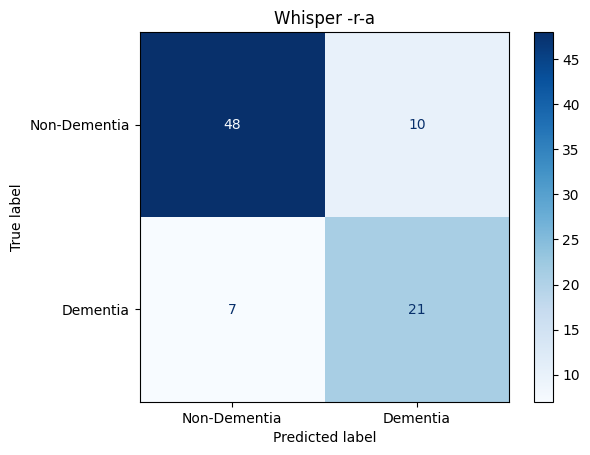

In [98]:
# with bert-v2-overlap-diarization
whisper_v2_r_a_f = pd.read_csv('whisper-v2-15k-r-a-final-fix.csv')
whisper_v2_r_a_f['result'] = np.where(whisper_v2_r_a_f['hyps'] >= 0.5,1,0)
whisper_v2_r_a_f_wrong = whisper_v2_r_a_f.iloc[np.where(whisper_v2_r_a_f['ifcorrect'] == False)]
print(whisper_v2_r_a_f_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
whisper_v2_r_a_f_result = whisper_v2_r_a_f['result'].tolist()
whisper_v2_r_a_f_hyps = whisper_v2_r_a_f['hyps'].tolist()
whisper_v2_r_a_f_truth = [int(i) for i in whisper_v2_r_a_f['truth'].tolist()]
print(classification_report(whisper_v2_r_a_f_truth, whisper_v2_r_a_f_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(whisper_v2_r_a_f_truth, whisper_v2_r_a_f_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))
print('f1-score: ', f1_score(whisper_v2_r_a_f_truth, whisper_v2_r_a_f_result))
print('accuracy: ', accuracy_score(whisper_v2_r_a_f_truth, whisper_v2_r_a_f_result))

# fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(whisper_v2_r_a_f_truth[0:17]), np.array(whisper_v2_r_a_f_hyps[0:17]), pos_label=1)
# auc1 = metrics.auc(fpr1, tpr1)
# fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(whisper_v2_r_a_f_truth[17:35]), np.array(whisper_v2_r_a_f_hyps[17:35]), pos_label=1)
# auc2 = metrics.auc(fpr2, tpr2)
# fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(whisper_v2_r_a_f_truth[35:52]), np.array(whisper_v2_r_a_f_hyps[35:52]), pos_label=1)
# auc3 = metrics.auc(fpr3, tpr3)
# fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(whisper_v2_r_a_f_truth[52:69]), np.array(whisper_v2_r_a_f_hyps[52:69]), pos_label=1)
# auc4 = metrics.auc(fpr4, tpr4)
# fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(whisper_v2_r_a_f_truth[69:86]), np.array(whisper_v2_r_a_f_hyps[69:86]), pos_label=1)
# auc5 = metrics.auc(fpr5, tpr5)
# print('AUC: ', auc1, auc2, auc3, auc4, auc5)
# print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(whisper_v2_r_a_f_truth, whisper_v2_r_a_f_hyps, whisper_v2_r_a_f_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in whisper_v2_r_a_f_truth]
y_pred = [bool(int(x)) for x in whisper_v2_r_a_f_result]
labels = ['Non-Dementia', 'Dementia']
display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("Whisper -r-a")

                                name      hyps  truth  ifcorrect  result
5   data_process\CTT5-1-16\35CTT.wav  0.314492    1.0      False       0
8   data_process\CTT5-1-16\51CTT.wav  0.857440    0.0      False       1
14  data_process\CTT5-1-16\85CTT.wav  0.747786    0.0      False       1
22  data_process\CTT5-2-16\45CTT.wav  0.494891    1.0      False       0
25  data_process\CTT5-2-16\67CTT.wav  0.387603    1.0      False       0
26  data_process\CTT5-2-16\68CTT.wav  0.920573    0.0      False       1
31  data_process\CTT5-2-16\78CTT.wav  0.500164    0.0      False       1
39  data_process\CTT5-3-16\32CTT.wav  0.290095    1.0      False       0
44  data_process\CTT5-3-16\57CTT.wav  0.057452    1.0      False       0
55  data_process\CTT5-4-16\21CTT.wav  0.716041    0.0      False       1
74  data_process\CTT5-5-16\44CTT.wav  0.763131    0.0      False       1
75  data_process\CTT5-5-16\47CTT.wav  0.704530    0.0      False       1
79  data_process\CTT5-5-16\69CTT.wav  0.715583    0

Text(0.5, 1.0, 'Whisper -r-a')

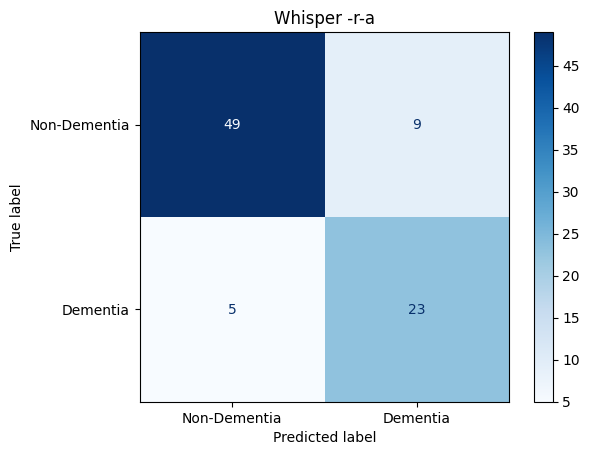

In [99]:
# with bert-v2-overlap-diarization
whisper_v2_r_a_f = pd.read_csv('whisper-v2-15k-r-a-final.csv')
whisper_v2_r_a_f['result'] = np.where(whisper_v2_r_a_f['hyps'] >= 0.5,1,0)
whisper_v2_r_a_f_wrong = whisper_v2_r_a_f.iloc[np.where(whisper_v2_r_a_f['ifcorrect'] == False)]
print(whisper_v2_r_a_f_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
whisper_v2_r_a_f_result = whisper_v2_r_a_f['result'].tolist()
whisper_v2_r_a_f_hyps = whisper_v2_r_a_f['hyps'].tolist()
whisper_v2_r_a_f_truth = [int(i) for i in whisper_v2_r_a_f['truth'].tolist()]
print(classification_report(whisper_v2_r_a_f_truth, whisper_v2_r_a_f_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(whisper_v2_r_a_f_truth, whisper_v2_r_a_f_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(whisper_v2_r_a_f_truth[0:17]), np.array(whisper_v2_r_a_f_hyps[0:17]), pos_label=1)
# auc1 = metrics.auc(fpr1, tpr1)
# fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(whisper_v2_r_a_f_truth[17:35]), np.array(whisper_v2_r_a_f_hyps[17:35]), pos_label=1)
# auc2 = metrics.auc(fpr2, tpr2)
# fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(whisper_v2_r_a_f_truth[35:52]), np.array(whisper_v2_r_a_f_hyps[35:52]), pos_label=1)
# auc3 = metrics.auc(fpr3, tpr3)
# fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(whisper_v2_r_a_f_truth[52:69]), np.array(whisper_v2_r_a_f_hyps[52:69]), pos_label=1)
# auc4 = metrics.auc(fpr4, tpr4)
# fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(whisper_v2_r_a_f_truth[69:86]), np.array(whisper_v2_r_a_f_hyps[69:86]), pos_label=1)
# auc5 = metrics.auc(fpr5, tpr5)
# print('AUC: ', auc1, auc2, auc3, auc4, auc5)
# print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(whisper_v2_r_a_f_truth, whisper_v2_r_a_f_hyps, whisper_v2_r_a_f_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in whisper_v2_r_a_f_truth]
y_pred = [bool(int(x)) for x in whisper_v2_r_a_f_result]
labels = ['Non-Dementia', 'Dementia']
display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("Whisper -r-a")

In [100]:
whisper_v2_15k_a_o_d_f = pd.read_csv('whisper-v2-15k-a-o-d-final-fix.csv')
print(whisper_v2_15k_a_o_d_f)
result = np.where(whisper_v2_15k_a_o_d_f['hyps'] >= 0.5,1,0)
name = whisper_v2_15k_a_o_d_f['name'].values.tolist()
truth = whisper_v2_15k_a_o_d_f['truth'].values.tolist()
hyps = whisper_v2_15k_a_o_d_f['hyps'].values.tolist()
allresult = np.full([101, 105], np.nan)
major = np.zeros([101, 4])
majorvote = np.zeros([101, 5])
correct = 0
fold = []
prevfile = 0
previdx = 0

for i in range(len(name)):
    # print(name[i])
    file = int(name[i].split('\\')[-1].split('C')[0])
    idx = int(name[i].split('\\')[-1].split('_')[1].split('.')[0])
    allresult[file-1][0] = file
    allresult[file-1][idx] = result[i]
    major[file-1][int(result[i])] += 1
    major[file-1][2] = truth[i]
    major[file-1][3] += hyps[i]
    if(file != prevfile):
        fold.append(int(file))
        major[prevfile-1][3] /= previdx
    prevfile = file
    previdx = idx
major[prevfile-1][3] /= previdx

for i in range(len(major)):
    if(i != 19-1 and i != 33-1 and i != 23-1 and i != 26-1 and i != 27-1 and i != 36-1 and i != 41-1 and i != 48-1 and i != 49-1 and i != 59-1 and i != 60-1 and i != 61-1 and i != 62-1 and i != 66-1):
        majorvote[i][0] = i+1
        majorvote[i][1] = 0 if (major[i][0] >= major[i][1]) else 1
        majorvote[i][2] = major[i][2]
        majorvote[i][3] = major[i][3]
        majorvote[i][4] = 1 if (major[i][3] >= 0.5) else 0
        if(majorvote[i][1] == majorvote[i][2]): 
            correct += 1
print(fold)           
print(correct, 86, correct/86)
whisper_v2_15k_a_o_d_f_allresult_df = pd.DataFrame(allresult)
whisper_v2_15k_a_o_d_f_allresult_df.to_csv(f'whisper-with10separate_allresult.csv', index=False) 
whisper_v2_15k_a_o_d_f_finalresult_df = pd.DataFrame(majorvote, columns=['name', 'result', 'truth', 'hyps', 'result2'])
whisper_v2_15k_a_o_d_f_finalresult_df.to_csv(f'whisper-with10separate_finalresult.csv', index=False) 
print(whisper_v2_15k_a_o_d_f_finalresult_df)
# whisper_v2_15k_a_o_d_f_finalresult_df = whisper_v2_15k_a_o_d_f_finalresult_df.drop(['name'], axis=1)
whisper_v2_15k_a_o_d_f_finalresult_df["name"] = whisper_v2_15k_a_o_d_f_finalresult_df["name"].astype(int)
whisper_v2_15k_a_o_d_f_finalresult_df = whisper_v2_15k_a_o_d_f_finalresult_df.drop([18, 32, 22, 25, 26, 35, 40, 47, 48, 58, 59, 60, 61, 65], axis=0)
whisper_v2_15k_a_o_d_f_finalresult_df["idx"] = whisper_v2_15k_a_o_d_f_finalresult_df["name"]
whisper_v2_15k_a_o_d_f_finalresult_df.set_index('idx', inplace=True)
whisper_v2_15k_a_o_d_f_finalresult_df = whisper_v2_15k_a_o_d_f_finalresult_df.reindex(fold)
whisper_v2_15k_a_o_d_f_finalresult_df.to_csv(f'whisper-with10separate_finalresult_reindex.csv', index=False) 
print(whisper_v2_15k_a_o_d_f_finalresult_df)

                                   name      hyps  truth  ifcorrect
0    data_process\CTT5-1-14\15CTT_1.wav  0.631217    0.0      False
1    data_process\CTT5-1-14\15CTT_2.wav  0.544119    0.0      False
2    data_process\CTT5-1-14\16CTT_1.wav  0.798114    1.0       True
3    data_process\CTT5-1-14\22CTT_1.wav  0.238784    0.0       True
4    data_process\CTT5-1-14\28CTT_1.wav  0.573580    1.0       True
..                                  ...       ...    ...        ...
139  data_process\CTT5-5-14\79CTT_1.wav  0.268232    0.0       True
140  data_process\CTT5-5-14\79CTT_2.wav  0.604316    0.0      False
141   data_process\CTT5-5-14\8CTT_1.wav  0.571625    0.0      False
142  data_process\CTT5-5-14\90CTT_1.wav  0.309593    0.0       True
143  data_process\CTT5-5-14\95CTT_1.wav  0.265668    0.0       True

[144 rows x 4 columns]
[15, 16, 22, 28, 34, 35, 40, 42, 51, 53, 55, 70, 83, 84, 85, 97, 99, 11, 25, 2, 37, 39, 45, 46, 65, 67, 68, 71, 74, 76, 77, 78, 80, 91, 94, 18, 1, 20, 30, 32, 3

C:\Users\naomi\AppData\Local\Temp\ipykernel_15656\1444522456.py:26: RuntimeWarning: invalid value encountered in scalar divide
  major[prevfile-1][3] /= previdx


     name  result  truth      hyps  result2
idx                                        
15     15     1.0    0.0  0.587668      1.0
35     35     0.0    1.0  0.437723      0.0
51     51     1.0    0.0  0.634173      1.0
99     99     1.0    0.0  0.547196      1.0
25     25     0.0    1.0  0.240669      0.0
37     37     0.0    1.0  0.311218      0.0
39     39     0.0    1.0  0.264112      0.0
45     45     0.0    1.0  0.370924      0.0
46     46     0.0    1.0  0.314863      0.0
20     20     0.0    1.0  0.464729      0.0
32     32     0.0    1.0  0.468987      0.0
38     38     0.0    1.0  0.390152      0.0
57     57     0.0    1.0  0.515158      1.0
58     58     0.0    1.0  0.175352      0.0
12     12     0.0    1.0  0.458266      0.0
88     88     1.0    0.0  0.614672      1.0
10     10     0.0    1.0  0.462926      0.0
13     13     1.0    0.0  0.763449      1.0
47     47     1.0    0.0  0.550413      1.0
5       5     0.0    1.0  0.429457      0.0
69     69     1.0    0.0  0.5986

Text(0.5, 1.0, 'Whisper -p-a')

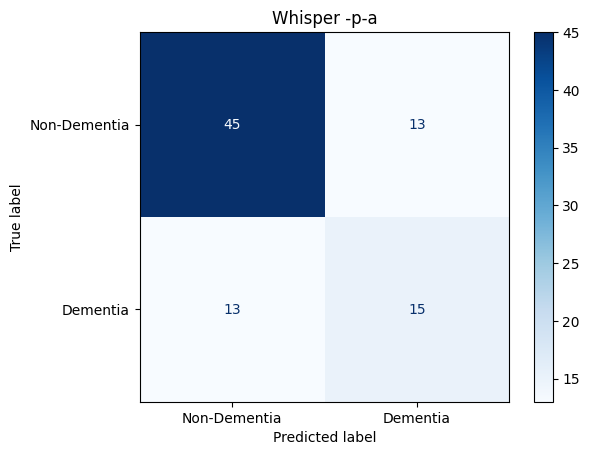

In [101]:
whisper_v2_15k_a_o_d_f_finalresult_df_result = whisper_v2_15k_a_o_d_f_finalresult_df['result']
whisper_v2_15k_a_o_d_f_finalresult_df_result2 = whisper_v2_15k_a_o_d_f_finalresult_df['result2']
whisper_v2_15k_a_o_d_f_finalresult_df_truth = whisper_v2_15k_a_o_d_f_finalresult_df['truth']
whisper_v2_15k_a_o_d_f_finalresult_df_hyps = whisper_v2_15k_a_o_d_f_finalresult_df['hyps']
whisper_v2_15k_a_o_d_f_finalresult_df_wrong = whisper_v2_15k_a_o_d_f_finalresult_df.iloc[np.where(whisper_v2_15k_a_o_d_f_finalresult_df['result'] != whisper_v2_15k_a_o_d_f_finalresult_df['truth'])]
print(whisper_v2_15k_a_o_d_f_finalresult_df_wrong)
clf_report  = classification_report(whisper_v2_15k_a_o_d_f_finalresult_df_truth, whisper_v2_15k_a_o_d_f_finalresult_df_result, target_names=target_names)
print(clf_report)
tn, fp, fn, tp = confusion_matrix(whisper_v2_15k_a_o_d_f_finalresult_df_truth, whisper_v2_15k_a_o_d_f_finalresult_df_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(whisper_v2_15k_a_o_d_f_finalresult_df_truth), np.array(whisper_v2_15k_a_o_d_f_finalresult_df_result), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(whisper_v2_15k_a_o_d_f_finalresult_df_truth, whisper_v2_15k_a_o_d_f_finalresult_df_hyps, whisper_v2_15k_a_o_d_f_finalresult_df_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

whisper_v2_15k_a_o_d_f_finalresult_df_wrong = whisper_v2_15k_a_o_d_f_finalresult_df.iloc[np.where(whisper_v2_15k_a_o_d_f_finalresult_df['result2'] != whisper_v2_15k_a_o_d_f_finalresult_df['truth'])]
print(whisper_v2_15k_a_o_d_f_finalresult_df_wrong)
clf_report  = classification_report(whisper_v2_15k_a_o_d_f_finalresult_df_truth, whisper_v2_15k_a_o_d_f_finalresult_df_result2, target_names=target_names)
print(clf_report)
tn, fp, fn, tp = confusion_matrix(whisper_v2_15k_a_o_d_f_finalresult_df_truth, whisper_v2_15k_a_o_d_f_finalresult_df_result2).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(whisper_v2_15k_a_o_d_f_finalresult_df_truth, whisper_v2_15k_a_o_d_f_finalresult_df_hyps, whisper_v2_15k_a_o_d_f_finalresult_df_result2)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in whisper_v2_15k_a_o_d_f_finalresult_df_truth]
y_pred = [bool(int(x)) for x in whisper_v2_15k_a_o_d_f_finalresult_df_result2]
labels = ['Non-Dementia', 'Dementia']
display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("Whisper -p-a")

In [102]:
whisper_v2_15k_a_o_d_f = pd.read_csv('whisper-v2-15k-a-o-d-final.csv')
print(whisper_v2_15k_a_o_d_f)
result = np.where(whisper_v2_15k_a_o_d_f['hyps'] >= 0.5,1,0)
name = whisper_v2_15k_a_o_d_f['name'].values.tolist()
truth = whisper_v2_15k_a_o_d_f['truth'].values.tolist()
hyps = whisper_v2_15k_a_o_d_f['hyps'].values.tolist()
allresult = np.full([101, 105], np.nan)
major = np.zeros([101, 4])
majorvote = np.zeros([101, 5])
correct = 0
fold = []
prevfile = 0
previdx = 0

for i in range(len(name)):
    # print(name[i])
    file = int(name[i].split('\\')[-1].split('C')[0])
    idx = int(name[i].split('\\')[-1].split('_')[1].split('.')[0])
    allresult[file-1][0] = file
    allresult[file-1][idx] = result[i]
    major[file-1][int(result[i])] += 1
    major[file-1][2] = truth[i]
    major[file-1][3] += hyps[i]
    if(file != prevfile):
        fold.append(int(file))
        major[prevfile-1][3] /= previdx
    prevfile = file
    previdx = idx
major[prevfile-1][3] /= previdx

for i in range(len(major)):
    if(i != 19-1 and i != 33-1 and i != 23-1 and i != 26-1 and i != 27-1 and i != 36-1 and i != 41-1 and i != 48-1 and i != 49-1 and i != 59-1 and i != 60-1 and i != 61-1 and i != 62-1 and i != 66-1):
        majorvote[i][0] = i+1
        majorvote[i][1] = 0 if (major[i][0] >= major[i][1]) else 1
        majorvote[i][2] = major[i][2]
        majorvote[i][3] = major[i][3]
        majorvote[i][4] = 1 if (major[i][3] >= 0.5) else 0
        if(majorvote[i][1] == majorvote[i][2]): 
            correct += 1
print(fold)           
print(correct, 86, correct/86)
whisper_v2_15k_a_o_d_f_allresult_df = pd.DataFrame(allresult)
whisper_v2_15k_a_o_d_f_allresult_df.to_csv(f'whisper-with10separate_allresult.csv', index=False) 
whisper_v2_15k_a_o_d_f_finalresult_df = pd.DataFrame(majorvote, columns=['name', 'result', 'truth', 'hyps', 'result2'])
whisper_v2_15k_a_o_d_f_finalresult_df.to_csv(f'whisper-with10separate_finalresult.csv', index=False) 
print(whisper_v2_15k_a_o_d_f_finalresult_df)
# whisper_v2_15k_a_o_d_f_finalresult_df = whisper_v2_15k_a_o_d_f_finalresult_df.drop(['name'], axis=1)
whisper_v2_15k_a_o_d_f_finalresult_df["name"] = whisper_v2_15k_a_o_d_f_finalresult_df["name"].astype(int)
whisper_v2_15k_a_o_d_f_finalresult_df = whisper_v2_15k_a_o_d_f_finalresult_df.drop([18, 32, 22, 25, 26, 35, 40, 47, 48, 58, 59, 60, 61, 65], axis=0)
whisper_v2_15k_a_o_d_f_finalresult_df["idx"] = whisper_v2_15k_a_o_d_f_finalresult_df["name"]
whisper_v2_15k_a_o_d_f_finalresult_df.set_index('idx', inplace=True)
whisper_v2_15k_a_o_d_f_finalresult_df = whisper_v2_15k_a_o_d_f_finalresult_df.reindex(fold)
whisper_v2_15k_a_o_d_f_finalresult_df.to_csv(f'whisper-with10separate_finalresult_reindex.csv', index=False) 
print(whisper_v2_15k_a_o_d_f_finalresult_df)

                                   name      hyps  truth  ifcorrect
0    data_process\CTT5-1-14\15CTT_1.wav  0.683648    0.0      False
1    data_process\CTT5-1-14\15CTT_2.wav  0.586544    0.0      False
2    data_process\CTT5-1-14\16CTT_1.wav  0.855847    1.0       True
3    data_process\CTT5-1-14\22CTT_1.wav  0.267952    0.0       True
4    data_process\CTT5-1-14\28CTT_1.wav  0.575692    1.0       True
..                                  ...       ...    ...        ...
139  data_process\CTT5-5-14\79CTT_1.wav  0.258370    0.0       True
140  data_process\CTT5-5-14\79CTT_2.wav  0.564701    0.0      False
141   data_process\CTT5-5-14\8CTT_1.wav  0.476379    0.0       True
142  data_process\CTT5-5-14\90CTT_1.wav  0.318521    0.0       True
143  data_process\CTT5-5-14\95CTT_1.wav  0.236201    0.0       True

[144 rows x 4 columns]
[15, 16, 22, 28, 34, 35, 40, 42, 51, 53, 55, 70, 83, 84, 85, 97, 99, 11, 25, 2, 37, 39, 45, 46, 65, 67, 68, 71, 74, 76, 77, 78, 80, 91, 94, 18, 1, 20, 30, 32, 3

C:\Users\naomi\AppData\Local\Temp\ipykernel_15656\2838663980.py:26: RuntimeWarning: invalid value encountered in scalar divide
  major[prevfile-1][3] /= previdx


     name  result  truth      hyps  result2
idx                                        
15     15     1.0    0.0  0.635096      1.0
34     34     1.0    0.0  0.524628      1.0
35     35     0.0    1.0  0.479671      0.0
51     51     1.0    0.0  0.681136      1.0
85     85     1.0    0.0  0.540933      1.0
99     99     1.0    0.0  0.564518      1.0
32     32     0.0    1.0  0.499894      0.0
57     57     0.0    1.0  0.524500      1.0
58     58     0.0    1.0  0.229289      0.0
100   100     1.0    0.0  0.594925      1.0
21     21     1.0    0.0  0.515164      1.0
88     88     1.0    0.0  0.729698      1.0
10     10     0.0    1.0  0.430758      0.0
13     13     1.0    0.0  0.744772      1.0
47     47     1.0    0.0  0.517207      1.0
5       5     0.0    1.0  0.405599      0.0
69     69     1.0    0.0  0.572377      1.0
              precision    recall  f1-score   support

 non-patient       0.89      0.81      0.85        58
     patient       0.67      0.79      0.72        28



Text(0.5, 1.0, 'Whisper -p-a')

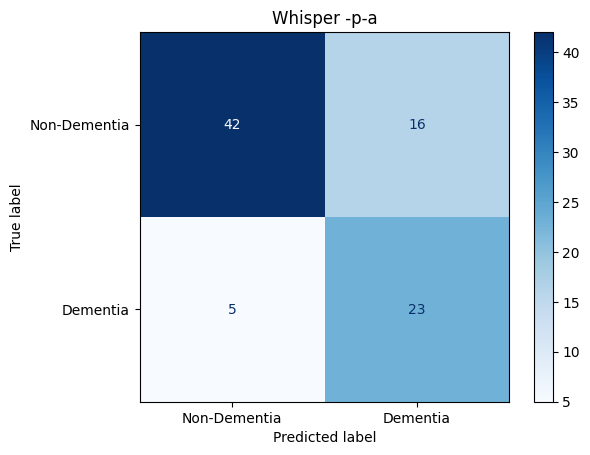

In [103]:
whisper_v2_15k_a_o_d_f_finalresult_df_result = whisper_v2_15k_a_o_d_f_finalresult_df['result']
whisper_v2_15k_a_o_d_f_finalresult_df_result2 = whisper_v2_15k_a_o_d_f_finalresult_df['result2']
whisper_v2_15k_a_o_d_f_finalresult_df_truth = whisper_v2_15k_a_o_d_f_finalresult_df['truth']
whisper_v2_15k_a_o_d_f_finalresult_df_hyps = whisper_v2_15k_a_o_d_f_finalresult_df['hyps']
whisper_v2_15k_a_o_d_f_finalresult_df_wrong = whisper_v2_15k_a_o_d_f_finalresult_df.iloc[np.where(whisper_v2_15k_a_o_d_f_finalresult_df['result'] != whisper_v2_15k_a_o_d_f_finalresult_df['truth'])]
print(whisper_v2_15k_a_o_d_f_finalresult_df_wrong)
clf_report  = classification_report(whisper_v2_15k_a_o_d_f_finalresult_df_truth, whisper_v2_15k_a_o_d_f_finalresult_df_result, target_names=target_names)
print(clf_report)
tn, fp, fn, tp = confusion_matrix(whisper_v2_15k_a_o_d_f_finalresult_df_truth, whisper_v2_15k_a_o_d_f_finalresult_df_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(whisper_v2_15k_a_o_d_f_finalresult_df_truth), np.array(whisper_v2_15k_a_o_d_f_finalresult_df_result), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(whisper_v2_15k_a_o_d_f_finalresult_df_truth, whisper_v2_15k_a_o_d_f_finalresult_df_hyps, whisper_v2_15k_a_o_d_f_finalresult_df_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

whisper_v2_15k_a_o_d_f_finalresult_df_wrong = whisper_v2_15k_a_o_d_f_finalresult_df.iloc[np.where(whisper_v2_15k_a_o_d_f_finalresult_df['result2'] != whisper_v2_15k_a_o_d_f_finalresult_df['truth'])]
print(whisper_v2_15k_a_o_d_f_finalresult_df_wrong)
clf_report  = classification_report(whisper_v2_15k_a_o_d_f_finalresult_df_truth, whisper_v2_15k_a_o_d_f_finalresult_df_result2, target_names=target_names)
print(clf_report)
tn, fp, fn, tp = confusion_matrix(whisper_v2_15k_a_o_d_f_finalresult_df_truth, whisper_v2_15k_a_o_d_f_finalresult_df_result2).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(whisper_v2_15k_a_o_d_f_finalresult_df_truth, whisper_v2_15k_a_o_d_f_finalresult_df_hyps, whisper_v2_15k_a_o_d_f_finalresult_df_result2)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in whisper_v2_15k_a_o_d_f_finalresult_df_truth]
y_pred = [bool(int(x)) for x in whisper_v2_15k_a_o_d_f_finalresult_df_result2]
labels = ['Non-Dementia', 'Dementia']
display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("Whisper -p-a")

### BERT

    name      hyps  truth  ifcorrect  result
0     15  0.876496    0.0      False       1
2     22  0.573017    0.0      False       1
5     35  0.115558    1.0      False       0
8     51  0.776765    0.0      False       1
20    37  0.204239    1.0      False       0
22    45  0.168981    1.0      False       0
35    18  0.208997    1.0      False       0
37    20  0.356137    1.0      False       0
39    32  0.131744    1.0      False       0
40    38  0.155587    1.0      False       0
44    57  0.018018    1.0      False       0
45    58  0.112744    1.0      False       0
53    12  0.317845    1.0      False       0
57     4  0.464498    1.0      False       0
60    63  0.273759    1.0      False       0
76    50  0.656038    0.0      False       1
77     5  0.245811    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.81      0.93      0.86        58
     patient       0.79      0.54      0.64        28

    accuracy              

Text(0.5, 1.0, 'BERT -p-c')

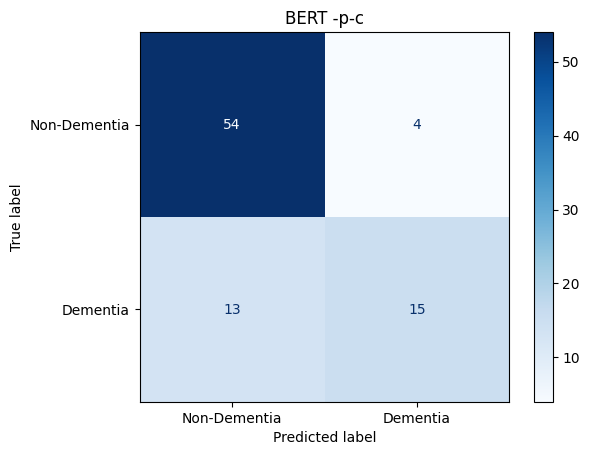

In [104]:
# with bert-v2-overlap-diarization
bert_v2_o_d_f = pd.read_csv('bert-v2-15k-o-d-final.csv')
bert_v2_o_d_f['result'] = np.where(bert_v2_o_d_f['hyps'] >= 0.5,1,0)
bert_v2_o_d_f_wrong = bert_v2_o_d_f.iloc[np.where(bert_v2_o_d_f['ifcorrect'] == False)]
print(bert_v2_o_d_f_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_o_d_f_result = bert_v2_o_d_f['result'].tolist()
bert_v2_o_d_f_hyps = bert_v2_o_d_f['hyps'].tolist()
bert_v2_o_d_f_truth = [int(i) for i in bert_v2_o_d_f['truth'].tolist()]
print(classification_report(bert_v2_o_d_f_truth, bert_v2_o_d_f_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_o_d_f_truth, bert_v2_o_d_f_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(bert_v2_o_d_f_truth[0:17]), np.array(bert_v2_o_d_f_hyps[0:17]), pos_label=1)
# auc1 = metrics.auc(fpr1, tpr1)
# fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(bert_v2_o_d_f_truth[17:35]), np.array(bert_v2_o_d_f_hyps[17:35]), pos_label=1)
# auc2 = metrics.auc(fpr2, tpr2)
# fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(bert_v2_o_d_f_truth[35:52]), np.array(bert_v2_o_d_f_hyps[35:52]), pos_label=1)
# auc3 = metrics.auc(fpr3, tpr3)
# fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(bert_v2_o_d_f_truth[52:69]), np.array(bert_v2_o_d_f_hyps[52:69]), pos_label=1)
# auc4 = metrics.auc(fpr4, tpr4)
# fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(bert_v2_o_d_f_truth[69:86]), np.array(bert_v2_o_d_f_hyps[69:86]), pos_label=1)
# auc5 = metrics.auc(fpr5, tpr5)
# print('AUC: ', auc1, auc2, auc3, auc4, auc5)
# print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(bert_v2_o_d_f_truth, bert_v2_o_d_f_hyps, bert_v2_o_d_f_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in bert_v2_o_d_f_truth]
y_pred = [bool(int(x)) for x in bert_v2_o_d_f_result]
labels = ['Non-Dementia', 'Dementia']
display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("BERT -p-c")

    name      hyps  truth  ifcorrect  result
0     15  0.652063    0.0      False       1
2     22  0.671705    0.0      False       1
5     35  0.073373    1.0      False       0
8     51  0.734261    0.0      False       1
20    37  0.066182    1.0      False       0
22    45  0.135068    1.0      False       0
24    65  0.364355    1.0      False       0
35    18  0.249115    1.0      False       0
37    20  0.484593    1.0      False       0
39    32  0.117592    1.0      False       0
40    38  0.150426    1.0      False       0
44    57  0.016662    1.0      False       0
45    58  0.079802    1.0      False       0
53    12  0.329825    1.0      False       0
57     4  0.311496    1.0      False       0
60    63  0.315967    1.0      False       0
69    10  0.416185    1.0      False       0
77     5  0.155806    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.79      0.95      0.86        58
     patient       0.81      0.46   

Text(0.5, 1.0, 'BERT -p-l')

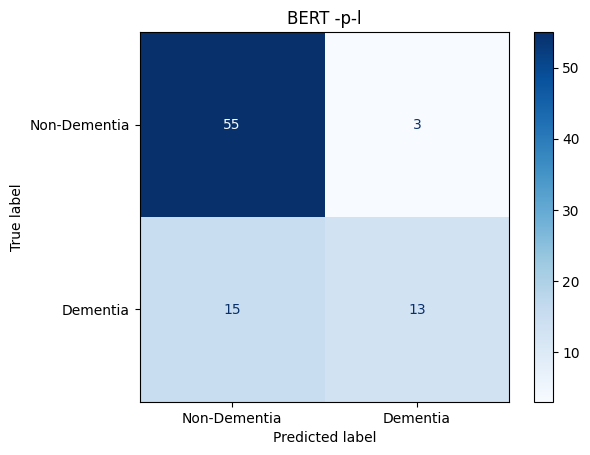

In [105]:
# with bert-v2-overlap-diarization
bert_v2_o_d_f_2 = pd.read_csv('bert-v2-15k-o-d-final-2.csv')
bert_v2_o_d_f_2['result'] = np.where(bert_v2_o_d_f_2['hyps'] >= 0.5,1,0)
bert_v2_o_d_f_2_wrong = bert_v2_o_d_f_2.iloc[np.where(bert_v2_o_d_f_2['ifcorrect'] == False)]
print(bert_v2_o_d_f_2_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_o_d_f_2_result = bert_v2_o_d_f_2['result'].tolist()
bert_v2_o_d_f_2_hyps = bert_v2_o_d_f_2['hyps'].tolist()
bert_v2_o_d_f_2_truth = [int(i) for i in bert_v2_o_d_f_2['truth'].tolist()]
print(classification_report(bert_v2_o_d_f_2_truth, bert_v2_o_d_f_2_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_o_d_f_2_truth, bert_v2_o_d_f_2_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(bert_v2_o_d_f_2_truth[0:17]), np.array(bert_v2_o_d_f_2_hyps[0:17]), pos_label=1)
# auc1 = metrics.auc(fpr1, tpr1)
# fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(bert_v2_o_d_f_2_truth[17:35]), np.array(bert_v2_o_d_f_2_hyps[17:35]), pos_label=1)
# auc2 = metrics.auc(fpr2, tpr2)
# fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(bert_v2_o_d_f_2_truth[35:52]), np.array(bert_v2_o_d_f_2_hyps[35:52]), pos_label=1)
# auc3 = metrics.auc(fpr3, tpr3)
# fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(bert_v2_o_d_f_2_truth[52:69]), np.array(bert_v2_o_d_f_2_hyps[52:69]), pos_label=1)
# auc4 = metrics.auc(fpr4, tpr4)
# fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(bert_v2_o_d_f_2_truth[69:86]), np.array(bert_v2_o_d_f_2_hyps[69:86]), pos_label=1)
# auc5 = metrics.auc(fpr5, tpr5)
# print('AUC: ', auc1, auc2, auc3, auc4, auc5)
# print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(bert_v2_o_d_f_2_truth, bert_v2_o_d_f_2_hyps, bert_v2_o_d_f_2_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in bert_v2_o_d_f_2_truth]
y_pred = [bool(int(x)) for x in bert_v2_o_d_f_2_result]
labels = ['Non-Dementia', 'Dementia']
display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("BERT -p-l")

    name      hyps  truth  ifcorrect  result
0     15  0.819207    0.0      False       1
1     16  0.474309    1.0      False       0
5     35  0.479098    1.0      False       0
18    25  0.198981    1.0      False       0
20    37  0.259456    1.0      False       0
22    45  0.241653    1.0      False       0
24    65  0.421325    1.0      False       0
26    68  0.954899    0.0      False       1
35    18  0.217733    1.0      False       0
37    20  0.387569    1.0      False       0
39    32  0.124596    1.0      False       0
40    38  0.493074    1.0      False       0
44    57  0.021243    1.0      False       0
45    58  0.193560    1.0      False       0
60    63  0.285675    1.0      False       0
69    10  0.304850    1.0      False       0
73    31  0.463993    1.0      False       0
77     5  0.493262    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.78      0.97      0.86        58
     patient       0.86      0.43   

Text(0.5, 1.0, 'BERT -r-l')

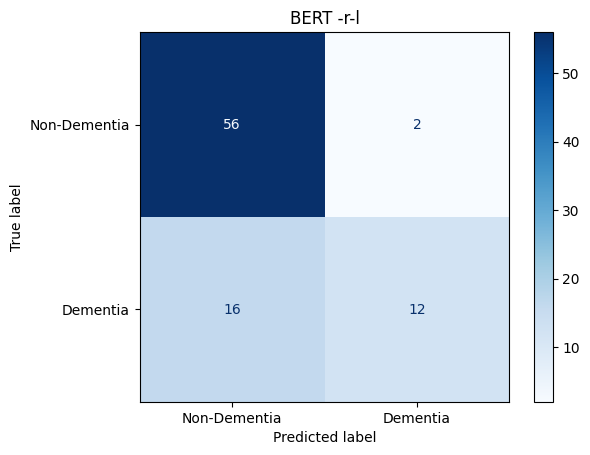

In [106]:
# with bert-v2-overlap-diarization
bert_v2_r_f = pd.read_csv('bert-v2-15k-r-final.csv')
bert_v2_r_f['result'] = np.where(bert_v2_r_f['hyps'] >= 0.5,1,0)
bbert_v2_r_f_wrong = bert_v2_r_f.iloc[np.where(bert_v2_r_f['ifcorrect'] == False)]
print(bbert_v2_r_f_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_r_f_result = bert_v2_r_f['result'].tolist()
bert_v2_r_f_hyps = bert_v2_r_f['hyps'].tolist()
bert_v2_r_f_truth = [int(i) for i in bert_v2_r_f['truth'].tolist()]
print(classification_report(bert_v2_r_f_truth, bert_v2_r_f_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_r_f_truth, bert_v2_r_f_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(bert_v2_r_f_truth[0:17]), np.array(bert_v2_r_f_hyps[0:17]), pos_label=1)
# auc1 = metrics.auc(fpr1, tpr1)
# fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(bert_v2_r_f_truth[17:35]), np.array(bert_v2_r_f_hyps[17:35]), pos_label=1)
# auc2 = metrics.auc(fpr2, tpr2)
# fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(bert_v2_r_f_truth[35:52]), np.array(bert_v2_r_f_hyps[35:52]), pos_label=1)
# auc3 = metrics.auc(fpr3, tpr3)
# fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(bert_v2_r_f_truth[52:69]), np.array(bert_v2_r_f_hyps[52:69]), pos_label=1)
# auc4 = metrics.auc(fpr4, tpr4)
# fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(bert_v2_r_f_truth[69:86]), np.array(bert_v2_r_f_hyps[69:86]), pos_label=1)
# auc5 = metrics.auc(fpr5, tpr5)
# print('AUC: ', auc1, auc2, auc3, auc4, auc5)
# print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(bert_v2_r_f_truth, bert_v2_r_f_hyps, bert_v2_r_f_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in bert_v2_r_f_truth]
y_pred = [bool(int(x)) for x in bert_v2_r_f_result]
labels = ['Non-Dementia', 'Dementia']
display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("BERT -r-l")

    name      hyps  truth  ifcorrect  result
0     15  0.889520    0.0      False       1
1     16  0.363114    1.0      False       0
3     28  0.253388    1.0      False       0
5     35  0.327576    1.0      False       0
8     51  0.606602    0.0      False       1
18    25  0.291828    1.0      False       0
20    37  0.252125    1.0      False       0
22    45  0.244468    1.0      False       0
24    65  0.369266    1.0      False       0
26    68  0.698792    0.0      False       1
27    71  0.579901    0.0      False       1
35    18  0.167421    1.0      False       0
37    20  0.202466    1.0      False       0
39    32  0.136764    1.0      False       0
44    57  0.011964    1.0      False       0
45    58  0.309913    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.82      0.93      0.87        58
     patient       0.80      0.57      0.67        28

    accuracy                           0.81        86
   macro avg     

Text(0.5, 1.0, 'BERT -r-c')

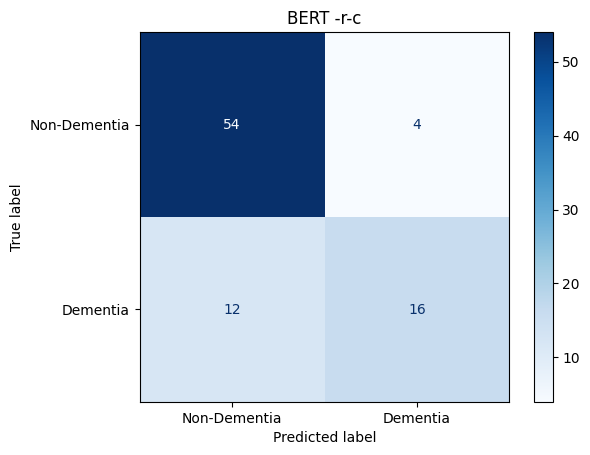

In [107]:
# with bert-v2-overlap-diarization
bert_v2_r_f_2 = pd.read_csv('bert-v2-15k-r-final-2.csv')
bert_v2_r_f_2['result'] = np.where(bert_v2_r_f_2['hyps'] >= 0.5,1,0)
bert_v2_r_f_2_wrong = bert_v2_r_f_2.iloc[np.where(bert_v2_r_f_2['ifcorrect'] == False)]
print(bert_v2_r_f_2_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_r_f_2_result = bert_v2_r_f_2['result'].tolist()
bert_v2_r_f_2_hyps = bert_v2_r_f_2['hyps'].tolist()
bert_v2_r_f_2_truth = [int(i) for i in bert_v2_r_f_2['truth'].tolist()]
print(classification_report(bert_v2_r_f_2_truth, bert_v2_r_f_2_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_r_f_2_truth, bert_v2_r_f_2_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(bert_v2_r_f_2_truth[0:17]), np.array(bert_v2_r_f_2_hyps[0:17]), pos_label=1)
# auc1 = metrics.auc(fpr1, tpr1)
# fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(bert_v2_r_f_2_truth[17:35]), np.array(bert_v2_r_f_2_hyps[17:35]), pos_label=1)
# auc2 = metrics.auc(fpr2, tpr2)
# fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(bert_v2_r_f_2_truth[35:52]), np.array(bert_v2_r_f_2_hyps[35:52]), pos_label=1)
# auc3 = metrics.auc(fpr3, tpr3)
# fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(bert_v2_r_f_2_truth[52:69]), np.array(bert_v2_r_f_2_hyps[52:69]), pos_label=1)
# auc4 = metrics.auc(fpr4, tpr4)
# fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(bert_v2_r_f_2_truth[69:86]), np.array(bert_v2_r_f_2_hyps[69:86]), pos_label=1)
# auc5 = metrics.auc(fpr5, tpr5)
# print('AUC: ', auc1, auc2, auc3, auc4, auc5)
# print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(bert_v2_r_f_2_truth, bert_v2_r_f_2_hyps, bert_v2_r_f_2_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in bert_v2_r_f_2_truth]
y_pred = [bool(int(x)) for x in bert_v2_r_f_2_result]
labels = ['Non-Dementia', 'Dementia']
display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("BERT -r-c")

### combine-hyps

#### 1, 2, 3

        hyps  truth  result  ifcorrect
0   0.590999      0       1      False
5   0.307349      1       0      False
8   0.708421      0       1      False
20  0.268152      1       0      False
22  0.258411      1       0      False
26  0.590341      0       1      False
35  0.243721      1       0      False
37  0.411684      1       0      False
39  0.193360      1       0      False
40  0.474018      1       0      False
44  0.072531      1       0      False
55  0.608159      0       1      False
75  0.672244      0       1      False
77  0.477518      1       0      False
79  0.582030      0       1      False
              precision    recall  f1-score   support

 non-patient       0.85      0.90      0.87        58
     patient       0.76      0.68      0.72        28

    accuracy                           0.83        86
   macro avg       0.81      0.79      0.80        86
weighted avg       0.82      0.83      0.82        86

sensitivity:  0.6785714285714286
specificity:  0.

Text(0.5, 1.0, 'w & b & c')

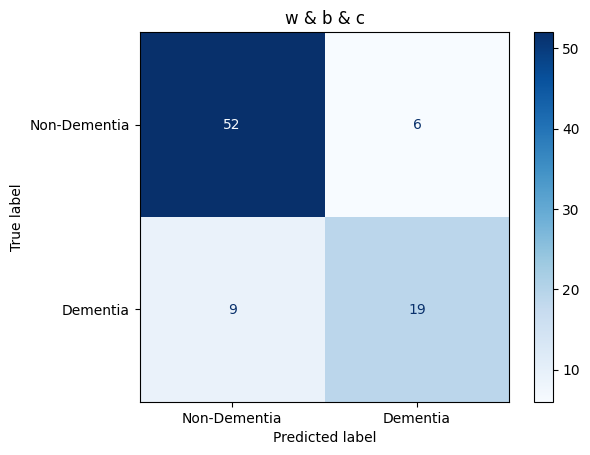

In [108]:
# for 1, 2, 3
whisper_v2_15k = pd.read_csv('whisper-v2-15k-r-a-final-fix.csv')
bert_v2_15k = pd.read_csv('bert-v2-15k-r-final-2.csv')
llama_v2 = pd.read_csv('gpt-v2-o-d-final.csv')

w_w = 0.80
b_w = 0.80
l_w = 0.81

weighted = w_w + b_w + l_w
combine = pd.DataFrame()
combine['hyps'] = whisper_v2_15k['hyps']*w_w/weighted + bert_v2_15k['hyps']*b_w/weighted + llama_v2['hyps']*l_w/weighted
# combine['hyps'] = (whisper_v2_15k['hyps'] + bert_v2_15k['hyps'] + llama_v2['hyps']) / 3
combine['truth'] = whisper_v2_15k['truth'].astype(int)
combine['result'] = np.where(combine['hyps'] >= 0.5,1,0)
combine['ifcorrect'] = combine['result'] == combine['truth']
# combine
combine_wrong = combine.iloc[np.where(combine['ifcorrect'] == False)]
print(combine_wrong)
# print(fivefolds_with10separate_10k.head(20))
combine_result = combine['result'].tolist()
combine_hyps = combine['hyps'].tolist()
combine_truth = [int(i) for i in combine['truth'].tolist()]
print(classification_report(combine_truth, combine_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(combine_truth, combine_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth), np.array(fivefolds_bert_v2_15k_mean4_hyps), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))
# fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(combine_truth[0:19]), np.array(combine_hyps[0:19]), pos_label=1)
# auc1 = metrics.auc(fpr1, tpr1)
# fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(combine_truth[19:37]), np.array(combine_hyps[19:37]), pos_label=1)
# auc2 = metrics.auc(fpr2, tpr2)
# fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(combine_truth[37:54]), np.array(combine_hyps[37:54]), pos_label=1)
# auc3 = metrics.auc(fpr3, tpr3)
# fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(combine_truth[54:71]), np.array(combine_hyps[54:71]), pos_label=1)
# auc4 = metrics.auc(fpr4, tpr4)
# fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(combine_truth[71:88]), np.array(combine_hyps[71:88]), pos_label=1)
# auc5 = metrics.auc(fpr5, tpr5)
# print('AUC: ', auc1, auc2, auc3, auc4, auc5)
# print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(combine_truth, combine_hyps, combine_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in combine_truth]
y_pred = [bool(int(x)) for x in combine_result]
labels = ['Non-Dementia', 'Dementia']
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("w & b & c")

#### 1, 2

        hyps  truth  result  ifcorrect
0   0.660012      0       1      False
5   0.330934      1       0      False
8   0.731753      0       1      False
18  0.431989      1       0      False
20  0.280747      1       0      False
22  0.266200      1       0      False
26  0.766469      0       1      False
35  0.303680      1       0      False
37  0.459121      1       0      False
39  0.186346      1       0      False
44  0.034800      1       0      False
69  0.474226      1       0      False
75  0.506320      0       1      False
83  0.554546      0       1      False
              precision    recall  f1-score   support

 non-patient       0.85      0.91      0.88        58
     patient       0.79      0.68      0.73        28

    accuracy                           0.84        86
   macro avg       0.82      0.80      0.81        86
weighted avg       0.83      0.84      0.83        86

sensitivity:  0.6785714285714286
specificity:  0.9137931034482759
F1 Scores: [0.66666666

Text(0.5, 1.0, 'w & b')

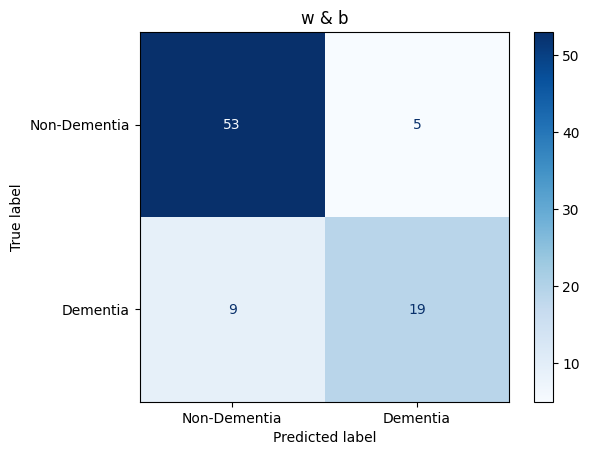

In [109]:
# for 1, 2
whisper_v2_15k = pd.read_csv('whisper-v2-15k-r-a-final-fix.csv')
bert_v2_15k = pd.read_csv('bert-v2-15k-r-final-2.csv')
llama_v2 = pd.read_csv('gpt-v2-o-d-final.csv')

w_w = 0.80
b_w = 0.80
l_w = 0.81

weighted = w_w + b_w 
combine = pd.DataFrame()
combine['hyps'] = whisper_v2_15k['hyps']*w_w/weighted + bert_v2_15k['hyps']*b_w/weighted
# combine['hyps'] = (whisper_v2_15k['hyps'] + bert_v2_15k['hyps']) / 2
combine['truth'] = whisper_v2_15k['truth'].astype(int)
combine['result'] = np.where(combine['hyps'] >= 0.5,1,0)
combine['ifcorrect'] = combine['result'] == combine['truth']
# combine
combine_wrong = combine.iloc[np.where(combine['ifcorrect'] == False)]
print(combine_wrong)
# print(fivefolds_with10separate_10k.head(20))
combine_result = combine['result'].tolist()
combine_hyps = combine['hyps'].tolist()
combine_truth = [int(i) for i in combine['truth'].tolist()]
print(classification_report(combine_truth, combine_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(combine_truth, combine_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# # fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth), np.array(fivefolds_bert_v2_15k_mean4_hyps), pos_label=1)
# # print('AUC: ',metrics.auc(fpr, tpr))
# fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(combine_truth[0:19]), np.array(combine_hyps[0:19]), pos_label=1)
# auc1 = metrics.auc(fpr1, tpr1)
# fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(combine_truth[19:37]), np.array(combine_hyps[19:37]), pos_label=1)
# auc2 = metrics.auc(fpr2, tpr2)
# fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(combine_truth[37:54]), np.array(combine_hyps[37:54]), pos_label=1)
# auc3 = metrics.auc(fpr3, tpr3)
# fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(combine_truth[54:71]), np.array(combine_hyps[54:71]), pos_label=1)
# auc4 = metrics.auc(fpr4, tpr4)
# fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(combine_truth[71:88]), np.array(combine_hyps[71:88]), pos_label=1)
# auc5 = metrics.auc(fpr5, tpr5)
# print('AUC: ', auc1, auc2, auc3, auc4, auc5)
# print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(combine_truth, combine_hyps, combine_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in combine_truth]
y_pred = [bool(int(x)) for x in combine_result]
labels = ['Non-Dementia', 'Dementia']
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("w & b")

#### 2, 3

        hyps  truth  result  ifcorrect
0   0.670748      0       1      False
3   0.354485      1       0      False
5   0.293961      1       0      False
8   0.634640      0       1      False
19  0.506100      0       1      False
20  0.247671      1       0      False
22  0.243742      1       0      False
24  0.429517      1       0      False
35  0.146222      1       0      False
37  0.260582      1       0      False
39  0.172208      1       0      False
40  0.418999      1       0      False
44  0.079932      1       0      False
45  0.313920      1       0      False
53  0.481473      1       0      False
55  0.591834      0       1      False
75  0.706944      0       1      False
77  0.294213      1       0      False
78  0.341130      1       0      False
80  0.505041      0       1      False
              precision    recall  f1-score   support

 non-patient       0.79      0.90      0.84        58
     patient       0.70      0.50      0.58        28

    accuracy     

Text(0.5, 1.0, 'b & c')

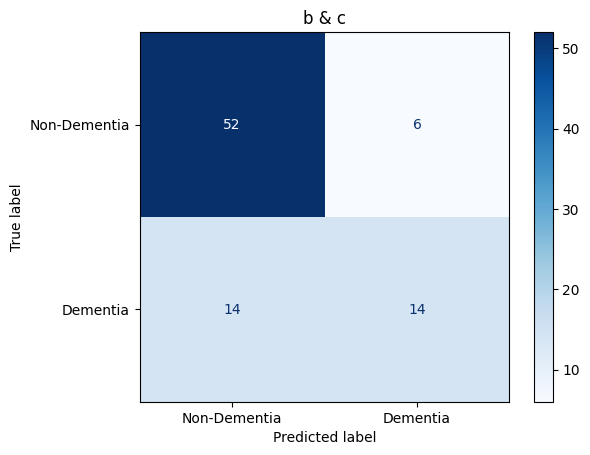

In [110]:
# for 2, 3
whisper_v2_15k = pd.read_csv('whisper-v2-15k-r-a-final-fix.csv')
bert_v2_15k = pd.read_csv('bert-v2-15k-r-final-2.csv')
llama_v2 = pd.read_csv('gpt-v2-o-d-final.csv')

w_w = 0.80
b_w = 0.80
l_w = 0.81

weighted = b_w + l_w
combine = pd.DataFrame()
combine['hyps'] = bert_v2_15k['hyps']*b_w/weighted + llama_v2['hyps']*l_w/weighted
# combine['hyps'] = (bert_v2_15k['hyps'] + llama_v2['hyps']) / 2
combine['truth'] = whisper_v2_15k['truth'].astype(int)
combine['result'] = np.where(combine['hyps'] >= 0.5,1,0)
combine['ifcorrect'] = combine['result'] == combine['truth']
# combine
combine_wrong = combine.iloc[np.where(combine['ifcorrect'] == False)]
print(combine_wrong)
# print(fivefolds_with10separate_10k.head(20))
combine_result = combine['result'].tolist()
combine_hyps = combine['hyps'].tolist()
combine_truth = [int(i) for i in combine['truth'].tolist()]
print(classification_report(combine_truth, combine_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(combine_truth, combine_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# # fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth), np.array(fivefolds_bert_v2_15k_mean4_hyps), pos_label=1)
# # print('AUC: ',metrics.auc(fpr, tpr))
# fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(combine_truth[0:19]), np.array(combine_hyps[0:19]), pos_label=1)
# auc1 = metrics.auc(fpr1, tpr1)
# fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(combine_truth[19:37]), np.array(combine_hyps[19:37]), pos_label=1)
# auc2 = metrics.auc(fpr2, tpr2)
# fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(combine_truth[37:54]), np.array(combine_hyps[37:54]), pos_label=1)
# auc3 = metrics.auc(fpr3, tpr3)
# fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(combine_truth[54:71]), np.array(combine_hyps[54:71]), pos_label=1)
# auc4 = metrics.auc(fpr4, tpr4)
# fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(combine_truth[71:88]), np.array(combine_hyps[71:88]), pos_label=1)
# auc5 = metrics.auc(fpr5, tpr5)
# print('AUC: ', auc1, auc2, auc3, auc4, auc5)
# print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(combine_truth, combine_hyps, combine_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in combine_truth]
y_pred = [bool(int(x)) for x in combine_result]
labels = ['Non-Dementia', 'Dementia']
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("b & c")

#### 1, 3

        hyps  truth  result  ifcorrect
5   0.297298      1       0      False
6   0.474309      1       0      False
8   0.759014      0       1      False
19  0.615132      0       1      False
20  0.276115      1       0      False
22  0.265339      1       0      False
26  0.536453      0       1      False
35  0.281634      1       0      False
39  0.221481      1       0      False
40  0.430661      1       0      False
44  0.102626      1       0      False
55  0.810266      0       1      False
62  0.534127      0       1      False
68  0.444990      1       0      False
75  0.802438      0       1      False
77  0.436428      1       0      False
78  0.428688      1       0      False
79  0.846978      0       1      False
80  0.707242      0       1      False
83  0.509182      0       1      False
              precision    recall  f1-score   support

 non-patient       0.82      0.84      0.83        58
     patient       0.65      0.61      0.63        28

    accuracy     

Text(0.5, 1.0, 'w & c')

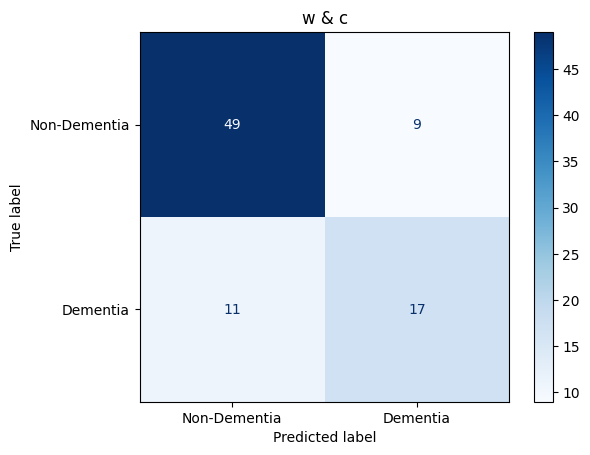

In [111]:
# for 1, 3
whisper_v2_15k = pd.read_csv('whisper-v2-15k-r-a-final-fix.csv')
bert_v2_15k = pd.read_csv('bert-v2-15k-r-final-2.csv')
llama_v2 = pd.read_csv('gpt-v2-o-d-final.csv')

w_w = 0.80
b_w = 0.80
l_w = 0.81

weighted = w_w + l_w
combine = pd.DataFrame()
combine['hyps'] = whisper_v2_15k['hyps']*w_w/weighted + llama_v2['hyps']*l_w/weighted
# combine['hyps'] = (whisper_v2_15k['hyps'] + llama_v2['hyps']) / 2
combine['truth'] = whisper_v2_15k['truth'].astype(int)
combine['result'] = np.where(combine['hyps'] >= 0.5,1,0)
combine['ifcorrect'] = combine['result'] == combine['truth']
# combine
combine_wrong = combine.iloc[np.where(combine['ifcorrect'] == False)]
print(combine_wrong)
# print(fivefolds_with10separate_10k.head(20))
combine_result = combine['result'].tolist()
combine_hyps = combine['hyps'].tolist()
combine_truth = [int(i) for i in combine['truth'].tolist()]
print(classification_report(combine_truth, combine_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(combine_truth, combine_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# # fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth), np.array(fivefolds_bert_v2_15k_mean4_hyps), pos_label=1)
# # print('AUC: ',metrics.auc(fpr, tpr))
# fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(combine_truth[0:19]), np.array(combine_hyps[0:19]), pos_label=1)
# auc1 = metrics.auc(fpr1, tpr1)
# fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(combine_truth[19:37]), np.array(combine_hyps[19:37]), pos_label=1)
# auc2 = metrics.auc(fpr2, tpr2)
# fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(combine_truth[37:54]), np.array(combine_hyps[37:54]), pos_label=1)
# auc3 = metrics.auc(fpr3, tpr3)
# fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(combine_truth[54:71]), np.array(combine_hyps[54:71]), pos_label=1)
# auc4 = metrics.auc(fpr4, tpr4)
# fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(combine_truth[71:88]), np.array(combine_truth[71:88]), pos_label=1)
# auc5 = metrics.auc(fpr5, tpr5)
# print('AUC: ', auc1, auc2, auc3, auc4, auc5)
# print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(combine_truth, combine_hyps, combine_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in combine_truth]
y_pred = [bool(int(x)) for x in combine_result]
labels = ['Non-Dementia', 'Dementia']
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("w & c")

### combine-hidden

In [112]:
whisper_v2_15k_a_o_d_f = pd.read_csv('combine-v2-15k-a-o-d-final.csv')
print(whisper_v2_15k_a_o_d_f)
result = np.where(whisper_v2_15k_a_o_d_f['hyps'] >= 0.5,1,0)
name = whisper_v2_15k_a_o_d_f['name'].values.tolist()
truth = whisper_v2_15k_a_o_d_f['truth'].values.tolist()
allresult = np.full([100, 105], np.nan)
major = np.zeros([100, 3])
majorvote = np.zeros([100, 3])
correct = 0

for i in range(len(name)):
    
    print(name[i])
    file = int(name[i].split('\\')[-1].split('C')[0])
    idx = int(name[i].split('\\')[-1].split('_')[1].split('.')[0])
    allresult[file-1][0] = file
    allresult[file-1][idx] = result[i]
    major[file-1][int(result[i])] += 1
    major[file-1][2] = truth[i]

for i in range(len(major)):
    if(i != 19 and i != 33 and i != 23 and i != 26 and i != 27 and i != 36 and i != 41 and i != 48 and i != 49 and i != 59 and i != 60 and i != 61 and i != 62 and i != 66):
        majorvote[i][0] = i+1
        majorvote[i][1] = 0 if (major[i][0] >= major[i][1]) else 1
        majorvote[i][2] = major[i][2]
        if(majorvote[i][1] == majorvote[i][2]): 
            correct += 1

print(correct, 86, correct/86)
whisper_v2_15k_a_o_d_f_allresult_df = pd.DataFrame(allresult)
whisper_v2_15k_a_o_d_f_allresult_df.to_csv(f'whisper-with10separate_allresult.csv', index=False) 
whisper_v2_15k_a_o_d_f_finalresult_df = pd.DataFrame(majorvote, columns=['name', 'result', 'truth'])
whisper_v2_15k_a_o_d_f_finalresult_df.to_csv(f'whisper-with10separate_finalresult.csv', index=False) 
print(whisper_v2_15k_a_o_d_f_finalresult_df)
whisper_v2_15k_a_o_d_f_finalresult_df = whisper_v2_15k_a_o_d_f_finalresult_df.drop(['name'], axis=1)
whisper_v2_15k_a_o_d_f_finalresult_df = whisper_v2_15k_a_o_d_f_finalresult_df.drop([22, 25, 26, 35, 40, 47, 48, 58, 59, 60, 61, 65], axis=0)
print(whisper_v2_15k_a_o_d_f_finalresult_df)

                                   name      hyps  truth  ifcorrect
0    data_process\CTT5-1-14\15CTT_1.wav  0.643487    0.0      False
1    data_process\CTT5-1-14\15CTT_2.wav  0.655636    0.0      False
2    data_process\CTT5-1-14\16CTT_1.wav  0.833586    1.0       True
3    data_process\CTT5-1-14\22CTT_1.wav  0.260106    0.0       True
4    data_process\CTT5-1-14\28CTT_1.wav  0.602095    1.0       True
..                                  ...       ...    ...        ...
139  data_process\CTT5-5-14\79CTT_1.wav  0.305705    0.0       True
140  data_process\CTT5-5-14\79CTT_2.wav  0.655051    0.0      False
141   data_process\CTT5-5-14\8CTT_1.wav  0.416046    0.0       True
142  data_process\CTT5-5-14\90CTT_1.wav  0.451636    0.0       True
143  data_process\CTT5-5-14\95CTT_1.wav  0.331034    0.0       True

[144 rows x 4 columns]
data_process\CTT5-1-14\15CTT_1.wav
data_process\CTT5-1-14\15CTT_2.wav
data_process\CTT5-1-14\16CTT_1.wav
data_process\CTT5-1-14\22CTT_1.wav
data_process\CTT5-1-

    result  truth
4      0.0    1.0
9      0.0    1.0
12     1.0    0.0
14     1.0    0.0
20     1.0    0.0
34     0.0    1.0
38     0.0    1.0
39     0.0    1.0
46     1.0    0.0
50     1.0    0.0
51     1.0    0.0
56     0.0    1.0
57     0.0    1.0
68     1.0    0.0
80     1.0    0.0
82     1.0    0.0
84     1.0    0.0
87     1.0    0.0
              precision    recall  f1-score   support

 non-patient       0.89      0.83      0.86        66
     patient       0.58      0.68      0.62        22

    accuracy                           0.80        88
   macro avg       0.73      0.76      0.74        88
weighted avg       0.81      0.80      0.80        88

sensitivity:  0.6818181818181818
specificity:  0.8333333333333334
AUC:  0.7575757575757575


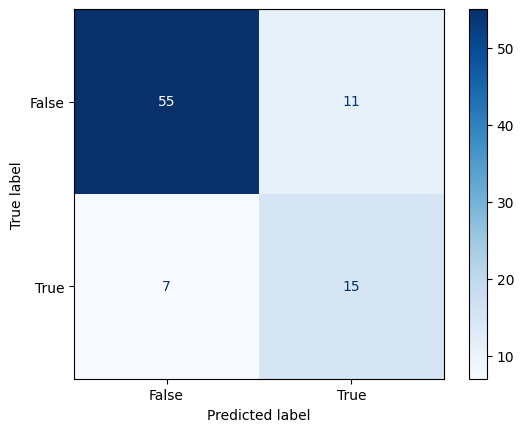

In [113]:
whisper_v2_15k_a_o_d_f_finalresult_df_result = whisper_v2_15k_a_o_d_f_finalresult_df['result']
whisper_v2_15k_a_o_d_f_finalresult_df_truth = whisper_v2_15k_a_o_d_f_finalresult_df['truth']
whisper_v2_15k_a_o_d_f_finalresult_df_wrong = whisper_v2_15k_a_o_d_f_finalresult_df.iloc[np.where(whisper_v2_15k_a_o_d_f_finalresult_df['result'] != whisper_v2_15k_a_o_d_f_finalresult_df['truth'])]
print(whisper_v2_15k_a_o_d_f_finalresult_df_wrong)
clf_report  = classification_report(whisper_v2_15k_a_o_d_f_finalresult_df_truth, whisper_v2_15k_a_o_d_f_finalresult_df_result, target_names=target_names)
print(clf_report)
tn, fp, fn, tp = confusion_matrix(whisper_v2_15k_a_o_d_f_finalresult_df_truth, whisper_v2_15k_a_o_d_f_finalresult_df_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))
fpr, tpr, thresholds = metrics.roc_curve(np.array(whisper_v2_15k_a_o_d_f_finalresult_df_truth), np.array(whisper_v2_15k_a_o_d_f_finalresult_df_result), pos_label=1)
print('AUC: ',metrics.auc(fpr, tpr))

y_test = [bool(int(x)) for x in whisper_v2_15k_a_o_d_f_finalresult_df_truth]
y_pred = [bool(int(x)) for x in whisper_v2_15k_a_o_d_f_finalresult_df_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

                                name      hyps  truth  ifcorrect  result
5   data_process\CTT5-1-16\35CTT.wav  0.377349    1.0      False       0
8   data_process\CTT5-1-16\51CTT.wav  0.894176    0.0      False       1
14  data_process\CTT5-1-16\85CTT.wav  0.759525    0.0      False       1
20  data_process\CTT5-2-16\37CTT.wav  0.478172    1.0      False       0
25  data_process\CTT5-2-16\67CTT.wav  0.379216    1.0      False       0
26  data_process\CTT5-2-16\68CTT.wav  0.929645    0.0      False       1
27  data_process\CTT5-2-16\71CTT.wav  0.508584    0.0      False       1
35  data_process\CTT5-3-16\18CTT.wav  0.465066    1.0      False       0
39  data_process\CTT5-3-16\32CTT.wav  0.193808    1.0      False       0
43  data_process\CTT5-3-16\52CTT.wav  0.574709    0.0      False       1
44  data_process\CTT5-3-16\57CTT.wav  0.073305    1.0      False       0
55  data_process\CTT5-4-16\21CTT.wav  0.601158    0.0      False       1
74  data_process\CTT5-5-16\44CTT.wav  0.734404    0

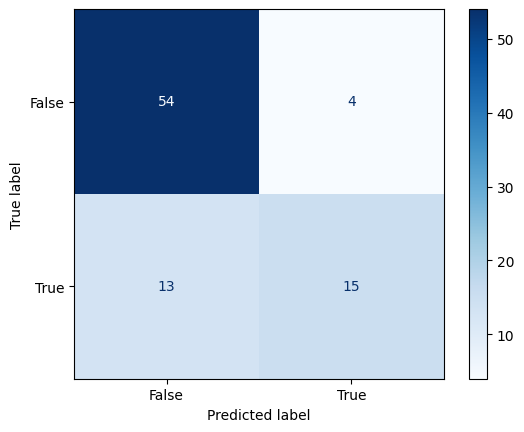

In [114]:
# with bert-v2-overlap-diarization
combine_v2_15k = pd.read_csv('combine-v2-15k-r-a-final.csv')
combine_v2_15k['result'] = np.where(combine_v2_15k['hyps'] >= 0.5,1,0)
combine_v2_15k_wrong = combine_v2_15k.iloc[np.where(combine_v2_15k['ifcorrect'] == False)]
print(combine_v2_15k_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
combine_v2_15k_result = bert_v2_o_d_f['result'].tolist()
combine_v2_15k_hyps = bert_v2_o_d_f['hyps'].tolist()
combine_v2_15k_truth = [int(i) for i in bert_v2_o_d_f['truth'].tolist()]
print(classification_report(combine_v2_15k_truth, combine_v2_15k_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(combine_v2_15k_truth, combine_v2_15k_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(combine_v2_15k_truth[0:17]), np.array(combine_v2_15k_hyps[0:17]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(combine_v2_15k_truth[17:35]), np.array(combine_v2_15k_hyps[17:35]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(combine_v2_15k_truth[35:52]), np.array(combine_v2_15k_hyps[35:52]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(combine_v2_15k_truth[52:69]), np.array(combine_v2_15k_hyps[52:69]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(combine_v2_15k_truth[69:86]), np.array(combine_v2_15k_hyps[69:86]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in combine_v2_15k_truth]
y_pred = [bool(int(x)) for x in combine_v2_15k_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

                                name      hyps  truth  ifcorrect  result
5   data_process\CTT5-1-16\35CTT.wav  0.258590    1.0      False       0
8   data_process\CTT5-1-16\51CTT.wav  0.844637    0.0      False       1
14  data_process\CTT5-1-16\85CTT.wav  0.530815    0.0      False       1
20  data_process\CTT5-2-16\37CTT.wav  0.236212    1.0      False       0
22  data_process\CTT5-2-16\45CTT.wav  0.188232    1.0      False       0
23  data_process\CTT5-2-16\46CTT.wav  0.333164    1.0      False       0
25  data_process\CTT5-2-16\67CTT.wav  0.283834    1.0      False       0
26  data_process\CTT5-2-16\68CTT.wav  0.613888    0.0      False       1
35  data_process\CTT5-3-16\18CTT.wav  0.153221    1.0      False       0
37  data_process\CTT5-3-16\20CTT.wav  0.378406    1.0      False       0
39  data_process\CTT5-3-16\32CTT.wav  0.120820    1.0      False       0
40  data_process\CTT5-3-16\38CTT.wav  0.293698    1.0      False       0
44  data_process\CTT5-3-16\57CTT.wav  0.039367    1

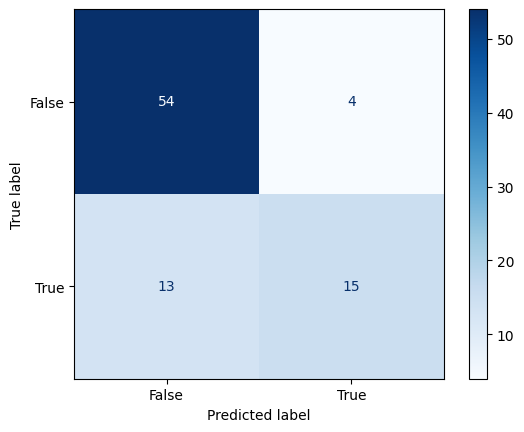

In [115]:
# with bert-v2-overlap-diarization
combine_v2_15k = pd.read_csv('combine-v2-15k.csv')
combine_v2_15k['result'] = np.where(combine_v2_15k['hyps'] >= 0.5,1,0)
combine_v2_15k_wrong = combine_v2_15k.iloc[np.where(combine_v2_15k['ifcorrect'] == False)]
print(combine_v2_15k_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
combine_v2_15k_result = bert_v2_o_d_f['result'].tolist()
combine_v2_15k_hyps = bert_v2_o_d_f['hyps'].tolist()
combine_v2_15k_truth = [int(i) for i in bert_v2_o_d_f['truth'].tolist()]
print(classification_report(combine_v2_15k_truth, combine_v2_15k_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(combine_v2_15k_truth, combine_v2_15k_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(combine_v2_15k_truth[0:17]), np.array(combine_v2_15k_hyps[0:17]), pos_label=1)
auc1 = metrics.auc(fpr1, tpr1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(combine_v2_15k_truth[17:35]), np.array(combine_v2_15k_hyps[17:35]), pos_label=1)
auc2 = metrics.auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(combine_v2_15k_truth[35:52]), np.array(combine_v2_15k_hyps[35:52]), pos_label=1)
auc3 = metrics.auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(combine_v2_15k_truth[52:69]), np.array(combine_v2_15k_hyps[52:69]), pos_label=1)
auc4 = metrics.auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(combine_v2_15k_truth[69:86]), np.array(combine_v2_15k_hyps[69:86]), pos_label=1)
auc5 = metrics.auc(fpr5, tpr5)
print('AUC: ', auc1, auc2, auc3, auc4, auc5)
print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

y_test = [bool(int(x)) for x in combine_v2_15k_truth]
y_pred = [bool(int(x)) for x in combine_v2_15k_result]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

### validation

#### whisper

In [116]:
whisper_v2_15k_a_o_d_f = pd.read_csv('whisper-v2-15k-a-o-d-final-all.csv')
print(whisper_v2_15k_a_o_d_f)
result = np.where(whisper_v2_15k_a_o_d_f['hyps'] >= 0.5,1,0)
name = whisper_v2_15k_a_o_d_f['name'].values.tolist()
truth = whisper_v2_15k_a_o_d_f['truth'].values.tolist()
hyps = whisper_v2_15k_a_o_d_f['hyps'].values.tolist()
allresult = np.full([67, 105], np.nan)
major = np.zeros([67, 4])
majorvote = np.zeros([67, 5])
correct = 0
fold = []
prevfile = 0
previdx = 0

for folds in range(5): 
    correct = 0
    for i in range(581*folds, 581*(folds+1)):
        file = int(name[i].split('\\')[-1].split('C')[0].split('_')[0])
        idx = int(name[i].split('\\')[-1].split('_')[1].split('.')[0])
        allresult[file-1][0] = file
        allresult[file-1][idx] = result[i]
        major[file-1][int(result[i])] += 1
        major[file-1][2] = truth[i]
        major[file-1][3] += hyps[i]
        # print(file, prevfile, previdx, major[prevfile-1][3], i, hyps[i])
        if(file != prevfile and prevfile != 0):
            fold.append(file)
            major[prevfile-1][3] /= previdx
            previdx = 0
            # print(major[prevfile-1][3])
        prevfile = file
        previdx += 1
    major[prevfile-1][3] /= previdx
    # print(major)
    for i in range(len(major)):
        if(i != 1-1 and i != 14-1 and i != 17-1 and i != 22-1 and i !=28-1 and i != 31-1 and i != 33-1 and i != 36-1 and i != 40-1 and i != 42-1 and i != 43-1 and i != 47-1 and i != 51-1 and i != 53-1 and i != 60-1 and i != 62-1 and i != 67-1):
            majorvote[i][0] = i+1
            majorvote[i][1] = 0 if (major[i][0] >= major[i][1]) else 1
            majorvote[i][2] = major[i][2]
            majorvote[i][3] = major[i][3]
            majorvote[i][4] = 1 if (major[i][3] >= 0.5) else 0
            if(majorvote[i][1] == majorvote[i][2]): 
                correct += 1

    print(correct, 50, correct/50)
    whisper_v2_15k_a_o_d_f_allresult_df = pd.DataFrame(allresult)
    # whisper_v2_15k_a_o_d_f_allresult_df.to_csv(f'whisper-with10separate_allresult.csv', index=False) 
    whisper_v2_15k_a_o_d_f_finalresult_df = pd.DataFrame(majorvote, columns=['name', 'result', 'truth', 'hyps', 'result2'])
    # whisper_v2_15k_a_o_d_f_finalresult_df.to_csv(f'whisper-with10separate_finalresult.csv', index=False) 
    print(whisper_v2_15k_a_o_d_f_finalresult_df)
    # whisper_v2_15k_a_o_d_f_finalresult_df = whisper_v2_15k_a_o_d_f_finalresult_df.drop(['name'], axis=1)
    whisper_v2_15k_a_o_d_f_finalresult_df = whisper_v2_15k_a_o_d_f_finalresult_df.drop([1-1, 14-1, 17-1, 22-1, 28-1, 31-1, 33-1, 36-1, 40-1, 42-1, 43-1, 47-1, 51-1, 53-1, 60-1, 62-1, 67-1], axis=0)
    
    whisper_v2_15k_a_o_d_f_finalresult_df.to_csv(f'whisper-15k_lu.csv', index=False) 
    print(whisper_v2_15k_a_o_d_f_finalresult_df)
    break

                                           name      hyps  truth  ifcorrect
0     data_process\Lu_CTTdeletion_o_d\002_1.wav  0.569649    1.0       True
1     data_process\Lu_CTTdeletion_o_d\002_2.wav  0.375272    1.0      False
2     data_process\Lu_CTTdeletion_o_d\002_3.wav  0.427827    1.0      False
3     data_process\Lu_CTTdeletion_o_d\002_4.wav  0.781245    1.0       True
4     data_process\Lu_CTTdeletion_o_d\002_5.wav  0.691084    1.0       True
...                                         ...       ...    ...        ...
5805  data_process\Lu_CTTdeletion_o_d\066_4.wav  0.891438    1.0       True
5806  data_process\Lu_CTTdeletion_o_d\066_5.wav  0.919964    1.0       True
5807  data_process\Lu_CTTdeletion_o_d\066_6.wav  0.937684    1.0       True
5808  data_process\Lu_CTTdeletion_o_d\066_7.wav  0.937629    1.0       True
5809  data_process\Lu_CTTdeletion_o_d\066_8.wav  0.893292    1.0       True

[5810 rows x 4 columns]
50 50 1.0
    name  result  truth      hyps  result2
0    0.0  

#### BERT

In [117]:
# with bert-v2-overlap-diarization
bert_v2_o_d_f_all = pd.read_csv('bert-v2-15k-o-d-final-all.csv')
for fold in range(5):
    print(fold+1)
    bert_v2_o_d_f = bert_v2_o_d_f_all[50*fold:50*(fold+1)]
    bert_v2_o_d_f['result'] = np.where(bert_v2_o_d_f['hyps'] >= 0.5,1,0)
    bert_v2_o_d_f_wrong = bert_v2_o_d_f.iloc[np.where(bert_v2_o_d_f['ifcorrect'] == False)]
    print(bert_v2_o_d_f_wrong)
    # print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
    bert_v2_o_d_f_result = bert_v2_o_d_f['result'].tolist()
    bert_v2_o_d_f_hyps = bert_v2_o_d_f['hyps'].tolist()
    bert_v2_o_d_f_truth = [int(i) for i in bert_v2_o_d_f['truth'].tolist()]
    print(classification_report(bert_v2_o_d_f_truth, bert_v2_o_d_f_result, target_names=target_names))
    tn, fp, fn, tp = confusion_matrix(bert_v2_o_d_f_truth, bert_v2_o_d_f_result).ravel()
    print('sensitivity: ',tp / (fn+tp))
    print('specificity: ',tn / (fp+tn))

    print(tn, fp, fn, tp)
    fpr, tpr, thresholds = metrics.roc_curve(np.array(bert_v2_o_d_f_truth), np.array(bert_v2_o_d_f_hyps), pos_label=1)
    print(metrics.auc(fpr, tpr))

# fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(bert_v2_o_d_f_truth[0:17]), np.array(bert_v2_o_d_f_hyps[0:17]), pos_label=1)
# auc1 = metrics.auc(fpr1, tpr1)
# fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(bert_v2_o_d_f_truth[17:35]), np.array(bert_v2_o_d_f_hyps[17:35]), pos_label=1)
# auc2 = metrics.auc(fpr2, tpr2)
# fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(bert_v2_o_d_f_truth[35:52]), np.array(bert_v2_o_d_f_hyps[35:52]), pos_label=1)
# auc3 = metrics.auc(fpr3, tpr3)
# fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(bert_v2_o_d_f_truth[52:69]), np.array(bert_v2_o_d_f_hyps[52:69]), pos_label=1)
# auc4 = metrics.auc(fpr4, tpr4)
# fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(bert_v2_o_d_f_truth[69:86]), np.array(bert_v2_o_d_f_hyps[69:86]), pos_label=1)
# auc5 = metrics.auc(fpr5, tpr5)
# print('AUC: ', auc1, auc2, auc3, auc4, auc5)
# print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

# y_test = [bool(int(x)) for x in bert_v2_o_d_f_truth]
# y_pred = [bool(int(x)) for x in bert_v2_o_d_f_result]
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")

1
    name      hyps  truth  ifcorrect  result
33    45  0.436214    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.00      0.00      0.00         0
     patient       1.00      0.98      0.99        50

    accuracy                           0.98        50
   macro avg       0.50      0.49      0.49        50
weighted avg       1.00      0.98      0.99        50

sensitivity:  0.98
specificity:  nan
0 0 1 49
nan
2
    name      hyps  truth  ifcorrect  result
50     2  0.483995    1.0      False       0
53     5  0.376395    1.0      False       0
54     6  0.047832    1.0      False       0
58    10  0.336707    1.0      False       0
62    15  0.467767    1.0      False       0
65    19  0.395744    1.0      False       0
66    20  0.318357    1.0      False       0
67    21  0.368494    1.0      False       0
68    23  0.427512    1.0      False       0
72    27  0.138690    1.0      False       0
75    32  0.169582    1.0      Fal

C:\Users\naomi\AppData\Local\Temp\ipykernel_15656\1687544320.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bert_v2_o_d_f['result'] = np.where(bert_v2_o_d_f['hyps'] >= 0.5,1,0)
c:\Users\naomi\anaconda3\envs\230917\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\naomi\anaconda3\envs\230917\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this b

In [118]:
# with bert-v2-overlap-diarization
bert_v2_o_d_f_all = pd.read_csv('bert-v2-15k-r-final-2-all.csv')
for fold in range(5):
    print(fold+1)
    bert_v2_o_d_f = bert_v2_o_d_f_all[50*fold:50*(fold+1)]
    bert_v2_o_d_f['result'] = np.where(bert_v2_o_d_f['hyps'] >= 0.5,1,0)
    # print(bert_v2_o_d_f)
    bert_v2_o_d_f_wrong = bert_v2_o_d_f.iloc[np.where(bert_v2_o_d_f['ifcorrect'] == False)]
    print(bert_v2_o_d_f_wrong)
    # print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
    bert_v2_o_d_f_result = bert_v2_o_d_f['result'].tolist()
    bert_v2_o_d_f_hyps = bert_v2_o_d_f['hyps'].tolist()
    bert_v2_o_d_f_truth = [int(i) for i in bert_v2_o_d_f['truth'].tolist()]
    
    if not(bert_v2_o_d_f_wrong.empty):
        print(classification_report(bert_v2_o_d_f_truth, bert_v2_o_d_f_result, target_names=target_names))
    # tn, fp, fn, tp = confusion_matrix(bert_v2_o_d_f_truth, bert_v2_o_d_f_result).ravel()
    # print('sensitivity: ',tp / (fn+tp))
    # print('specificity: ',tn / (fp+tn))

1
Empty DataFrame
Columns: [name, hyps, truth, ifcorrect, result]
Index: []
2
    name      hyps  truth  ifcorrect  result
54     6  0.422067    1.0      False       0
67    21  0.220094    1.0      False       0
75    32  0.104969    1.0      False       0
80    39  0.388730    1.0      False       0
83    45  0.360323    1.0      False       0
94    59  0.478779    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.00      0.00      0.00         0
     patient       1.00      0.88      0.94        50

    accuracy                           0.88        50
   macro avg       0.50      0.44      0.47        50
weighted avg       1.00      0.88      0.94        50

3
     name      hyps  truth  ifcorrect  result
100     2  0.312492    1.0      False       0
103     5  0.162081    1.0      False       0
105     7  0.455935    1.0      False       0
108    10  0.312705    1.0      False       0
110    12  0.374128    1.0      False       0
11

C:\Users\naomi\AppData\Local\Temp\ipykernel_15656\479008111.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bert_v2_o_d_f['result'] = np.where(bert_v2_o_d_f['hyps'] >= 0.5,1,0)
C:\Users\naomi\AppData\Local\Temp\ipykernel_15656\479008111.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bert_v2_o_d_f['result'] = np.where(bert_v2_o_d_f['hyps'] >= 0.5,1,0)
c:\Users\naomi\anaconda3\envs\230917\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-def

#### Combine

In [119]:
whisper_lu = pd.read_csv('whisper-15k_lu.csv')
print(whisper_lu)

bert_lu_all = pd.read_csv('bert-v2-15k-o-d-final-all.csv')
bert_lu = bert_lu_all[0:50]
print(bert_lu)

# bert_v2_o_d_f['result'] = np.where(bert_v2_o_d_f['hyps'] >= 0.5,1,0)
# bert_v2_o_d_f_wrong = bert_v2_o_d_f.iloc[np.where(bert_v2_o_d_f['ifcorrect'] == False)]
# print(bert_v2_o_d_f_wrong)
# # print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
# bert_v2_o_d_f_result = bert_v2_o_d_f['result'].tolist()
# bert_v2_o_d_f_hyps = bert_v2_o_d_f['hyps'].tolist()
# bert_v2_o_d_f_truth = [int(i) for i in bert_v2_o_d_f['truth'].tolist()]
# print(classification_report(bert_v2_o_d_f_truth, bert_v2_o_d_f_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(bert_v2_o_d_f_truth, bert_v2_o_d_f_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))

# print(tn, fp, fn, tp)
# fpr, tpr, thresholds = metrics.roc_curve(np.array(bert_v2_o_d_f_truth), np.array(bert_v2_o_d_f_hyps), pos_label=1)
# print(metrics.auc(fpr, tpr))

combine_v2_15k = pd.DataFrame()
bert_lu['name'] =  bert_lu['name'].astype(int)
whisper_lu['name'] =  whisper_lu['name'].astype(int)
combine_v2_15k['name'] = bert_lu['name']
combine_v2_15k['hyps'] =  (bert_lu['hyps']+whisper_lu['hyps'])/2
combine_v2_15k['truth'] = bert_lu['truth']
combine_v2_15k['result'] = np.where(combine_v2_15k['hyps'] >= 0.5,1,0)
combine_v2_15k['ifcorrect'] = np.where(combine_v2_15k['result'] == combine_v2_15k['truth'],True,False)
combine_v2_15k.to_csv("combine_v2_15k.csv")
print(combine_v2_15k)

combine_v2_15k_result = np.where(combine_v2_15k['hyps'] >= 0.5,1,0)
combine_v2_15k_hyps = combine_v2_15k['hyps'].tolist()
combine_v2_15k_truth = [int(i) for i in combine_v2_15k['truth'].tolist()]

combine_v2_15k_wrong = combine_v2_15k.iloc[np.where(combine_v2_15k['ifcorrect'] == False)]
print(combine_v2_15k_wrong)

# print(classification_report(combine_v2_15k_truth, combine_v2_15k_result, target_names=target_names))
# tn, fp, fn, tp = confusion_matrix(combine_v2_15k_truth, combine_v2_15k_result).ravel()
# print('sensitivity: ',tp / (fn+tp))
# print('specificity: ',tn / (fp+tn))

# print(tn, fp, fn, tp)
# fpr, tpr, thresholds = metrics.roc_curve(np.array(combine_v2_15k_truth), np.array(combine_v2_15k_hyps), pos_label=1)
# print(metrics.auc(fpr, tpr))

    name  result  truth      hyps  result2
0    2.0     1.0    1.0  0.619632      1.0
1    3.0     1.0    1.0  0.896506      1.0
2    4.0     1.0    1.0  0.938297      1.0
3    5.0     1.0    1.0  0.835775      1.0
4    6.0     1.0    1.0  0.843350      1.0
5    7.0     1.0    1.0  0.912003      1.0
6    8.0     1.0    1.0  0.806614      1.0
7    9.0     1.0    1.0  0.856571      1.0
8   10.0     1.0    1.0  0.694348      1.0
9   11.0     1.0    1.0  0.852989      1.0
10  12.0     1.0    1.0  0.747290      1.0
11  13.0     1.0    1.0  0.890031      1.0
12  15.0     1.0    1.0  0.731903      1.0
13  16.0     1.0    1.0  0.901322      1.0
14  18.0     1.0    1.0  0.881906      1.0
15  19.0     1.0    1.0  0.831542      1.0
16  20.0     1.0    1.0  0.842207      1.0
17  21.0     1.0    1.0  0.795363      1.0
18  23.0     1.0    1.0  0.820696      1.0
19  24.0     1.0    1.0  0.840232      1.0
20  25.0     1.0    1.0  0.808736      1.0
21  26.0     1.0    1.0  0.898499      1.0
22  27.0   

C:\Users\naomi\AppData\Local\Temp\ipykernel_15656\135666291.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bert_lu['name'] =  bert_lu['name'].astype(int)


## data augmentation

### Whisper

                                name      hyps  truth  ifcorrect  result
1   data_process\CTT5-1-16\16CTT.wav  0.468375    1.0      False       0
3   data_process\CTT5-1-16\28CTT.wav  0.439961    1.0      False       0
5   data_process\CTT5-1-16\35CTT.wav  0.293480    1.0      False       0
6   data_process\CTT5-1-16\40CTT.wav  0.368877    1.0      False       0
17  data_process\CTT5-2-16\11CTT.wav  0.161799    1.0      False       0
18  data_process\CTT5-2-16\25CTT.wav  0.301682    1.0      False       0
20  data_process\CTT5-2-16\37CTT.wav  0.288568    1.0      False       0
21  data_process\CTT5-2-16\39CTT.wav  0.266728    1.0      False       0
22  data_process\CTT5-2-16\45CTT.wav  0.189403    1.0      False       0
23  data_process\CTT5-2-16\46CTT.wav  0.213276    1.0      False       0
24  data_process\CTT5-2-16\65CTT.wav  0.210152    1.0      False       0
25  data_process\CTT5-2-16\67CTT.wav  0.275708    1.0      False       0
35  data_process\CTT5-3-16\18CTT.wav  0.112182    1

c:\Users\naomi\anaconda3\envs\230917\lib\site-packages\scipy\stats\_distn_infrastructure.py:2351: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\naomi\anaconda3\envs\230917\lib\site-packages\scipy\stats\_distn_infrastructure.py:2352: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


Text(0.5, 1.0, 'Whisper -r')

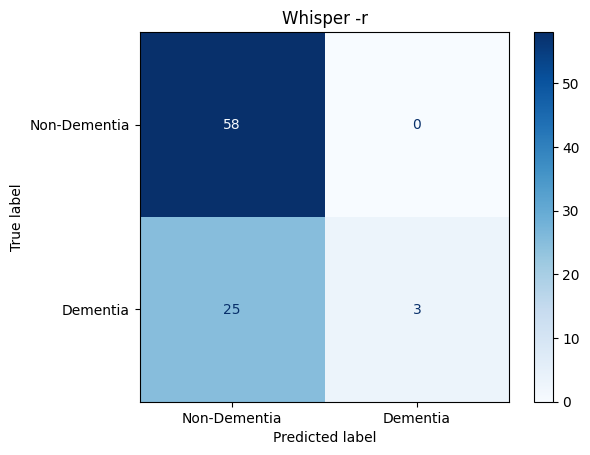

In [120]:
# with bert-v2-overlap-diarization
whisper_v2_r_a_f = pd.read_csv('whisper-v2-15k-r-final-fix.csv')
whisper_v2_r_a_f['result'] = np.where(whisper_v2_r_a_f['hyps'] >= 0.5,1,0)
whisper_v2_r_a_f_wrong = whisper_v2_r_a_f.iloc[np.where(whisper_v2_r_a_f['ifcorrect'] == False)]
print(whisper_v2_r_a_f_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
whisper_v2_r_a_f_result = whisper_v2_r_a_f['result'].tolist()
whisper_v2_r_a_f_hyps = whisper_v2_r_a_f['hyps'].tolist()
whisper_v2_r_a_f_truth = [int(i) for i in whisper_v2_r_a_f['truth'].tolist()]
print(classification_report(whisper_v2_r_a_f_truth, whisper_v2_r_a_f_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(whisper_v2_r_a_f_truth, whisper_v2_r_a_f_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))
print('f1-score: ', f1_score(whisper_v2_r_a_f_truth, whisper_v2_r_a_f_result))
print('accuracy: ', accuracy_score(whisper_v2_r_a_f_truth, whisper_v2_r_a_f_result))

# fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(whisper_v2_r_a_f_truth[0:17]), np.array(whisper_v2_r_a_f_hyps[0:17]), pos_label=1)
# auc1 = metrics.auc(fpr1, tpr1)
# fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(whisper_v2_r_a_f_truth[17:35]), np.array(whisper_v2_r_a_f_hyps[17:35]), pos_label=1)
# auc2 = metrics.auc(fpr2, tpr2)
# fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(whisper_v2_r_a_f_truth[35:52]), np.array(whisper_v2_r_a_f_hyps[35:52]), pos_label=1)
# auc3 = metrics.auc(fpr3, tpr3)
# fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(whisper_v2_r_a_f_truth[52:69]), np.array(whisper_v2_r_a_f_hyps[52:69]), pos_label=1)
# auc4 = metrics.auc(fpr4, tpr4)
# fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(whisper_v2_r_a_f_truth[69:86]), np.array(whisper_v2_r_a_f_hyps[69:86]), pos_label=1)
# auc5 = metrics.auc(fpr5, tpr5)
# print('AUC: ', auc1, auc2, auc3, auc4, auc5)
# print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(whisper_v2_r_a_f_truth, whisper_v2_r_a_f_hyps, whisper_v2_r_a_f_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in whisper_v2_r_a_f_truth]
y_pred = [bool(int(x)) for x in whisper_v2_r_a_f_result]
labels = ['Non-Dementia', 'Dementia']
display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("Whisper -r")

In [121]:
whisper_v2_15k_a_o_d_f = pd.read_csv('whisper-v2-15k-o-d-final-fix.csv')
print(whisper_v2_15k_a_o_d_f)
result = np.where(whisper_v2_15k_a_o_d_f['hyps'] >= 0.5,1,0)
name = whisper_v2_15k_a_o_d_f['name'].values.tolist()
truth = whisper_v2_15k_a_o_d_f['truth'].values.tolist()
hyps = whisper_v2_15k_a_o_d_f['hyps'].values.tolist()
allresult = np.full([101, 105], np.nan)
major = np.zeros([101, 4])
majorvote = np.zeros([101, 5])
correct = 0
fold = []
prevfile = 0
previdx = 0

for i in range(len(name)):
    # print(name[i])
    file = int(name[i].split('\\')[-1].split('C')[0])
    idx = int(name[i].split('\\')[-1].split('_')[1].split('.')[0])
    allresult[file-1][0] = file
    allresult[file-1][idx] = result[i]
    major[file-1][int(result[i])] += 1
    major[file-1][2] = truth[i]
    major[file-1][3] += hyps[i]
    if(file != prevfile):
        fold.append(int(file))
        major[prevfile-1][3] /= previdx
    prevfile = file
    previdx = idx
major[prevfile-1][3] /= previdx

for i in range(len(major)):
    if(i != 19-1 and i != 33-1 and i != 23-1 and i != 26-1 and i != 27-1 and i != 36-1 and i != 41-1 and i != 48-1 and i != 49-1 and i != 59-1 and i != 60-1 and i != 61-1 and i != 62-1 and i != 66-1):
        majorvote[i][0] = i+1
        majorvote[i][1] = 0 if (major[i][0] >= major[i][1]) else 1
        majorvote[i][2] = major[i][2]
        majorvote[i][3] = major[i][3]
        majorvote[i][4] = 1 if (major[i][3] >= 0.5) else 0
        if(majorvote[i][1] == majorvote[i][2]): 
            correct += 1
print(fold)           
print(correct, 86, correct/86)
whisper_v2_15k_a_o_d_f_allresult_df = pd.DataFrame(allresult)
whisper_v2_15k_a_o_d_f_allresult_df.to_csv(f'whisper-with10separate_allresult.csv', index=False) 
whisper_v2_15k_a_o_d_f_finalresult_df = pd.DataFrame(majorvote, columns=['name', 'result', 'truth', 'hyps', 'result2'])
whisper_v2_15k_a_o_d_f_finalresult_df.to_csv(f'whisper-with10separate_finalresult.csv', index=False) 
print(whisper_v2_15k_a_o_d_f_finalresult_df)
# whisper_v2_15k_a_o_d_f_finalresult_df = whisper_v2_15k_a_o_d_f_finalresult_df.drop(['name'], axis=1)
whisper_v2_15k_a_o_d_f_finalresult_df["name"] = whisper_v2_15k_a_o_d_f_finalresult_df["name"].astype(int)
whisper_v2_15k_a_o_d_f_finalresult_df = whisper_v2_15k_a_o_d_f_finalresult_df.drop([18, 32, 22, 25, 26, 35, 40, 47, 48, 58, 59, 60, 61, 65], axis=0)
whisper_v2_15k_a_o_d_f_finalresult_df["idx"] = whisper_v2_15k_a_o_d_f_finalresult_df["name"]
whisper_v2_15k_a_o_d_f_finalresult_df.set_index('idx', inplace=True)
whisper_v2_15k_a_o_d_f_finalresult_df = whisper_v2_15k_a_o_d_f_finalresult_df.reindex(fold)
whisper_v2_15k_a_o_d_f_finalresult_df.to_csv(f'whisper-with10separate_finalresult_reindex.csv', index=False) 
print(whisper_v2_15k_a_o_d_f_finalresult_df)

                                   name      hyps  truth  ifcorrect
0    data_process\CTT5-1-14\15CTT_1.wav  0.436300    0.0       True
1    data_process\CTT5-1-14\15CTT_2.wav  0.467428    0.0       True
2    data_process\CTT5-1-14\16CTT_1.wav  0.674000    1.0       True
3    data_process\CTT5-1-14\22CTT_1.wav  0.270537    0.0       True
4    data_process\CTT5-1-14\28CTT_1.wav  0.414957    1.0      False
..                                  ...       ...    ...        ...
139  data_process\CTT5-5-14\79CTT_1.wav  0.360327    0.0       True
140  data_process\CTT5-5-14\79CTT_2.wav  0.447364    0.0       True
141   data_process\CTT5-5-14\8CTT_1.wav  0.255242    0.0       True
142  data_process\CTT5-5-14\90CTT_1.wav  0.246595    0.0       True
143  data_process\CTT5-5-14\95CTT_1.wav  0.231988    0.0       True

[144 rows x 4 columns]
[15, 16, 22, 28, 34, 35, 40, 42, 51, 53, 55, 70, 83, 84, 85, 97, 99, 11, 25, 2, 37, 39, 45, 46, 65, 67, 68, 71, 74, 76, 77, 78, 80, 91, 94, 18, 1, 20, 30, 32, 3

C:\Users\naomi\AppData\Local\Temp\ipykernel_15656\45500463.py:26: RuntimeWarning: invalid value encountered in scalar divide
  major[prevfile-1][3] /= previdx


     name  result  truth      hyps  result2
idx                                        
28     28     0.0    1.0  0.414957      0.0
35     35     0.0    1.0  0.458254      0.0
40     40     0.0    1.0  0.495839      0.0
85     85     1.0    0.0  0.500420      1.0
11     11     0.0    1.0  0.276454      0.0
25     25     0.0    1.0  0.209834      0.0
37     37     0.0    1.0  0.251673      0.0
39     39     0.0    1.0  0.183540      0.0
45     45     0.0    1.0  0.218689      0.0
46     46     0.0    1.0  0.284858      0.0
65     65     0.0    1.0  0.302369      0.0
67     67     0.0    1.0  0.332065      0.0
18     18     0.0    1.0  0.383190      0.0
20     20     0.0    1.0  0.317549      0.0
32     32     0.0    1.0  0.210492      0.0
38     38     0.0    1.0  0.267910      0.0
57     57     0.0    1.0  0.282562      0.0
58     58     0.0    1.0  0.115462      0.0
12     12     0.0    1.0  0.391645      0.0
17     17     0.0    1.0  0.410711      0.0
4       4     0.0    1.0  0.3306

Text(0.5, 1.0, 'Whisper -p-a')

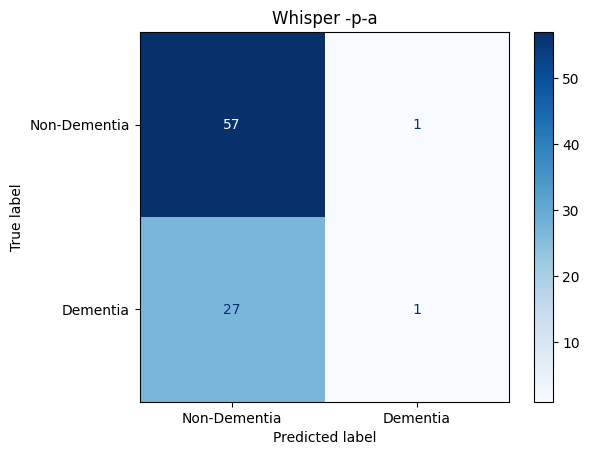

In [122]:
whisper_v2_15k_a_o_d_f_finalresult_df_result = whisper_v2_15k_a_o_d_f_finalresult_df['result']
whisper_v2_15k_a_o_d_f_finalresult_df_result2 = whisper_v2_15k_a_o_d_f_finalresult_df['result2']
whisper_v2_15k_a_o_d_f_finalresult_df_truth = whisper_v2_15k_a_o_d_f_finalresult_df['truth']
whisper_v2_15k_a_o_d_f_finalresult_df_hyps = whisper_v2_15k_a_o_d_f_finalresult_df['hyps']
whisper_v2_15k_a_o_d_f_finalresult_df_wrong = whisper_v2_15k_a_o_d_f_finalresult_df.iloc[np.where(whisper_v2_15k_a_o_d_f_finalresult_df['result'] != whisper_v2_15k_a_o_d_f_finalresult_df['truth'])]
print(whisper_v2_15k_a_o_d_f_finalresult_df_wrong)
clf_report  = classification_report(whisper_v2_15k_a_o_d_f_finalresult_df_truth, whisper_v2_15k_a_o_d_f_finalresult_df_result, target_names=target_names)
print(clf_report)
tn, fp, fn, tp = confusion_matrix(whisper_v2_15k_a_o_d_f_finalresult_df_truth, whisper_v2_15k_a_o_d_f_finalresult_df_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))
# fpr, tpr, thresholds = metrics.roc_curve(np.array(whisper_v2_15k_a_o_d_f_finalresult_df_truth), np.array(whisper_v2_15k_a_o_d_f_finalresult_df_result), pos_label=1)
# print('AUC: ',metrics.auc(fpr, tpr))

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(whisper_v2_15k_a_o_d_f_finalresult_df_truth, whisper_v2_15k_a_o_d_f_finalresult_df_hyps, whisper_v2_15k_a_o_d_f_finalresult_df_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

whisper_v2_15k_a_o_d_f_finalresult_df_wrong = whisper_v2_15k_a_o_d_f_finalresult_df.iloc[np.where(whisper_v2_15k_a_o_d_f_finalresult_df['result2'] != whisper_v2_15k_a_o_d_f_finalresult_df['truth'])]
print(whisper_v2_15k_a_o_d_f_finalresult_df_wrong)
clf_report  = classification_report(whisper_v2_15k_a_o_d_f_finalresult_df_truth, whisper_v2_15k_a_o_d_f_finalresult_df_result2, target_names=target_names)
print(clf_report)
tn, fp, fn, tp = confusion_matrix(whisper_v2_15k_a_o_d_f_finalresult_df_truth, whisper_v2_15k_a_o_d_f_finalresult_df_result2).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(whisper_v2_15k_a_o_d_f_finalresult_df_truth, whisper_v2_15k_a_o_d_f_finalresult_df_hyps, whisper_v2_15k_a_o_d_f_finalresult_df_result2)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in whisper_v2_15k_a_o_d_f_finalresult_df_truth]
y_pred = [bool(int(x)) for x in whisper_v2_15k_a_o_d_f_finalresult_df_result2]
labels = ['Non-Dementia', 'Dementia']
display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("Whisper -p-a")

                                name      hyps  truth  ifcorrect  result
0   data_process\CTT5-1-16\15CTT.wav  0.529569    0.0      False       1
2   data_process\CTT5-1-16\22CTT.wav  0.541738    0.0      False       1
4   data_process\CTT5-1-16\34CTT.wav  0.531682    0.0      False       1
7   data_process\CTT5-1-16\42CTT.wav  0.542249    0.0      False       1
8   data_process\CTT5-1-16\51CTT.wav  0.565584    0.0      False       1
9   data_process\CTT5-1-16\53CTT.wav  0.562285    0.0      False       1
10  data_process\CTT5-1-16\55CTT.wav  0.577344    0.0      False       1
12  data_process\CTT5-1-16\83CTT.wav  0.514888    0.0      False       1
13  data_process\CTT5-1-16\84CTT.wav  0.544009    0.0      False       1
14  data_process\CTT5-1-16\85CTT.wav  0.652170    0.0      False       1
16  data_process\CTT5-1-16\99CTT.wav  0.528450    0.0      False       1
18  data_process\CTT5-2-16\25CTT.wav  0.431554    1.0      False       0
20  data_process\CTT5-2-16\37CTT.wav  0.486979    1

Text(0.5, 1.0, 'Whisper -r')

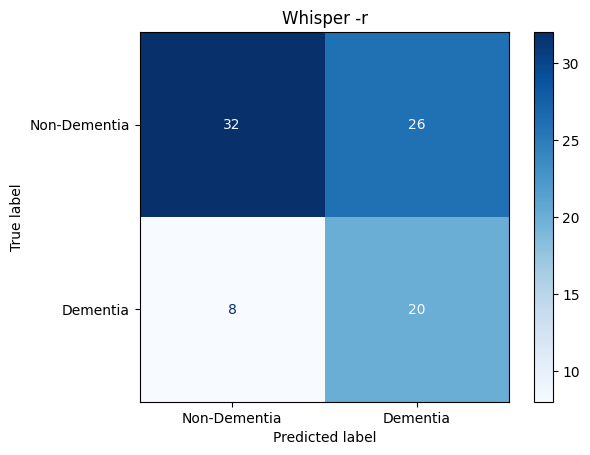

In [123]:
# with bert-v2-overlap-diarization
whisper_v2_r_a_f = pd.read_csv('wav2vec-15k-r-a-final.csv')
whisper_v2_r_a_f['result'] = np.where(whisper_v2_r_a_f['hyps'] >= 0.5,1,0)
whisper_v2_r_a_f_wrong = whisper_v2_r_a_f.iloc[np.where(whisper_v2_r_a_f['ifcorrect'] == False)]
print(whisper_v2_r_a_f_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
whisper_v2_r_a_f_result = whisper_v2_r_a_f['result'].tolist()
whisper_v2_r_a_f_hyps = whisper_v2_r_a_f['hyps'].tolist()
whisper_v2_r_a_f_truth = [int(i) for i in whisper_v2_r_a_f['truth'].tolist()]
print(classification_report(whisper_v2_r_a_f_truth, whisper_v2_r_a_f_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(whisper_v2_r_a_f_truth, whisper_v2_r_a_f_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))
print('f1-score: ', f1_score(whisper_v2_r_a_f_truth, whisper_v2_r_a_f_result))
print('accuracy: ', accuracy_score(whisper_v2_r_a_f_truth, whisper_v2_r_a_f_result))

# fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(whisper_v2_r_a_f_truth[0:17]), np.array(whisper_v2_r_a_f_hyps[0:17]), pos_label=1)
# auc1 = metrics.auc(fpr1, tpr1)
# fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(whisper_v2_r_a_f_truth[17:35]), np.array(whisper_v2_r_a_f_hyps[17:35]), pos_label=1)
# auc2 = metrics.auc(fpr2, tpr2)
# fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(whisper_v2_r_a_f_truth[35:52]), np.array(whisper_v2_r_a_f_hyps[35:52]), pos_label=1)
# auc3 = metrics.auc(fpr3, tpr3)
# fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(whisper_v2_r_a_f_truth[52:69]), np.array(whisper_v2_r_a_f_hyps[52:69]), pos_label=1)
# auc4 = metrics.auc(fpr4, tpr4)
# fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(whisper_v2_r_a_f_truth[69:86]), np.array(whisper_v2_r_a_f_hyps[69:86]), pos_label=1)
# auc5 = metrics.auc(fpr5, tpr5)
# print('AUC: ', auc1, auc2, auc3, auc4, auc5)
# print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(whisper_v2_r_a_f_truth, whisper_v2_r_a_f_hyps, whisper_v2_r_a_f_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in whisper_v2_r_a_f_truth]
y_pred = [bool(int(x)) for x in whisper_v2_r_a_f_result]
labels = ['Non-Dementia', 'Dementia']
display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("Whisper -r")

### BERT

    name      hyps  truth  ifcorrect  result
0     15  0.809869    0.0      False       1
2     22  0.586382    0.0      False       1
5     35  0.144858    1.0      False       0
8     51  0.764654    0.0      False       1
20    37  0.165735    1.0      False       0
22    45  0.167885    1.0      False       0
35    18  0.202188    1.0      False       0
37    20  0.411597    1.0      False       0
39    32  0.088969    1.0      False       0
40    38  0.159666    1.0      False       0
44    57  0.019511    1.0      False       0
45    58  0.110117    1.0      False       0
53    12  0.298261    1.0      False       0
57     4  0.364237    1.0      False       0
60    63  0.281075    1.0      False       0
76    50  0.653014    0.0      False       1
77     5  0.232943    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.81      0.93      0.86        58
     patient       0.79      0.54      0.64        28

    accuracy              

Text(0.5, 1.0, 'BERT -p-c')

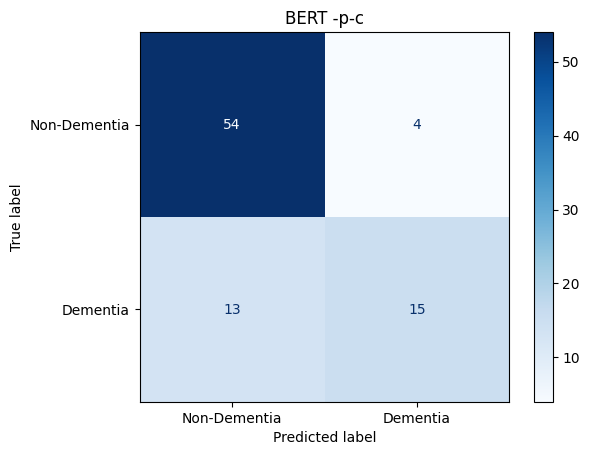

In [124]:
# with bert-v2-overlap-diarization
bert_v2_o_d_f = pd.read_csv('bert-v2-15k-o-d-final-p.csv')
bert_v2_o_d_f['result'] = np.where(bert_v2_o_d_f['hyps'] >= 0.5,1,0)
bert_v2_o_d_f_wrong = bert_v2_o_d_f.iloc[np.where(bert_v2_o_d_f['ifcorrect'] == False)]
print(bert_v2_o_d_f_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_o_d_f_result = bert_v2_o_d_f['result'].tolist()
bert_v2_o_d_f_hyps = bert_v2_o_d_f['hyps'].tolist()
bert_v2_o_d_f_truth = [int(i) for i in bert_v2_o_d_f['truth'].tolist()]
print(classification_report(bert_v2_o_d_f_truth, bert_v2_o_d_f_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_o_d_f_truth, bert_v2_o_d_f_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(bert_v2_o_d_f_truth[0:17]), np.array(bert_v2_o_d_f_hyps[0:17]), pos_label=1)
# auc1 = metrics.auc(fpr1, tpr1)
# fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(bert_v2_o_d_f_truth[17:35]), np.array(bert_v2_o_d_f_hyps[17:35]), pos_label=1)
# auc2 = metrics.auc(fpr2, tpr2)
# fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(bert_v2_o_d_f_truth[35:52]), np.array(bert_v2_o_d_f_hyps[35:52]), pos_label=1)
# auc3 = metrics.auc(fpr3, tpr3)
# fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(bert_v2_o_d_f_truth[52:69]), np.array(bert_v2_o_d_f_hyps[52:69]), pos_label=1)
# auc4 = metrics.auc(fpr4, tpr4)
# fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(bert_v2_o_d_f_truth[69:86]), np.array(bert_v2_o_d_f_hyps[69:86]), pos_label=1)
# auc5 = metrics.auc(fpr5, tpr5)
# print('AUC: ', auc1, auc2, auc3, auc4, auc5)
# print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(bert_v2_o_d_f_truth, bert_v2_o_d_f_hyps, bert_v2_o_d_f_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in bert_v2_o_d_f_truth]
y_pred = [bool(int(x)) for x in bert_v2_o_d_f_result]
labels = ['Non-Dementia', 'Dementia']
display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("BERT -p-c")

    name      hyps  truth  ifcorrect  result
0     15  0.890168    0.0      False       1
1     16  0.383602    1.0      False       0
3     28  0.297012    1.0      False       0
5     35  0.371834    1.0      False       0
18    25  0.319832    1.0      False       0
20    37  0.189681    1.0      False       0
22    45  0.249218    1.0      False       0
24    65  0.393690    1.0      False       0
26    68  0.723410    0.0      False       1
27    71  0.590601    0.0      False       1
35    18  0.171654    1.0      False       0
37    20  0.214122    1.0      False       0
39    32  0.096891    1.0      False       0
44    57  0.011450    1.0      False       0
45    58  0.322245    1.0      False       0
60    63  0.328267    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.81      0.95      0.87        58
     patient       0.83      0.54      0.65        28

    accuracy                           0.81        86
   macro avg     

Text(0.5, 1.0, 'BERT -r-l')

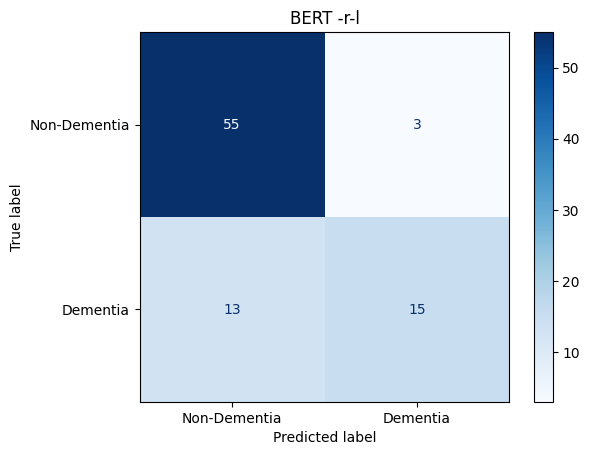

In [125]:
# with bert-v2-overlap-diarization
bert_v2_r_f = pd.read_csv('bert-v2-15k-r-final-p.csv')
bert_v2_r_f['result'] = np.where(bert_v2_r_f['hyps'] >= 0.5,1,0)
bbert_v2_r_f_wrong = bert_v2_r_f.iloc[np.where(bert_v2_r_f['ifcorrect'] == False)]
print(bbert_v2_r_f_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_r_f_result = bert_v2_r_f['result'].tolist()
bert_v2_r_f_hyps = bert_v2_r_f['hyps'].tolist()
bert_v2_r_f_truth = [int(i) for i in bert_v2_r_f['truth'].tolist()]
print(classification_report(bert_v2_r_f_truth, bert_v2_r_f_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_r_f_truth, bert_v2_r_f_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(bert_v2_r_f_truth[0:17]), np.array(bert_v2_r_f_hyps[0:17]), pos_label=1)
# auc1 = metrics.auc(fpr1, tpr1)
# fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(bert_v2_r_f_truth[17:35]), np.array(bert_v2_r_f_hyps[17:35]), pos_label=1)
# auc2 = metrics.auc(fpr2, tpr2)
# fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(bert_v2_r_f_truth[35:52]), np.array(bert_v2_r_f_hyps[35:52]), pos_label=1)
# auc3 = metrics.auc(fpr3, tpr3)
# fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(bert_v2_r_f_truth[52:69]), np.array(bert_v2_r_f_hyps[52:69]), pos_label=1)
# auc4 = metrics.auc(fpr4, tpr4)
# fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(bert_v2_r_f_truth[69:86]), np.array(bert_v2_r_f_hyps[69:86]), pos_label=1)
# auc5 = metrics.auc(fpr5, tpr5)
# print('AUC: ', auc1, auc2, auc3, auc4, auc5)
# print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(bert_v2_r_f_truth, bert_v2_r_f_hyps, bert_v2_r_f_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in bert_v2_r_f_truth]
y_pred = [bool(int(x)) for x in bert_v2_r_f_result]
labels = ['Non-Dementia', 'Dementia']
display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("BERT -r-l")

    name      hyps  truth  ifcorrect  result
0     15  0.752903    0.0      False       1
1     16  0.254503    1.0      False       0
3     28  0.071012    1.0      False       0
5     35  0.313713    1.0      False       0
8     51  0.568984    0.0      False       1
18    25  0.316245    1.0      False       0
26    68  0.677947    0.0      False       1
27    71  0.926511    0.0      False       1
35    18  0.295907    1.0      False       0
37    20  0.444211    1.0      False       0
39    32  0.124672    1.0      False       0
44    57  0.040764    1.0      False       0
45    58  0.317503    1.0      False       0
57     4  0.406460    1.0      False       0
61     6  0.596402    0.0      False       1
77     5  0.309547    1.0      False       0
79    69  0.541783    0.0      False       1
83     8  0.850370    0.0      False       1
              precision    recall  f1-score   support

 non-patient       0.82      0.88      0.85        58
     patient       0.71      0.61   

Text(0.5, 1.0, 'BERT -r-l')

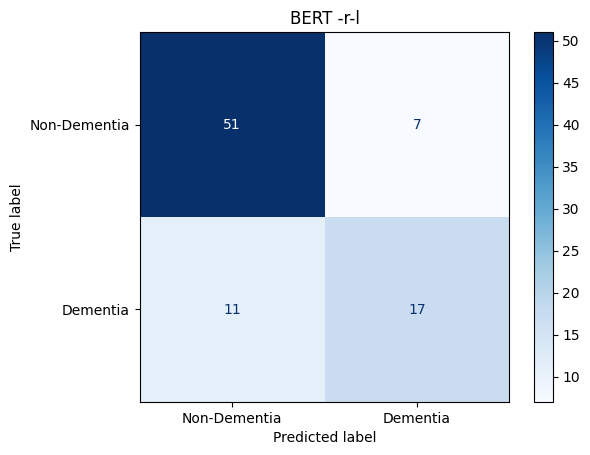

In [126]:
# with bert-v2-overlap-diarization
bert_v2_r_f = pd.read_csv('distilbert-15k-r-a-final.csv')
bert_v2_r_f['result'] = np.where(bert_v2_r_f['hyps'] >= 0.5,1,0)
bbert_v2_r_f_wrong = bert_v2_r_f.iloc[np.where(bert_v2_r_f['ifcorrect'] == False)]
print(bbert_v2_r_f_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_r_f_result = bert_v2_r_f['result'].tolist()
bert_v2_r_f_hyps = bert_v2_r_f['hyps'].tolist()
bert_v2_r_f_truth = [int(i) for i in bert_v2_r_f['truth'].tolist()]
print(classification_report(bert_v2_r_f_truth, bert_v2_r_f_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_r_f_truth, bert_v2_r_f_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(bert_v2_r_f_truth[0:17]), np.array(bert_v2_r_f_hyps[0:17]), pos_label=1)
# auc1 = metrics.auc(fpr1, tpr1)
# fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(bert_v2_r_f_truth[17:35]), np.array(bert_v2_r_f_hyps[17:35]), pos_label=1)
# auc2 = metrics.auc(fpr2, tpr2)
# fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(bert_v2_r_f_truth[35:52]), np.array(bert_v2_r_f_hyps[35:52]), pos_label=1)
# auc3 = metrics.auc(fpr3, tpr3)
# fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(bert_v2_r_f_truth[52:69]), np.array(bert_v2_r_f_hyps[52:69]), pos_label=1)
# auc4 = metrics.auc(fpr4, tpr4)
# fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(bert_v2_r_f_truth[69:86]), np.array(bert_v2_r_f_hyps[69:86]), pos_label=1)
# auc5 = metrics.auc(fpr5, tpr5)
# print('AUC: ', auc1, auc2, auc3, auc4, auc5)
# print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(bert_v2_r_f_truth, bert_v2_r_f_hyps, bert_v2_r_f_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in bert_v2_r_f_truth]
y_pred = [bool(int(x)) for x in bert_v2_r_f_result]
labels = ['Non-Dementia', 'Dementia']
display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("BERT -r-l")

### Combine

        hyps  truth  result  ifcorrect
0   0.642895      0       1      False
1   0.425988      1       0      False
3   0.368487      1       0      False
5   0.332657      1       0      False
17  0.467723      1       0      False
18  0.310757      1       0      False
20  0.239124      1       0      False
22  0.219311      1       0      False
24  0.301921      1       0      False
35  0.141918      1       0      False
37  0.313357      1       0      False
39  0.094344      1       0      False
40  0.443226      1       0      False
44  0.024281      1       0      False
45  0.436801      1       0      False
53  0.436232      1       0      False
60  0.241050      1       0      False
69  0.494491      1       0      False
77  0.482806      1       0      False
              precision    recall  f1-score   support

 non-patient       0.76      0.98      0.86        58
     patient       0.91      0.36      0.51        28

    accuracy                           0.78        86
  

Text(0.5, 1.0, 'w & b')

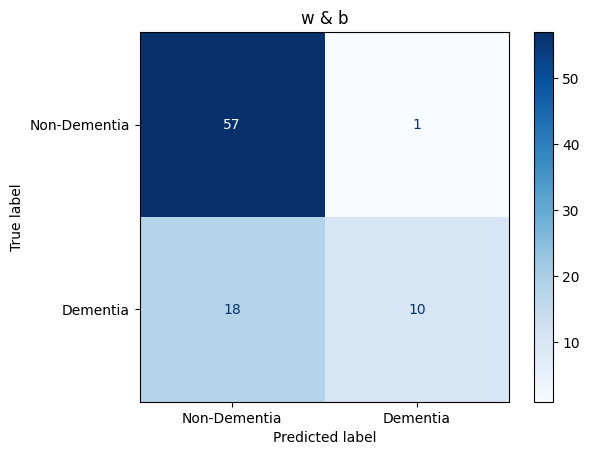

In [127]:
# for 1, 2
whisper_v2_15k = pd.read_csv('whisper-v2-15k-r-final-fix.csv')
bert_v2_15k = pd.read_csv('bert-v2-15k-r-final-p.csv')
# llama_v2 = pd.read_csv('gpt-v2-o-d-final.csv')

w_w = 0.80
b_w = 0.80
l_w = 0.81

weighted = w_w + b_w 
combine = pd.DataFrame()
combine['hyps'] = whisper_v2_15k['hyps']*w_w/weighted + bert_v2_15k['hyps']*b_w/weighted
# combine['hyps'] = (whisper_v2_15k['hyps'] + bert_v2_15k['hyps']) / 2
combine['truth'] = whisper_v2_15k['truth'].astype(int)
combine['result'] = np.where(combine['hyps'] >= 0.5,1,0)
combine['ifcorrect'] = combine['result'] == combine['truth']
# combine
combine_wrong = combine.iloc[np.where(combine['ifcorrect'] == False)]
print(combine_wrong)
# print(fivefolds_with10separate_10k.head(20))
combine_result = combine['result'].tolist()
combine_hyps = combine['hyps'].tolist()
combine_truth = [int(i) for i in combine['truth'].tolist()]
print(classification_report(combine_truth, combine_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(combine_truth, combine_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

# # fpr, tpr, thresholds = metrics.roc_curve(np.array(fivefolds_bert_v2_15k_mean4_truth), np.array(fivefolds_bert_v2_15k_mean4_hyps), pos_label=1)
# # print('AUC: ',metrics.auc(fpr, tpr))
# fpr1, tpr1, thresholds1 = metrics.roc_curve(np.array(combine_truth[0:19]), np.array(combine_hyps[0:19]), pos_label=1)
# auc1 = metrics.auc(fpr1, tpr1)
# fpr2, tpr2, thresholds2 = metrics.roc_curve(np.array(combine_truth[19:37]), np.array(combine_hyps[19:37]), pos_label=1)
# auc2 = metrics.auc(fpr2, tpr2)
# fpr3, tpr3, thresholds3 = metrics.roc_curve(np.array(combine_truth[37:54]), np.array(combine_hyps[37:54]), pos_label=1)
# auc3 = metrics.auc(fpr3, tpr3)
# fpr4, tpr4, thresholds4 = metrics.roc_curve(np.array(combine_truth[54:71]), np.array(combine_hyps[54:71]), pos_label=1)
# auc4 = metrics.auc(fpr4, tpr4)
# fpr5, tpr5, thresholds5 = metrics.roc_curve(np.array(combine_truth[71:88]), np.array(combine_hyps[71:88]), pos_label=1)
# auc5 = metrics.auc(fpr5, tpr5)
# print('AUC: ', auc1, auc2, auc3, auc4, auc5)
# print("AUC_avg: ", (auc1+auc2+auc3+auc4+auc5)/5)

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(combine_truth, combine_hyps, combine_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in combine_truth]
y_pred = [bool(int(x)) for x in combine_result]
labels = ['Non-Dementia', 'Dementia']
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("w & b")

### BERT layer

    name      hyps  truth  ifcorrect  result
3     28  0.145241    1.0      False       0
5     35  0.101023    1.0      False       0
17    11  0.495014    1.0      False       0
18    25  0.293230    1.0      False       0
20    37  0.333730    1.0      False       0
21    39  0.064366    1.0      False       0
22    45  0.294635    1.0      False       0
27    71  0.521163    0.0      False       1
35    18  0.288538    1.0      False       0
39    32  0.109278    1.0      False       0
40    38  0.368135    1.0      False       0
44    57  0.044980    1.0      False       0
45    58  0.441529    1.0      False       0
57     4  0.256604    1.0      False       0
72    24  0.180040    1.0      False       0
73    31  0.018777    1.0      False       0
75    47  0.693885    0.0      False       1
77     5  0.352201    1.0      False       0
79    69  0.830869    0.0      False       1
83     8  0.679593    0.0      False       1
              precision    recall  f1-score   support



Text(0.5, 1.0, 'BERT -p-c')

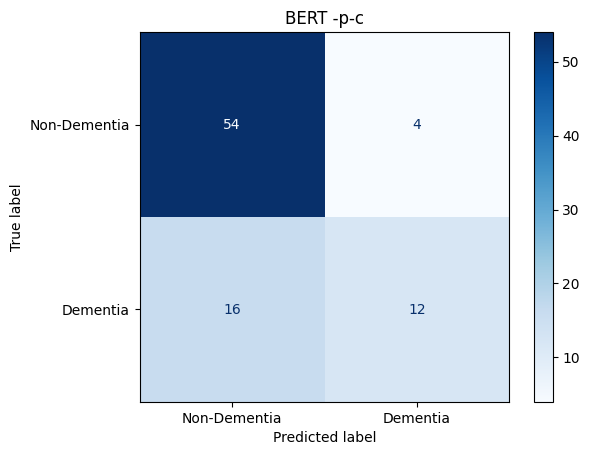

In [128]:
# with bert-v2-overlap-diarization
bert_v2_o_d_f = pd.read_csv('bert-v2-15k-r-a-final-s0.csv')
bert_v2_o_d_f['result'] = np.where(bert_v2_o_d_f['hyps'] >= 0.5,1,0)
bert_v2_o_d_f_wrong = bert_v2_o_d_f.iloc[np.where(bert_v2_o_d_f['ifcorrect'] == False)]
print(bert_v2_o_d_f_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_o_d_f_result = bert_v2_o_d_f['result'].tolist()
bert_v2_o_d_f_hyps = bert_v2_o_d_f['hyps'].tolist()
bert_v2_o_d_f_truth = [int(i) for i in bert_v2_o_d_f['truth'].tolist()]
print(classification_report(bert_v2_o_d_f_truth, bert_v2_o_d_f_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_o_d_f_truth, bert_v2_o_d_f_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(bert_v2_o_d_f_truth, bert_v2_o_d_f_hyps, bert_v2_o_d_f_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in bert_v2_o_d_f_truth]
y_pred = [bool(int(x)) for x in bert_v2_o_d_f_result]
labels = ['Non-Dementia', 'Dementia']
display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("BERT -p-c")

    name      hyps  truth  ifcorrect  result
0     15  0.518123    0.0      False       1
3     28  0.050585    1.0      False       0
5     35  0.060982    1.0      False       0
17    11  0.405146    1.0      False       0
18    25  0.345832    1.0      False       0
20    37  0.392907    1.0      False       0
21    39  0.427225    1.0      False       0
22    45  0.452163    1.0      False       0
26    68  0.599619    0.0      False       1
27    71  0.528817    0.0      False       1
35    18  0.192885    1.0      False       0
37    20  0.418116    1.0      False       0
39    32  0.107686    1.0      False       0
40    38  0.268638    1.0      False       0
44    57  0.038774    1.0      False       0
45    58  0.343559    1.0      False       0
57     4  0.353592    1.0      False       0
72    24  0.195278    1.0      False       0
75    47  0.627574    0.0      False       1
77     5  0.341211    1.0      False       0
79    69  0.822003    0.0      False       1
83     8  

Text(0.5, 1.0, 'BERT -p-c')

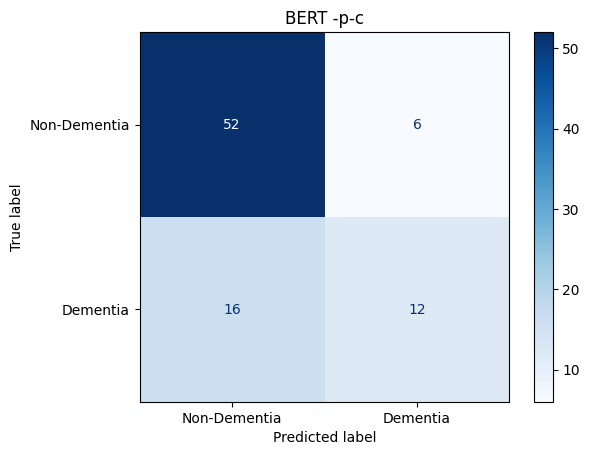

In [129]:
# with bert-v2-overlap-diarization
bert_v2_o_d_f = pd.read_csv('bert-v2-15k-r-a-final-s1.csv')
bert_v2_o_d_f['result'] = np.where(bert_v2_o_d_f['hyps'] >= 0.5,1,0)
bert_v2_o_d_f_wrong = bert_v2_o_d_f.iloc[np.where(bert_v2_o_d_f['ifcorrect'] == False)]
print(bert_v2_o_d_f_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_o_d_f_result = bert_v2_o_d_f['result'].tolist()
bert_v2_o_d_f_hyps = bert_v2_o_d_f['hyps'].tolist()
bert_v2_o_d_f_truth = [int(i) for i in bert_v2_o_d_f['truth'].tolist()]
print(classification_report(bert_v2_o_d_f_truth, bert_v2_o_d_f_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_o_d_f_truth, bert_v2_o_d_f_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(bert_v2_o_d_f_truth, bert_v2_o_d_f_hyps, bert_v2_o_d_f_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in bert_v2_o_d_f_truth]
y_pred = [bool(int(x)) for x in bert_v2_o_d_f_result]
labels = ['Non-Dementia', 'Dementia']
display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("BERT -p-c")

    name      hyps  truth  ifcorrect  result
0     15  0.655281    0.0      False       1
3     28  0.081247    1.0      False       0
5     35  0.153432    1.0      False       0
17    11  0.383914    1.0      False       0
18    25  0.415275    1.0      False       0
20    37  0.459615    1.0      False       0
26    68  0.725820    0.0      False       1
35    18  0.254514    1.0      False       0
37    20  0.417606    1.0      False       0
39    32  0.129712    1.0      False       0
40    38  0.357680    1.0      False       0
44    57  0.029434    1.0      False       0
57     4  0.298377    1.0      False       0
73    31  0.282672    1.0      False       0
75    47  0.580487    0.0      False       1
77     5  0.405119    1.0      False       0
79    69  0.787571    0.0      False       1
83     8  0.734089    0.0      False       1
              precision    recall  f1-score   support

 non-patient       0.80      0.91      0.85        58
     patient       0.75      0.54   

Text(0.5, 1.0, 'BERT -p-c')

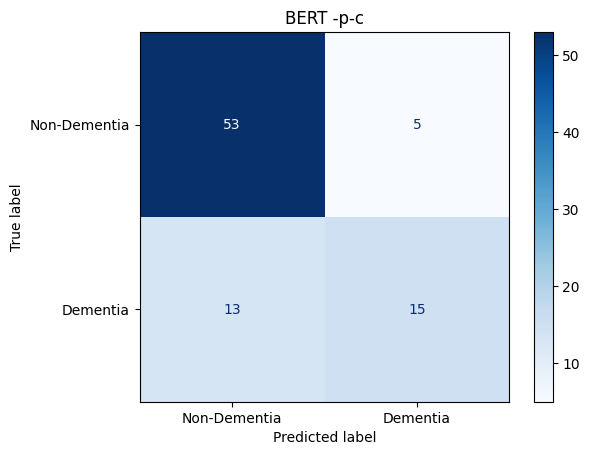

In [130]:
# with bert-v2-overlap-diarization
bert_v2_o_d_f = pd.read_csv('bert-v2-15k-r-a-final-s2.csv')
bert_v2_o_d_f['result'] = np.where(bert_v2_o_d_f['hyps'] >= 0.5,1,0)
bert_v2_o_d_f_wrong = bert_v2_o_d_f.iloc[np.where(bert_v2_o_d_f['ifcorrect'] == False)]
print(bert_v2_o_d_f_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_o_d_f_result = bert_v2_o_d_f['result'].tolist()
bert_v2_o_d_f_hyps = bert_v2_o_d_f['hyps'].tolist()
bert_v2_o_d_f_truth = [int(i) for i in bert_v2_o_d_f['truth'].tolist()]
print(classification_report(bert_v2_o_d_f_truth, bert_v2_o_d_f_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_o_d_f_truth, bert_v2_o_d_f_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(bert_v2_o_d_f_truth, bert_v2_o_d_f_hyps, bert_v2_o_d_f_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in bert_v2_o_d_f_truth]
y_pred = [bool(int(x)) for x in bert_v2_o_d_f_result]
labels = ['Non-Dementia', 'Dementia']
display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("BERT -p-c")

    name      hyps  truth  ifcorrect  result
0     15  0.659956    0.0      False       1
1     16  0.389844    1.0      False       0
3     28  0.127129    1.0      False       0
5     35  0.133017    1.0      False       0
18    25  0.384181    1.0      False       0
20    37  0.413807    1.0      False       0
22    45  0.414387    1.0      False       0
24    65  0.492625    1.0      False       0
26    68  0.545549    0.0      False       1
35    18  0.259323    1.0      False       0
37    20  0.356748    1.0      False       0
39    32  0.128175    1.0      False       0
40    38  0.212885    1.0      False       0
44    57  0.044967    1.0      False       0
45    58  0.412902    1.0      False       0
57     4  0.336818    1.0      False       0
69    10  0.459070    1.0      False       0
72    24  0.492235    1.0      False       0
73    31  0.074428    1.0      False       0
75    47  0.654522    0.0      False       1
77     5  0.418973    1.0      False       0
79    69  

Text(0.5, 1.0, 'BERT -p-c')

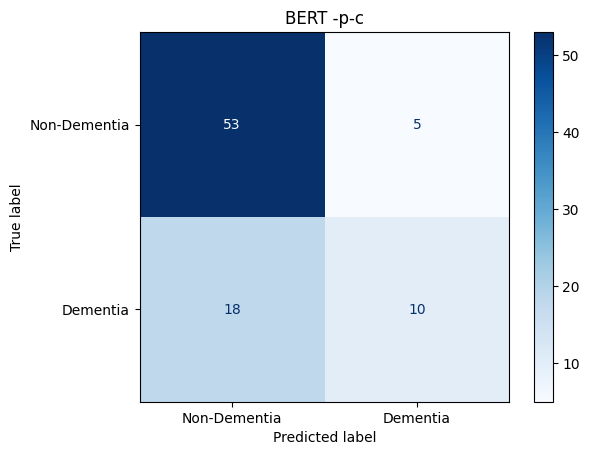

In [131]:
# with bert-v2-overlap-diarization
bert_v2_o_d_f = pd.read_csv('bert-v2-15k-r-a-final-s3.csv')
bert_v2_o_d_f['result'] = np.where(bert_v2_o_d_f['hyps'] >= 0.5,1,0)
bert_v2_o_d_f_wrong = bert_v2_o_d_f.iloc[np.where(bert_v2_o_d_f['ifcorrect'] == False)]
print(bert_v2_o_d_f_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_o_d_f_result = bert_v2_o_d_f['result'].tolist()
bert_v2_o_d_f_hyps = bert_v2_o_d_f['hyps'].tolist()
bert_v2_o_d_f_truth = [int(i) for i in bert_v2_o_d_f['truth'].tolist()]
print(classification_report(bert_v2_o_d_f_truth, bert_v2_o_d_f_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_o_d_f_truth, bert_v2_o_d_f_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(bert_v2_o_d_f_truth, bert_v2_o_d_f_hyps, bert_v2_o_d_f_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in bert_v2_o_d_f_truth]
y_pred = [bool(int(x)) for x in bert_v2_o_d_f_result]
labels = ['Non-Dementia', 'Dementia']
display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("BERT -p-c")

    name      hyps  truth  ifcorrect  result
0     15  0.860127    0.0      False       1
1     16  0.417195    1.0      False       0
3     28  0.141877    1.0      False       0
5     35  0.108876    1.0      False       0
18    25  0.360483    1.0      False       0
20    37  0.430395    1.0      False       0
22    45  0.300539    1.0      False       0
24    65  0.398684    1.0      False       0
25    67  0.474879    1.0      False       0
26    68  0.540847    0.0      False       1
35    18  0.227738    1.0      False       0
37    20  0.383220    1.0      False       0
39    32  0.154845    1.0      False       0
40    38  0.308048    1.0      False       0
44    57  0.029691    1.0      False       0
69    10  0.433912    1.0      False       0
72    24  0.255621    1.0      False       0
73    31  0.216007    1.0      False       0
75    47  0.716367    0.0      False       1
79    69  0.604514    0.0      False       1
83     8  0.597564    0.0      False       1
          

Text(0.5, 1.0, 'BERT -p-c')

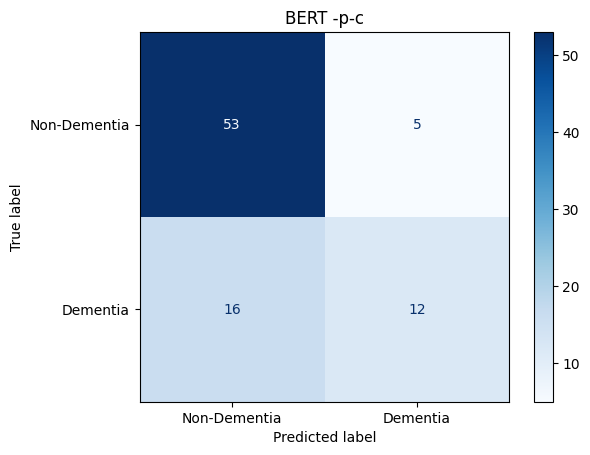

In [132]:
# with bert-v2-overlap-diarization
bert_v2_o_d_f = pd.read_csv('bert-v2-15k-r-a-final-s4.csv')
bert_v2_o_d_f['result'] = np.where(bert_v2_o_d_f['hyps'] >= 0.5,1,0)
bert_v2_o_d_f_wrong = bert_v2_o_d_f.iloc[np.where(bert_v2_o_d_f['ifcorrect'] == False)]
print(bert_v2_o_d_f_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_o_d_f_result = bert_v2_o_d_f['result'].tolist()
bert_v2_o_d_f_hyps = bert_v2_o_d_f['hyps'].tolist()
bert_v2_o_d_f_truth = [int(i) for i in bert_v2_o_d_f['truth'].tolist()]
print(classification_report(bert_v2_o_d_f_truth, bert_v2_o_d_f_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_o_d_f_truth, bert_v2_o_d_f_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(bert_v2_o_d_f_truth, bert_v2_o_d_f_hyps, bert_v2_o_d_f_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in bert_v2_o_d_f_truth]
y_pred = [bool(int(x)) for x in bert_v2_o_d_f_result]
labels = ['Non-Dementia', 'Dementia']
display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("BERT -p-c")

    name      hyps  truth  ifcorrect  result
0     15  0.877557    0.0      False       1
2     22  0.523526    0.0      False       1
3     28  0.161204    1.0      False       0
5     35  0.129178    1.0      False       0
8     51  0.547957    0.0      False       1
18    25  0.331333    1.0      False       0
20    37  0.316663    1.0      False       0
22    45  0.138845    1.0      False       0
24    65  0.368756    1.0      False       0
25    67  0.251317    1.0      False       0
26    68  0.603870    0.0      False       1
35    18  0.192725    1.0      False       0
37    20  0.419380    1.0      False       0
39    32  0.138083    1.0      False       0
40    38  0.322634    1.0      False       0
44    57  0.014184    1.0      False       0
45    58  0.375370    1.0      False       0
72    24  0.311376    1.0      False       0
73    31  0.222326    1.0      False       0
75    47  0.656331    0.0      False       1
              precision    recall  f1-score   support



Text(0.5, 1.0, 'BERT -p-c')

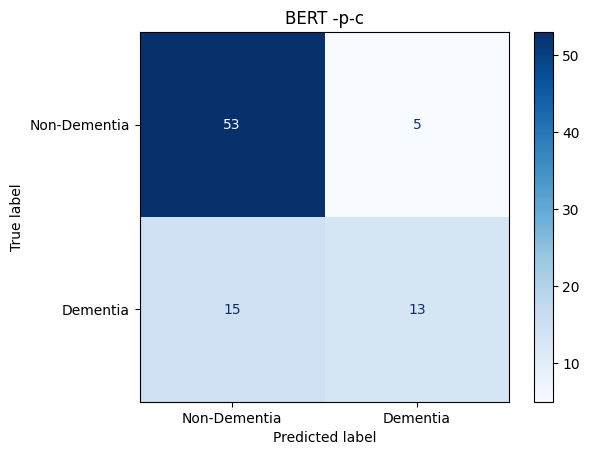

In [133]:
# with bert-v2-overlap-diarization
bert_v2_o_d_f = pd.read_csv('bert-v2-15k-r-a-final-s5.csv')
bert_v2_o_d_f['result'] = np.where(bert_v2_o_d_f['hyps'] >= 0.5,1,0)
bert_v2_o_d_f_wrong = bert_v2_o_d_f.iloc[np.where(bert_v2_o_d_f['ifcorrect'] == False)]
print(bert_v2_o_d_f_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_o_d_f_result = bert_v2_o_d_f['result'].tolist()
bert_v2_o_d_f_hyps = bert_v2_o_d_f['hyps'].tolist()
bert_v2_o_d_f_truth = [int(i) for i in bert_v2_o_d_f['truth'].tolist()]
print(classification_report(bert_v2_o_d_f_truth, bert_v2_o_d_f_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_o_d_f_truth, bert_v2_o_d_f_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(bert_v2_o_d_f_truth, bert_v2_o_d_f_hyps, bert_v2_o_d_f_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in bert_v2_o_d_f_truth]
y_pred = [bool(int(x)) for x in bert_v2_o_d_f_result]
labels = ['Non-Dementia', 'Dementia']
display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("BERT -p-c")

    name      hyps  truth  ifcorrect  result
0     15  0.815288    0.0      False       1
3     28  0.219161    1.0      False       0
5     35  0.170789    1.0      False       0
8     51  0.604127    0.0      False       1
18    25  0.293890    1.0      False       0
20    37  0.214095    1.0      False       0
22    45  0.103665    1.0      False       0
24    65  0.487471    1.0      False       0
25    67  0.313649    1.0      False       0
26    68  0.857199    0.0      False       1
35    18  0.220791    1.0      False       0
37    20  0.331426    1.0      False       0
39    32  0.116916    1.0      False       0
40    38  0.386766    1.0      False       0
44    57  0.016241    1.0      False       0
45    58  0.468387    1.0      False       0
69    10  0.389107    1.0      False       0
72    24  0.415688    1.0      False       0
73    31  0.098165    1.0      False       0
75    47  0.705061    0.0      False       1
              precision    recall  f1-score   support



Text(0.5, 1.0, 'BERT -p-c')

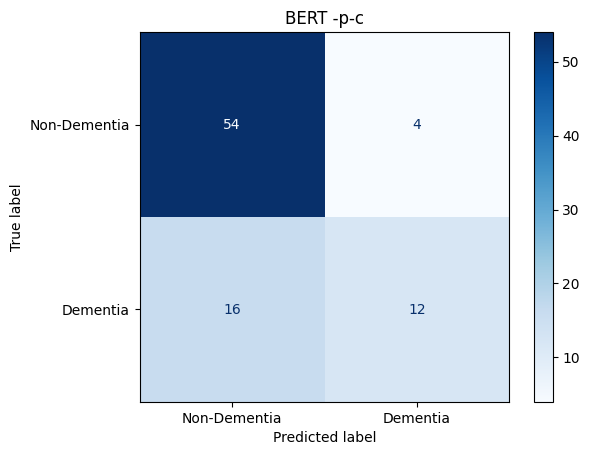

In [134]:
# with bert-v2-overlap-diarization
bert_v2_o_d_f = pd.read_csv('bert-v2-15k-r-a-final-s6.csv')
bert_v2_o_d_f['result'] = np.where(bert_v2_o_d_f['hyps'] >= 0.5,1,0)
bert_v2_o_d_f_wrong = bert_v2_o_d_f.iloc[np.where(bert_v2_o_d_f['ifcorrect'] == False)]
print(bert_v2_o_d_f_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_o_d_f_result = bert_v2_o_d_f['result'].tolist()
bert_v2_o_d_f_hyps = bert_v2_o_d_f['hyps'].tolist()
bert_v2_o_d_f_truth = [int(i) for i in bert_v2_o_d_f['truth'].tolist()]
print(classification_report(bert_v2_o_d_f_truth, bert_v2_o_d_f_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_o_d_f_truth, bert_v2_o_d_f_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(bert_v2_o_d_f_truth, bert_v2_o_d_f_hyps, bert_v2_o_d_f_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in bert_v2_o_d_f_truth]
y_pred = [bool(int(x)) for x in bert_v2_o_d_f_result]
labels = ['Non-Dementia', 'Dementia']
display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("BERT -p-c")

    name      hyps  truth  ifcorrect  result
0     15  0.818533    0.0      False       1
3     28  0.338477    1.0      False       0
5     35  0.200400    1.0      False       0
8     51  0.541543    0.0      False       1
18    25  0.390159    1.0      False       0
20    37  0.265934    1.0      False       0
22    45  0.115719    1.0      False       0
25    67  0.308834    1.0      False       0
26    68  0.816538    0.0      False       1
35    18  0.221502    1.0      False       0
37    20  0.243553    1.0      False       0
39    32  0.120533    1.0      False       0
44    57  0.019111    1.0      False       0
45    58  0.424514    1.0      False       0
72    24  0.456088    1.0      False       0
73    31  0.031862    1.0      False       0
75    47  0.628051    0.0      False       1
77     5  0.421599    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.79      0.93      0.86        58
     patient       0.78      0.50   

Text(0.5, 1.0, 'BERT -p-c')

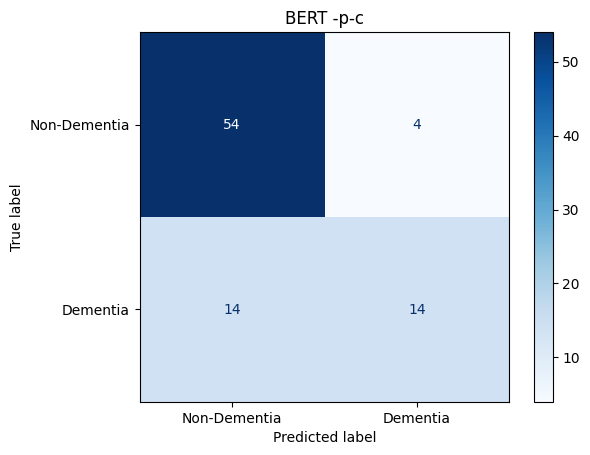

In [135]:
# with bert-v2-overlap-diarization
bert_v2_o_d_f = pd.read_csv('bert-v2-15k-r-a-final-s7.csv')
bert_v2_o_d_f['result'] = np.where(bert_v2_o_d_f['hyps'] >= 0.5,1,0)
bert_v2_o_d_f_wrong = bert_v2_o_d_f.iloc[np.where(bert_v2_o_d_f['ifcorrect'] == False)]
print(bert_v2_o_d_f_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_o_d_f_result = bert_v2_o_d_f['result'].tolist()
bert_v2_o_d_f_hyps = bert_v2_o_d_f['hyps'].tolist()
bert_v2_o_d_f_truth = [int(i) for i in bert_v2_o_d_f['truth'].tolist()]
print(classification_report(bert_v2_o_d_f_truth, bert_v2_o_d_f_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_o_d_f_truth, bert_v2_o_d_f_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(bert_v2_o_d_f_truth, bert_v2_o_d_f_hyps, bert_v2_o_d_f_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in bert_v2_o_d_f_truth]
y_pred = [bool(int(x)) for x in bert_v2_o_d_f_result]
labels = ['Non-Dementia', 'Dementia']
display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("BERT -p-c")

    name      hyps  truth  ifcorrect  result
0     15  0.885712    0.0      False       1
3     28  0.429799    1.0      False       0
5     35  0.152776    1.0      False       0
8     51  0.713950    0.0      False       1
9     53  0.519893    0.0      False       1
18    25  0.479167    1.0      False       0
20    37  0.279662    1.0      False       0
22    45  0.083074    1.0      False       0
25    67  0.378869    1.0      False       0
26    68  0.882815    0.0      False       1
35    18  0.205943    1.0      False       0
37    20  0.296191    1.0      False       0
39    32  0.093351    1.0      False       0
40    38  0.430889    1.0      False       0
44    57  0.009755    1.0      False       0
45    58  0.359400    1.0      False       0
73    31  0.277176    1.0      False       0
75    47  0.572507    0.0      False       1
77     5  0.332093    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.79      0.91      0.85  

Text(0.5, 1.0, 'BERT -p-c')

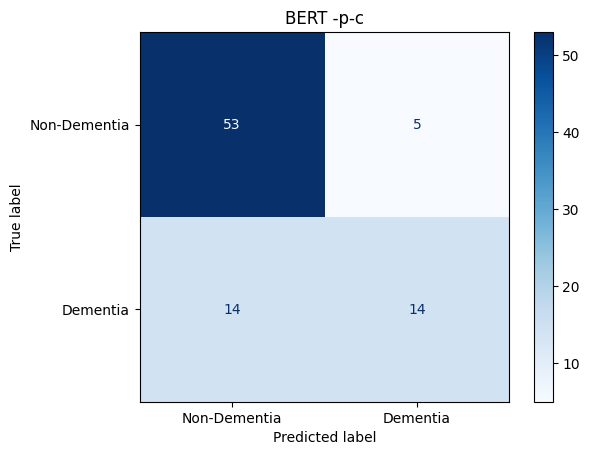

In [136]:
# with bert-v2-overlap-diarization
bert_v2_o_d_f = pd.read_csv('bert-v2-15k-r-a-final-s8.csv')
bert_v2_o_d_f['result'] = np.where(bert_v2_o_d_f['hyps'] >= 0.5,1,0)
bert_v2_o_d_f_wrong = bert_v2_o_d_f.iloc[np.where(bert_v2_o_d_f['ifcorrect'] == False)]
print(bert_v2_o_d_f_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_o_d_f_result = bert_v2_o_d_f['result'].tolist()
bert_v2_o_d_f_hyps = bert_v2_o_d_f['hyps'].tolist()
bert_v2_o_d_f_truth = [int(i) for i in bert_v2_o_d_f['truth'].tolist()]
print(classification_report(bert_v2_o_d_f_truth, bert_v2_o_d_f_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_o_d_f_truth, bert_v2_o_d_f_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(bert_v2_o_d_f_truth, bert_v2_o_d_f_hyps, bert_v2_o_d_f_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in bert_v2_o_d_f_truth]
y_pred = [bool(int(x)) for x in bert_v2_o_d_f_result]
labels = ['Non-Dementia', 'Dementia']
display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("BERT -p-c")

    name      hyps  truth  ifcorrect  result
0     15  0.922336    0.0      False       1
3     28  0.447105    1.0      False       0
5     35  0.230434    1.0      False       0
8     51  0.750974    0.0      False       1
18    25  0.464622    1.0      False       0
20    37  0.311444    1.0      False       0
22    45  0.110562    1.0      False       0
25    67  0.433396    1.0      False       0
26    68  0.714759    0.0      False       1
35    18  0.165485    1.0      False       0
37    20  0.233630    1.0      False       0
39    32  0.088773    1.0      False       0
40    38  0.473008    1.0      False       0
44    57  0.005923    1.0      False       0
45    58  0.275821    1.0      False       0
69    10  0.323109    1.0      False       0
77     5  0.377804    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.80      0.95      0.87        58
     patient       0.82      0.50      0.62        28

    accuracy              

Text(0.5, 1.0, 'BERT -p-c')

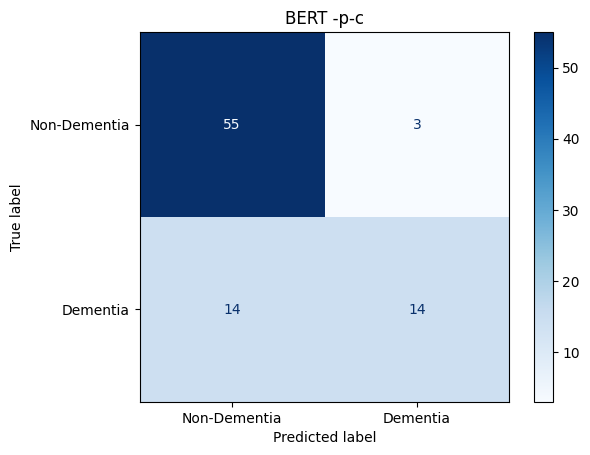

In [137]:
# with bert-v2-overlap-diarization
bert_v2_o_d_f = pd.read_csv('bert-v2-15k-r-a-final-s9.csv')
bert_v2_o_d_f['result'] = np.where(bert_v2_o_d_f['hyps'] >= 0.5,1,0)
bert_v2_o_d_f_wrong = bert_v2_o_d_f.iloc[np.where(bert_v2_o_d_f['ifcorrect'] == False)]
print(bert_v2_o_d_f_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_o_d_f_result = bert_v2_o_d_f['result'].tolist()
bert_v2_o_d_f_hyps = bert_v2_o_d_f['hyps'].tolist()
bert_v2_o_d_f_truth = [int(i) for i in bert_v2_o_d_f['truth'].tolist()]
print(classification_report(bert_v2_o_d_f_truth, bert_v2_o_d_f_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_o_d_f_truth, bert_v2_o_d_f_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(bert_v2_o_d_f_truth, bert_v2_o_d_f_hyps, bert_v2_o_d_f_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in bert_v2_o_d_f_truth]
y_pred = [bool(int(x)) for x in bert_v2_o_d_f_result]
labels = ['Non-Dementia', 'Dementia']
display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("BERT -p-c")

    name      hyps  truth  ifcorrect  result
0     15  0.899434    0.0      False       1
1     16  0.445469    1.0      False       0
3     28  0.301181    1.0      False       0
5     35  0.221255    1.0      False       0
8     51  0.706978    0.0      False       1
18    25  0.364095    1.0      False       0
20    37  0.206647    1.0      False       0
22    45  0.197188    1.0      False       0
24    65  0.413984    1.0      False       0
25    67  0.323593    1.0      False       0
26    68  0.646332    0.0      False       1
27    71  0.504629    0.0      False       1
35    18  0.109510    1.0      False       0
37    20  0.215858    1.0      False       0
39    32  0.126183    1.0      False       0
44    57  0.016441    1.0      False       0
45    58  0.285990    1.0      False       0
69    10  0.368608    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.79      0.93      0.86        58
     patient       0.78      0.50   

Text(0.5, 1.0, 'BERT -p-c')

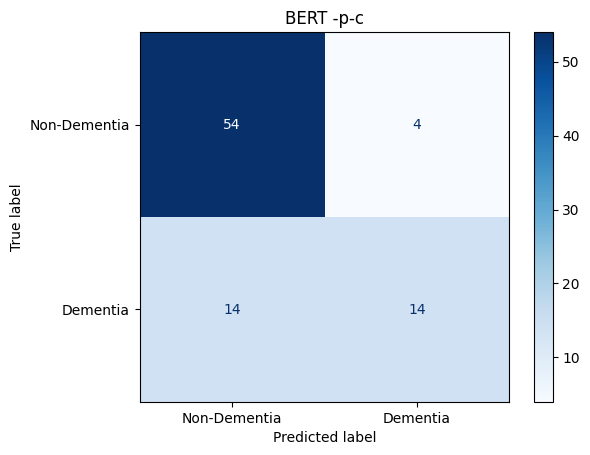

In [138]:
# with bert-v2-overlap-diarization
bert_v2_o_d_f = pd.read_csv('bert-v2-15k-r-a-final-s10.csv')
bert_v2_o_d_f['result'] = np.where(bert_v2_o_d_f['hyps'] >= 0.5,1,0)
bert_v2_o_d_f_wrong = bert_v2_o_d_f.iloc[np.where(bert_v2_o_d_f['ifcorrect'] == False)]
print(bert_v2_o_d_f_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_o_d_f_result = bert_v2_o_d_f['result'].tolist()
bert_v2_o_d_f_hyps = bert_v2_o_d_f['hyps'].tolist()
bert_v2_o_d_f_truth = [int(i) for i in bert_v2_o_d_f['truth'].tolist()]
print(classification_report(bert_v2_o_d_f_truth, bert_v2_o_d_f_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_o_d_f_truth, bert_v2_o_d_f_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(bert_v2_o_d_f_truth, bert_v2_o_d_f_hyps, bert_v2_o_d_f_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in bert_v2_o_d_f_truth]
y_pred = [bool(int(x)) for x in bert_v2_o_d_f_result]
labels = ['Non-Dementia', 'Dementia']
display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("BERT -p-c")

    name      hyps  truth  ifcorrect  result
0     15  0.891393    0.0      False       1
1     16  0.381547    1.0      False       0
3     28  0.232295    1.0      False       0
5     35  0.346629    1.0      False       0
8     51  0.558133    0.0      False       1
18    25  0.283491    1.0      False       0
20    37  0.246900    1.0      False       0
22    45  0.220210    1.0      False       0
24    65  0.363841    1.0      False       0
25    67  0.422447    1.0      False       0
26    68  0.690448    0.0      False       1
27    71  0.612397    0.0      False       1
35    18  0.174422    1.0      False       0
37    20  0.137291    1.0      False       0
39    32  0.144522    1.0      False       0
44    57  0.010340    1.0      False       0
45    58  0.284171    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.81      0.93      0.86        58
     patient       0.79      0.54      0.64        28

    accuracy              

Text(0.5, 1.0, 'BERT -p-c')

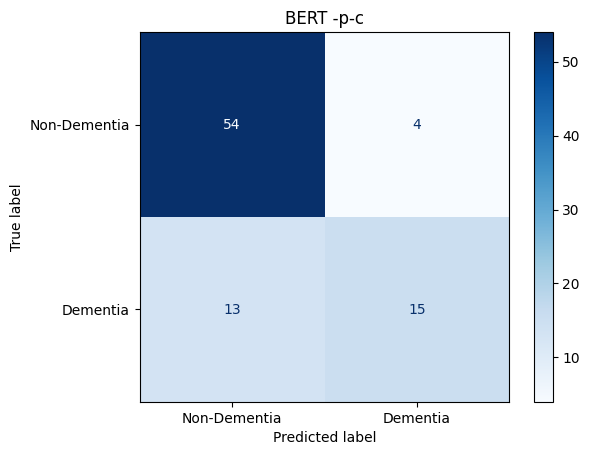

In [139]:
# with bert-v2-overlap-diarization
bert_v2_o_d_f = pd.read_csv('bert-v2-15k-r-a-final-s11.csv')
bert_v2_o_d_f['result'] = np.where(bert_v2_o_d_f['hyps'] >= 0.5,1,0)
bert_v2_o_d_f_wrong = bert_v2_o_d_f.iloc[np.where(bert_v2_o_d_f['ifcorrect'] == False)]
print(bert_v2_o_d_f_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_o_d_f_result = bert_v2_o_d_f['result'].tolist()
bert_v2_o_d_f_hyps = bert_v2_o_d_f['hyps'].tolist()
bert_v2_o_d_f_truth = [int(i) for i in bert_v2_o_d_f['truth'].tolist()]
print(classification_report(bert_v2_o_d_f_truth, bert_v2_o_d_f_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_o_d_f_truth, bert_v2_o_d_f_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(bert_v2_o_d_f_truth, bert_v2_o_d_f_hyps, bert_v2_o_d_f_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in bert_v2_o_d_f_truth]
y_pred = [bool(int(x)) for x in bert_v2_o_d_f_result]
labels = ['Non-Dementia', 'Dementia']
display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("BERT -p-c")

    name      hyps  truth  ifcorrect  result
0     15  0.819207    0.0      False       1
1     16  0.474309    1.0      False       0
5     35  0.479098    1.0      False       0
18    25  0.198981    1.0      False       0
20    37  0.259456    1.0      False       0
22    45  0.241653    1.0      False       0
24    65  0.421325    1.0      False       0
26    68  0.954899    0.0      False       1
35    18  0.217733    1.0      False       0
37    20  0.387569    1.0      False       0
39    32  0.124596    1.0      False       0
40    38  0.493074    1.0      False       0
44    57  0.021243    1.0      False       0
45    58  0.193560    1.0      False       0
60    63  0.285675    1.0      False       0
69    10  0.304850    1.0      False       0
73    31  0.463993    1.0      False       0
77     5  0.493262    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.78      0.97      0.86        58
     patient       0.86      0.43   

Text(0.5, 1.0, 'BERT -p-c')

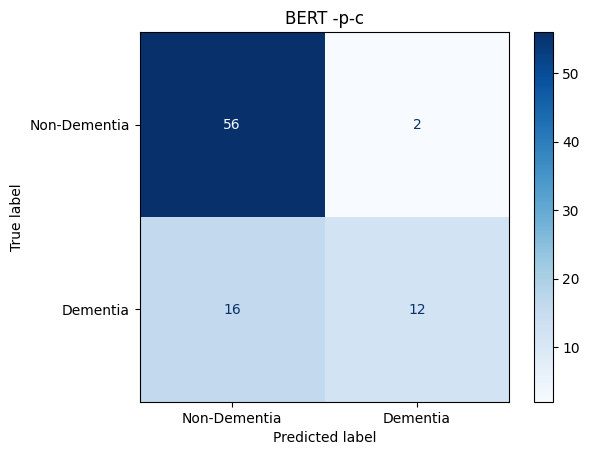

In [140]:
# with bert-v2-overlap-diarization
bert_v2_o_d_f = pd.read_csv('bert-v2-15k-r-a-final-s12.csv')
bert_v2_o_d_f['result'] = np.where(bert_v2_o_d_f['hyps'] >= 0.5,1,0)
bert_v2_o_d_f_wrong = bert_v2_o_d_f.iloc[np.where(bert_v2_o_d_f['ifcorrect'] == False)]
print(bert_v2_o_d_f_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_o_d_f_result = bert_v2_o_d_f['result'].tolist()
bert_v2_o_d_f_hyps = bert_v2_o_d_f['hyps'].tolist()
bert_v2_o_d_f_truth = [int(i) for i in bert_v2_o_d_f['truth'].tolist()]
print(classification_report(bert_v2_o_d_f_truth, bert_v2_o_d_f_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_o_d_f_truth, bert_v2_o_d_f_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(bert_v2_o_d_f_truth, bert_v2_o_d_f_hyps, bert_v2_o_d_f_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in bert_v2_o_d_f_truth]
y_pred = [bool(int(x)) for x in bert_v2_o_d_f_result]
labels = ['Non-Dementia', 'Dementia']
display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("BERT -p-c")

    name      hyps  truth  ifcorrect  result
0     15  0.819207    0.0      False       1
1     16  0.474309    1.0      False       0
5     35  0.479098    1.0      False       0
18    25  0.198981    1.0      False       0
20    37  0.259456    1.0      False       0
22    45  0.241653    1.0      False       0
24    65  0.421325    1.0      False       0
26    68  0.954899    0.0      False       1
35    18  0.217733    1.0      False       0
37    20  0.387569    1.0      False       0
39    32  0.124596    1.0      False       0
40    38  0.493074    1.0      False       0
44    57  0.021243    1.0      False       0
45    58  0.193560    1.0      False       0
60    63  0.285675    1.0      False       0
69    10  0.304850    1.0      False       0
73    31  0.463993    1.0      False       0
77     5  0.493262    1.0      False       0
              precision    recall  f1-score   support

 non-patient       0.78      0.97      0.86        58
     patient       0.86      0.43   

Text(0.5, 1.0, 'BERT -p-c')

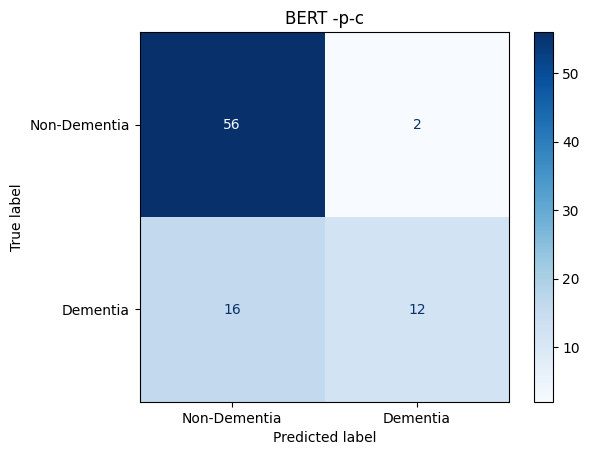

In [141]:
# with bert-v2-overlap-diarization
bert_v2_o_d_f = pd.read_csv('bert-v2-15k-r-final.csv')
bert_v2_o_d_f['result'] = np.where(bert_v2_o_d_f['hyps'] >= 0.5,1,0)
bert_v2_o_d_f_wrong = bert_v2_o_d_f.iloc[np.where(bert_v2_o_d_f['ifcorrect'] == False)]
print(bert_v2_o_d_f_wrong)
# print(fivefolds_whisper_WhisperForAudioClassification_v3_10k_2.head(20))
bert_v2_o_d_f_result = bert_v2_o_d_f['result'].tolist()
bert_v2_o_d_f_hyps = bert_v2_o_d_f['hyps'].tolist()
bert_v2_o_d_f_truth = [int(i) for i in bert_v2_o_d_f['truth'].tolist()]
print(classification_report(bert_v2_o_d_f_truth, bert_v2_o_d_f_result, target_names=target_names))
tn, fp, fn, tp = confusion_matrix(bert_v2_o_d_f_truth, bert_v2_o_d_f_result).ravel()
print('sensitivity: ',tp / (fn+tp))
print('specificity: ',tn / (fp+tn))

f1_scores, sensitivities, specificities, aucs, \
mean_f1, mean_sensitivity, mean_specificity, mean_auc, \
std_f1, std_sensitivity, std_specificity, std_auc, \
conf_interval_f1, conf_interval_sensitivity, conf_interval_specificity, conf_interval_auc = eval_std_ci(bert_v2_o_d_f_truth, bert_v2_o_d_f_hyps, bert_v2_o_d_f_result)
print(f"F1 Scores: {f1_scores}, Sensitivities: {sensitivities}, Specificities: {specificities}, AUCs: {aucs}")
print(f"Mean F1 Score: {mean_f1}, Std Dev: {std_f1}, 95% Confidence Interval: {conf_interval_f1}")
print(f"Mean Sensitivity: {mean_sensitivity}, Std Dev: {std_sensitivity}, 95% Confidence Interval: {conf_interval_sensitivity}")
print(f"Mean Specificity: {mean_specificity}, Std Dev: {std_specificity}, 95% Confidence Interval: {conf_interval_specificity}")
print(f"Mean AUC: {mean_auc}, Std Dev: {std_auc}, 95% Confidence Interval: {conf_interval_auc}")

y_test = [bool(int(x)) for x in bert_v2_o_d_f_truth]
y_pred = [bool(int(x)) for x in bert_v2_o_d_f_result]
labels = ['Non-Dementia', 'Dementia']
display = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=labels, cmap="Blues")
display.ax_.set_title("BERT -p-c")